# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Laptop Price Prediction</p>

**Hello there,**
Welcome to the world where electronic gadgets are all around us. In this project we will work with one of the crucial electric gadget. 

**Laptops**
If you are reached this notebook. Then it much be though a electronic gadget i.e.,Smartphone,tablet,laptop,etc. So, I am pretty sure you know the working of a laptop and have a basic knowledge on the hardware and software specs of a laptop.

**This is a project where we will be building a Machine learning model to predict the price of the laptop based on the the given hardware and software specifications and creating an Web application with Streamlit.**

**Let us get Started**

<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Go through the comments in each cell for easy understanding of the procedure used.</p>

![](https://s.yimg.com/uu/api/res/1.2/KX0eT5nwBx7KdWlPVmVGBA--~B/aD0xMjAwO3c9MjAwMDthcHBpZD15dGFjaHlvbg--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2022-07/4a425a40-fd56-11ec-beee-be16b8848f18.cf.webp)


<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
| <br>
| :---          
| [<font color="#254441"> Imports</font>](#1)                      
| [<font color="#254441"> Read CSV & Basic Info</font>](#2)                               
| [<font color="#254441"> Missing Data </font>](#3)                         
| [<font color="#254441"> Story of Features</font>](#4)                              
| [<font color="#254441"> Data Cleaning and Feature Engineering</font>](#5)           
| [<font color="#254441"> Variable Transformations</font>](#6)                   
| [<font color="#254441"> Model</font>](#7)  
| [<font color="#254441"> Thank You</font>](#8)  


# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Imports</p>
<a id="1"></a>

In [120]:
# Kaggle imports
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Main Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# matplotlib style
plt.style.use("dark_background")


# Row and columns imports
# pd.set_option("max_columns", 1000)
# pd.set_option("max_rows", 1000)


# Warnings imports 
import warnings
warnings.filterwarnings('ignore')

# Regex
import re

# Scipy
import scipy.stats as stats

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector,ExhaustiveFeatureSelector

# sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import PowerTransformer,PolynomialFeatures,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algo (sklearn)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Read CSV & Basic Info</p>
<a id="2"></a>

In [121]:
# Reading in the data
data0 = pd.read_csv("laptop_data (1).csv")
# new copy of data which we will work with.
data1 = data0.copy()

In [122]:
# shape of data
print(f"The dataset contains {data1.shape[0]} rows and {data1.shape[1]} columns.")

The dataset contains 1303 rows and 12 columns.


In [123]:
# Feature names
print("Column names are: ");list(data1.columns.values)

Column names are: 


['Unnamed: 0',
 'Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [124]:
# First five rows of the dataset
data1.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [125]:
# Last five rows of the dataset
data1.tail()

Unnamed: 0 Company            TypeName  Inches  \
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram              Memory  \
1298            Intel Core i7 6500U 2.5GHz   4GB           128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB           512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB  64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB             1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB           500GB HDD   

                        Gpu       OpSys  Weight     Price  
1298  Intel HD Graphics 520  Windows 10   1.8kg  33992.64  
1299  Intel HD Graphics 520  Windows 10   1.3kg  79866.72  
1300      Intel HD Graphics  Windows 10   1.5kg  12201.12  
1301     AMD Radeon R5 M330  Windows 10  2.19kg  40705.92  
1302      Intel HD Graphics  Windows 10   2.2kg  19660.32

In [126]:
# Droping the Unnamed: 0 column bescause it is basically the index.
data1.drop("Unnamed: 0", axis = 1, inplace = True)

In [127]:
# Information about the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Missing data</p>
<a id="3"></a>

In [128]:
# Holy molly!!! This is good.
# No missing data.
print(f"Missing data = {data1.isna().sum().sum()}")

Missing data = 0


# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Univariate and Bivariable Analysis </p>
<a id="4"></a>

## Dependent Variable (Price)

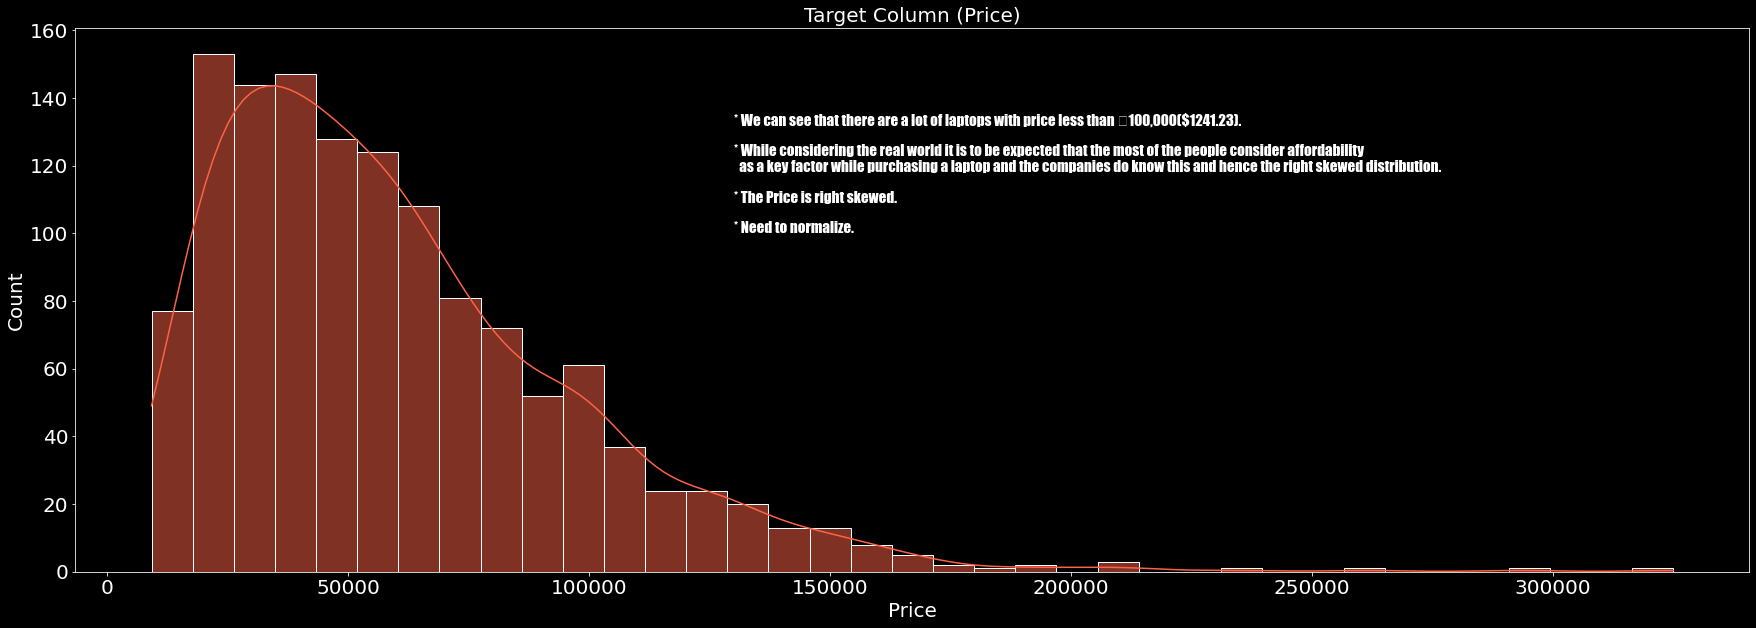

In [129]:
# Price is the Target variable that we want to predict.
# View the plot

plt.figure(figsize = (30,10))
sns.histplot(data = data1, x = "Price",kde = True,color = "tomato")
plt.title("Target Column (Price)",size = 20)
plt.xlabel("Price",size = 20)
plt.ylabel("Count",size = 20)
plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(13e4,100,'''* We can see that there are a lot of laptops with price less than ₹100,000($1241.23).

* While considering the real world it is to be expected that the most of the people consider affordability
  as a key factor while purchasing a laptop and the companies do know this and hence the right skewed distribution.

* The Price is right skewed.

* Need to normalize.'''
         ,size = 15,fontdict=font)

plt.show()

## Independent Variables

**Company**
-

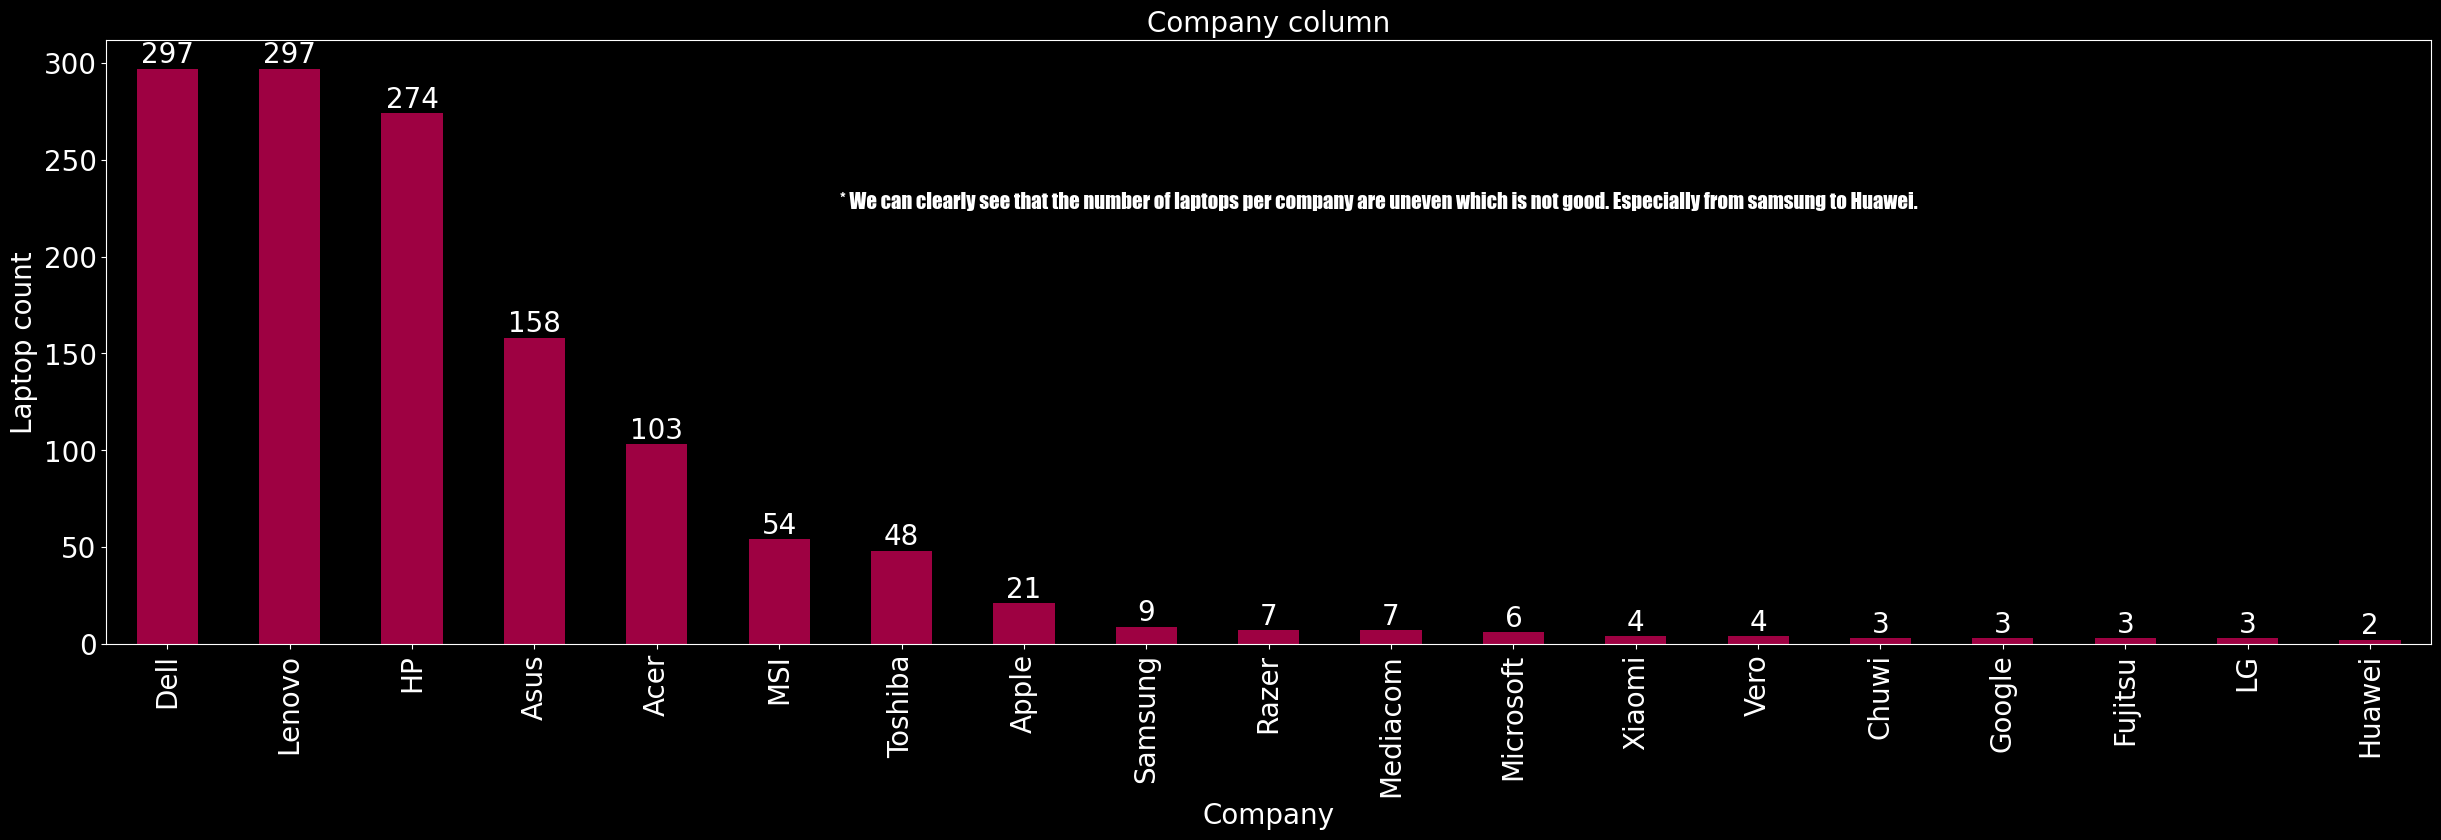

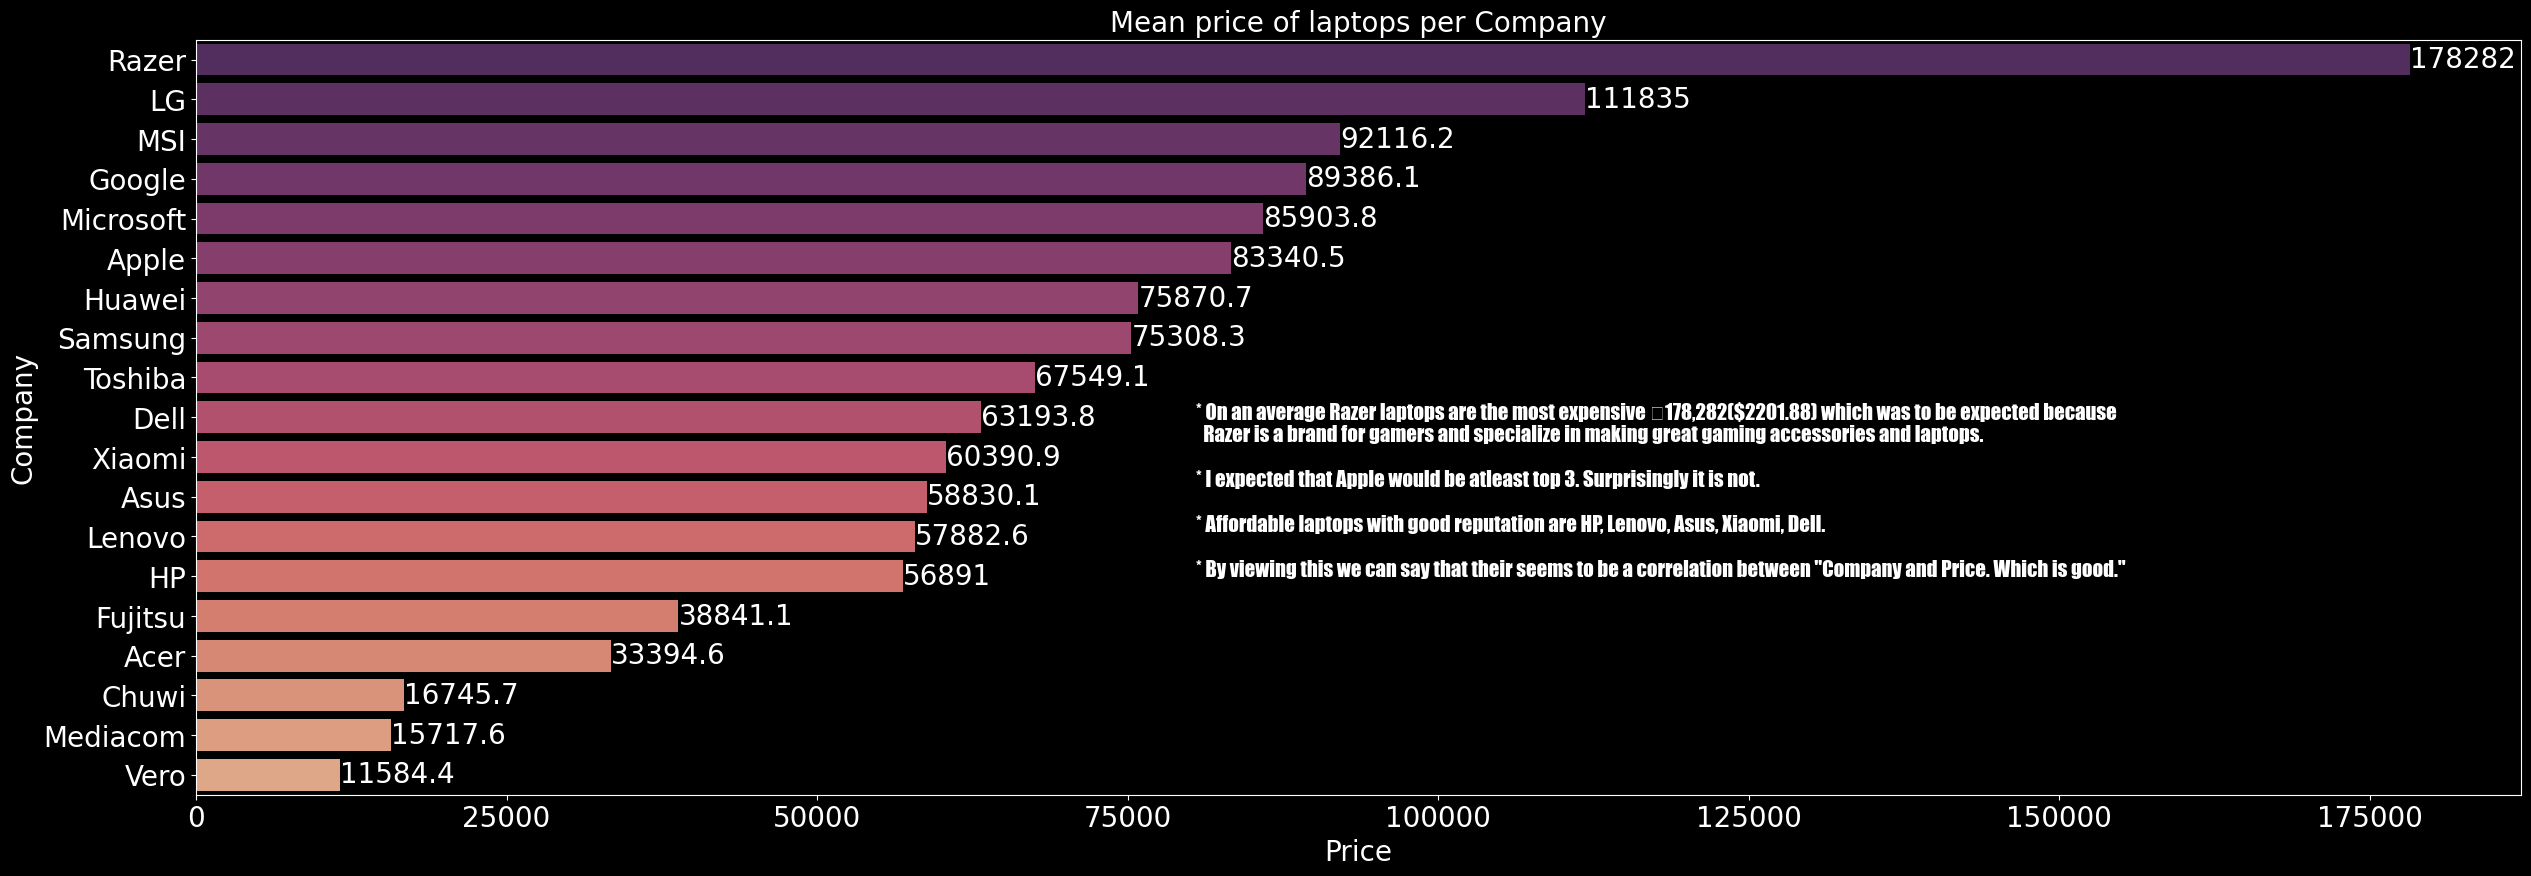

In [130]:
# View the plots

plt.figure(figsize = (30,8),dpi = 100)
data1_company_bar = data1["Company"].value_counts().plot(kind = "bar",cmap = "Spectral")

for container in data1_company_bar.containers:
    data1_company_bar.bar_label(container,size = 20)

plt.xlabel("Company",size = 20)
plt.ylabel("Laptop count",size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Company column",size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(5.5,225,'''* We can clearly see that the number of laptops per company are uneven which is not good. Especially from samsung to Huawei.'''
         ,size = 15,fontdict=font)


plt.show()



plt.figure(figsize = (30,10),dpi = 100)
data1_company_price_df = pd.DataFrame(pd.pivot_table(data = data1,index = "Company",values = "Price",aggfunc = "mean").sort_values(by = "Price",ascending = False)).reset_index()
ax = sns.barplot(data = data1_company_price_df, x = "Price", y = "Company",palette="flare_r")

plt.bar_label(ax.containers[0],size=20,label_type="edge",color = "white")

plt.xlabel("Price", size = 20)
plt.ylabel("Company", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title("Mean price of laptops per Company",size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(805e2,13,'''* On an average Razer laptops are the most expensive ₹178,282($2201.88) which was to be expected because 
  Razer is a brand for gamers and specialize in making great gaming accessories and laptops.

* I expected that Apple would be atleast top 3. Surprisingly it is not.

* Affordable laptops with good reputation are HP, Lenovo, Asus, Xiaomi, Dell.

* By viewing this we can say that their seems to be a correlation between "Company and Price. Which is good."'''
         ,size = 15,fontdict=font)

plt.show()

**TypeName**
-

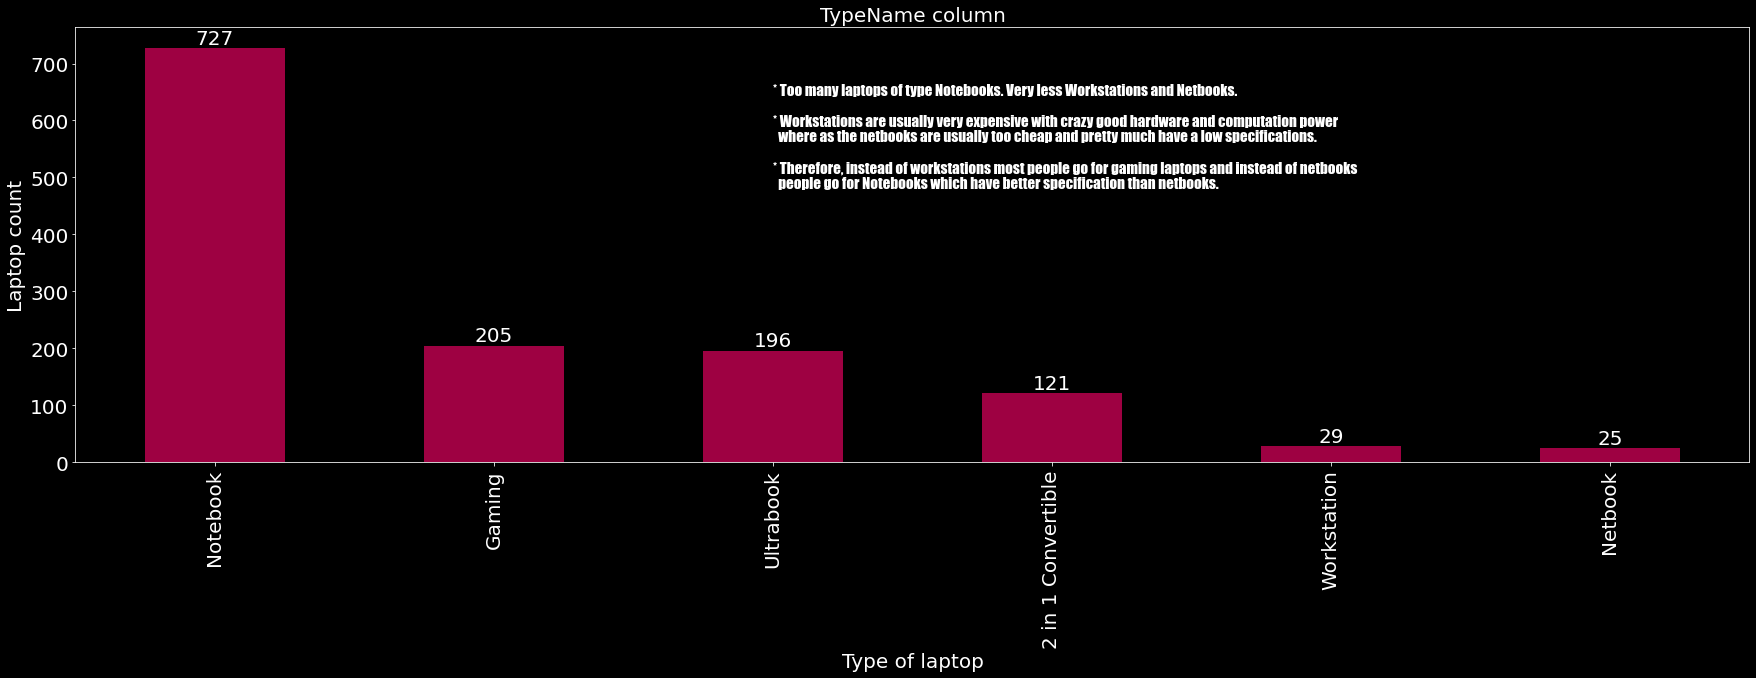

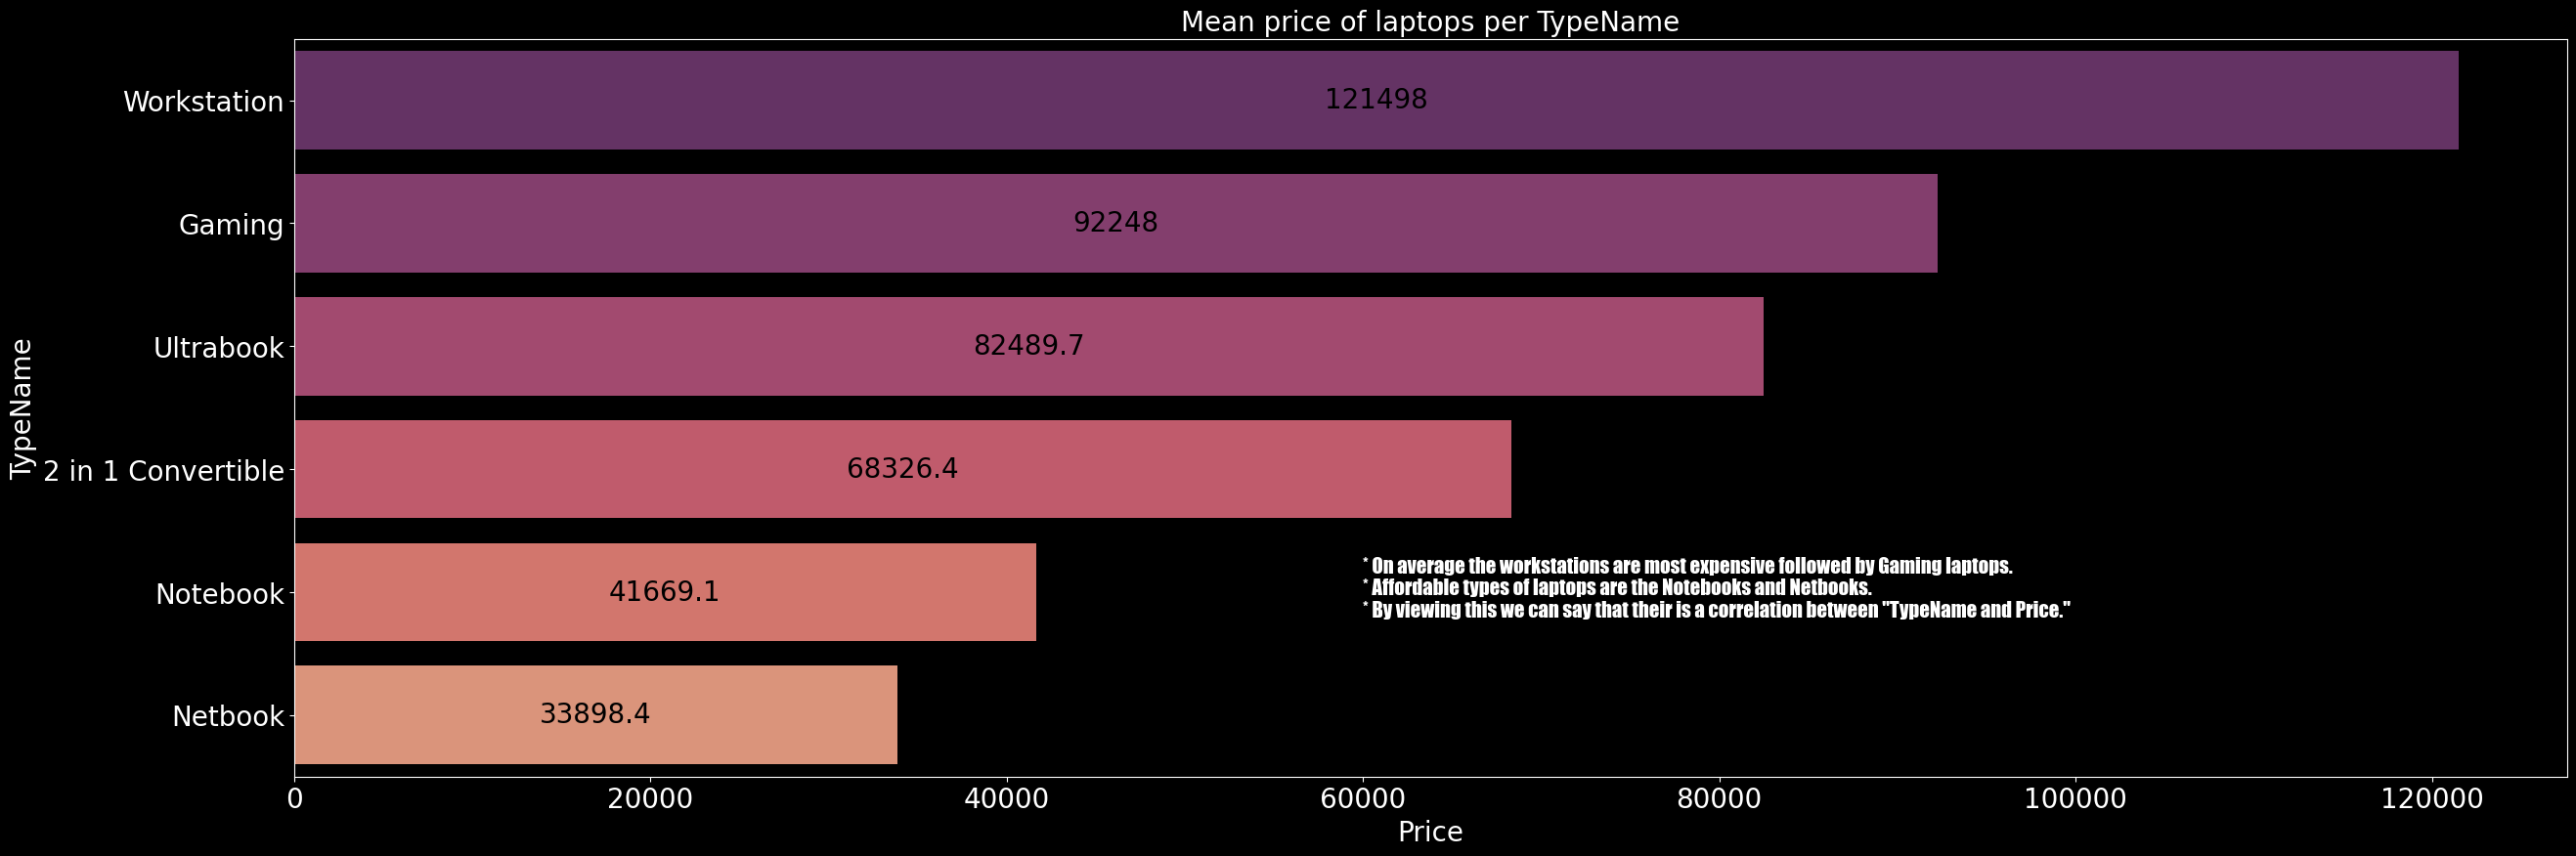

In [131]:
# View the plots

plt.figure(figsize = (30,8))
data1_company_bar = data1["TypeName"].value_counts().plot(kind = "bar",cmap = "Spectral")

for container in data1_company_bar.containers:
    data1_company_bar.bar_label(container,size = 20,label_type='edge')

plt.xlabel("Type of laptop",size = 20)
plt.ylabel("Laptop count", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title("TypeName column", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(2,400,'''* Too many laptops of type Notebooks. Very less Workstations and Netbooks.

* Workstations are usually very expensive with crazy good hardware and computation power 
  where as the netbooks are usually too cheap and pretty much have a low specifications.
  
* Therefore, instead of workstations most people go for gaming laptops and instead of netbooks
  people go for Notebooks which have better specification than netbooks.


'''
         ,size = 15,fontdict=font)


plt.show()




plt.figure(figsize = (30,10),dpi = 100)
data1_company_price_df = pd.DataFrame(pd.pivot_table(data = data1,index = "TypeName",values = "Price").sort_values(by = "Price",ascending = False)).reset_index()
ax = sns.barplot(data = data1_company_price_df, x = "Price", y = "TypeName",palette="flare_r")

ax.bar_label(ax.containers[0],size = 20,label_type='center',color = "k")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Price", size = 20)
plt.ylabel("TypeName", size = 20)
plt.title("Mean price of laptops per TypeName",size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(6e4,4.2,'''* On average the workstations are most expensive followed by Gaming laptops.
* Affordable types of laptops are the Notebooks and Netbooks.
* By viewing this we can say that their is a correlation between "TypeName and Price."'''
         ,size = 15,fontdict=font)

plt.show()

**Inches**
- 

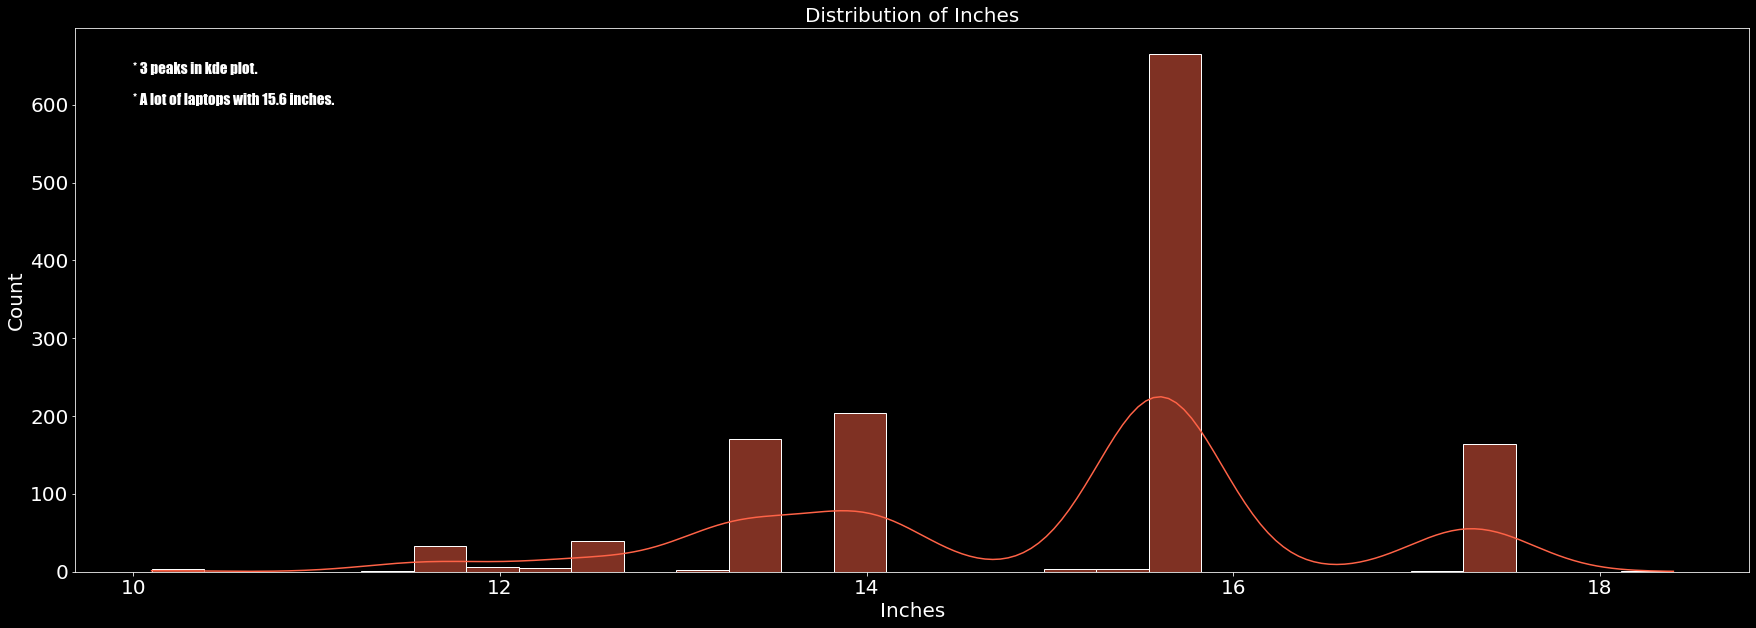

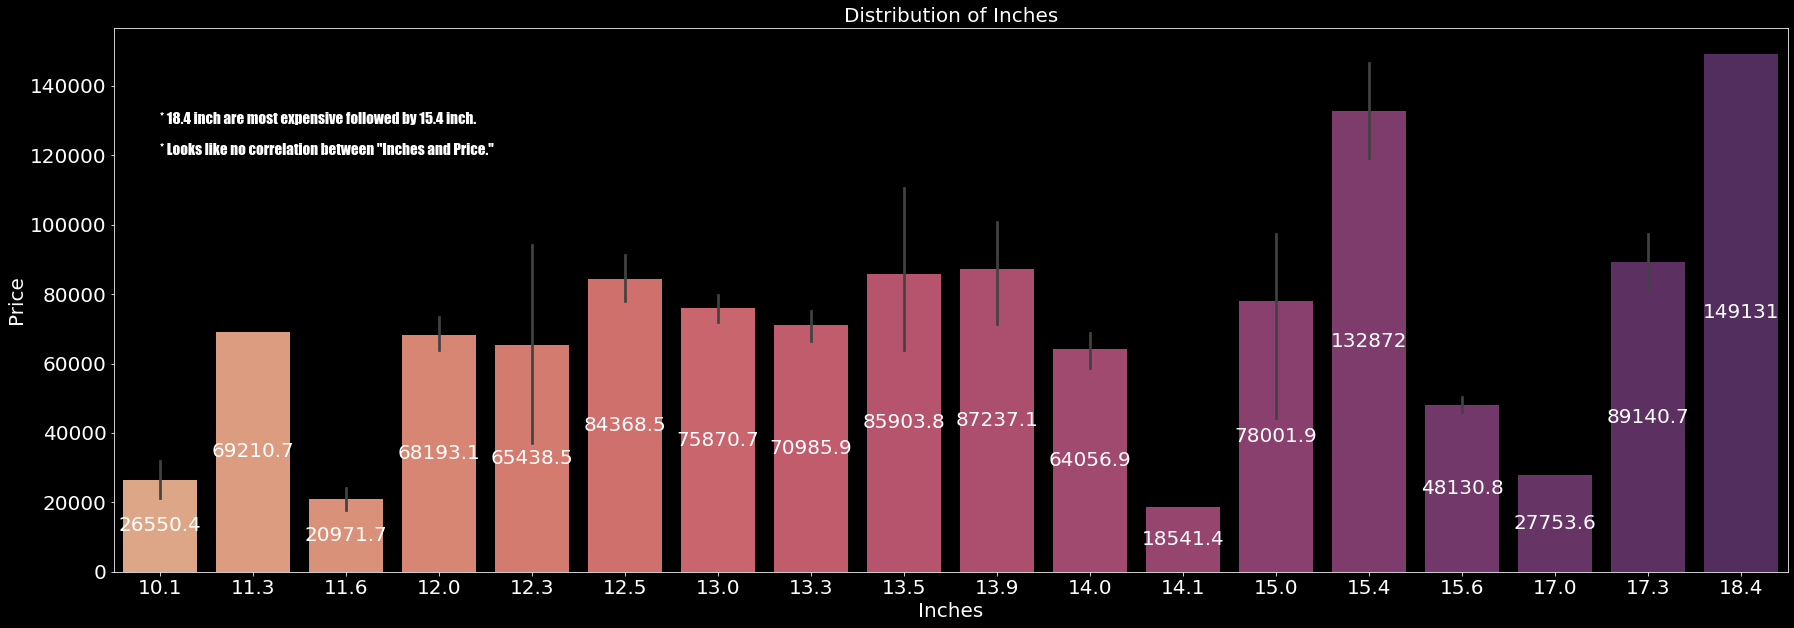

In [132]:
# View the plots

plt.figure(figsize = (30,10))
sns.histplot(data = data1, x = "Inches",kde = True,color = "tomato")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Inches", size = 20)
plt.ylabel("Count", size = 20)
plt.title("Distribution of Inches",size =20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(10,600,'''* 3 peaks in kde plot.

* A lot of laptops with 15.6 inches.'''
         ,size = 15,fontdict=font)

plt.show()




plt.figure(figsize = (30,10))
ax = sns.barplot(data = data1, x = "Inches",y = "Price",palette="flare")
plt.bar_label(ax.containers[0],size=20,label_type="center")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Inches", size = 20)
plt.ylabel("Price", size = 20)
plt.title("Distribution of Inches",size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(0,12e4,'''* 18.4 inch are most expensive followed by 15.4 inch.

* Looks like no correlation between "Inches and Price."'''
         ,size = 15,fontdict=font)

plt.show()

**ScreenResolution**
- 

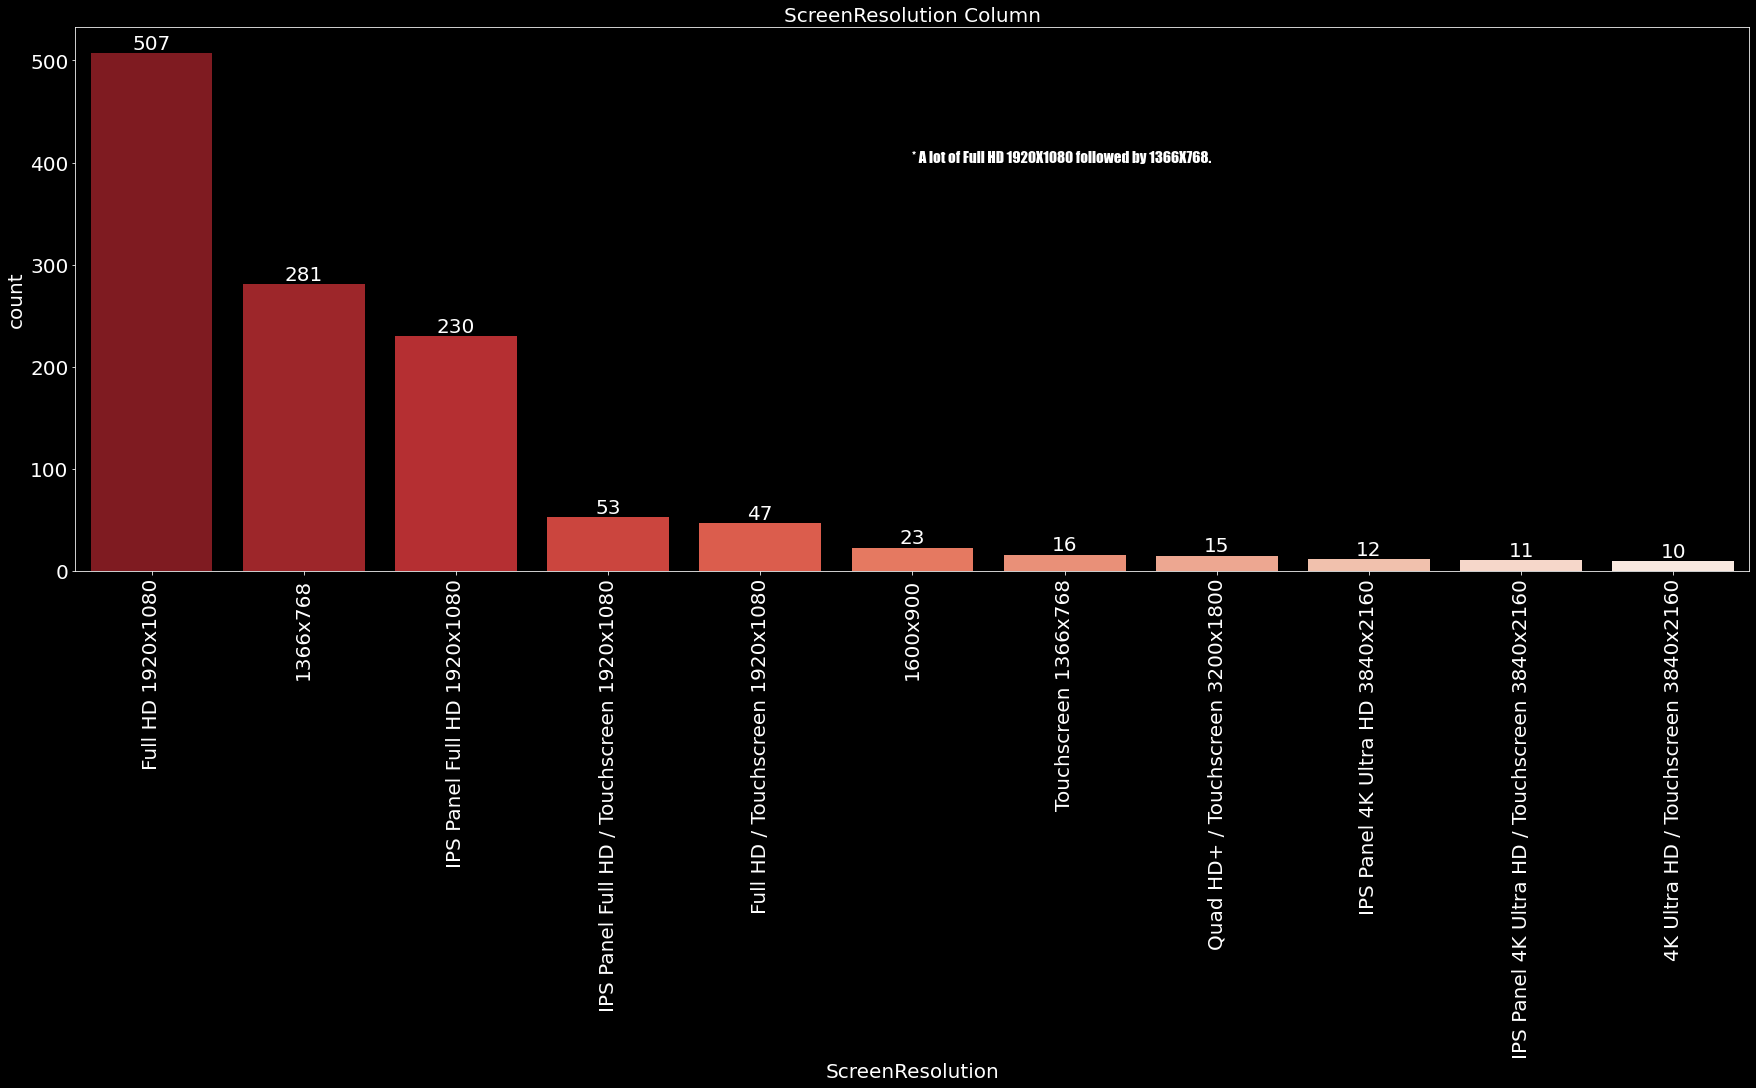

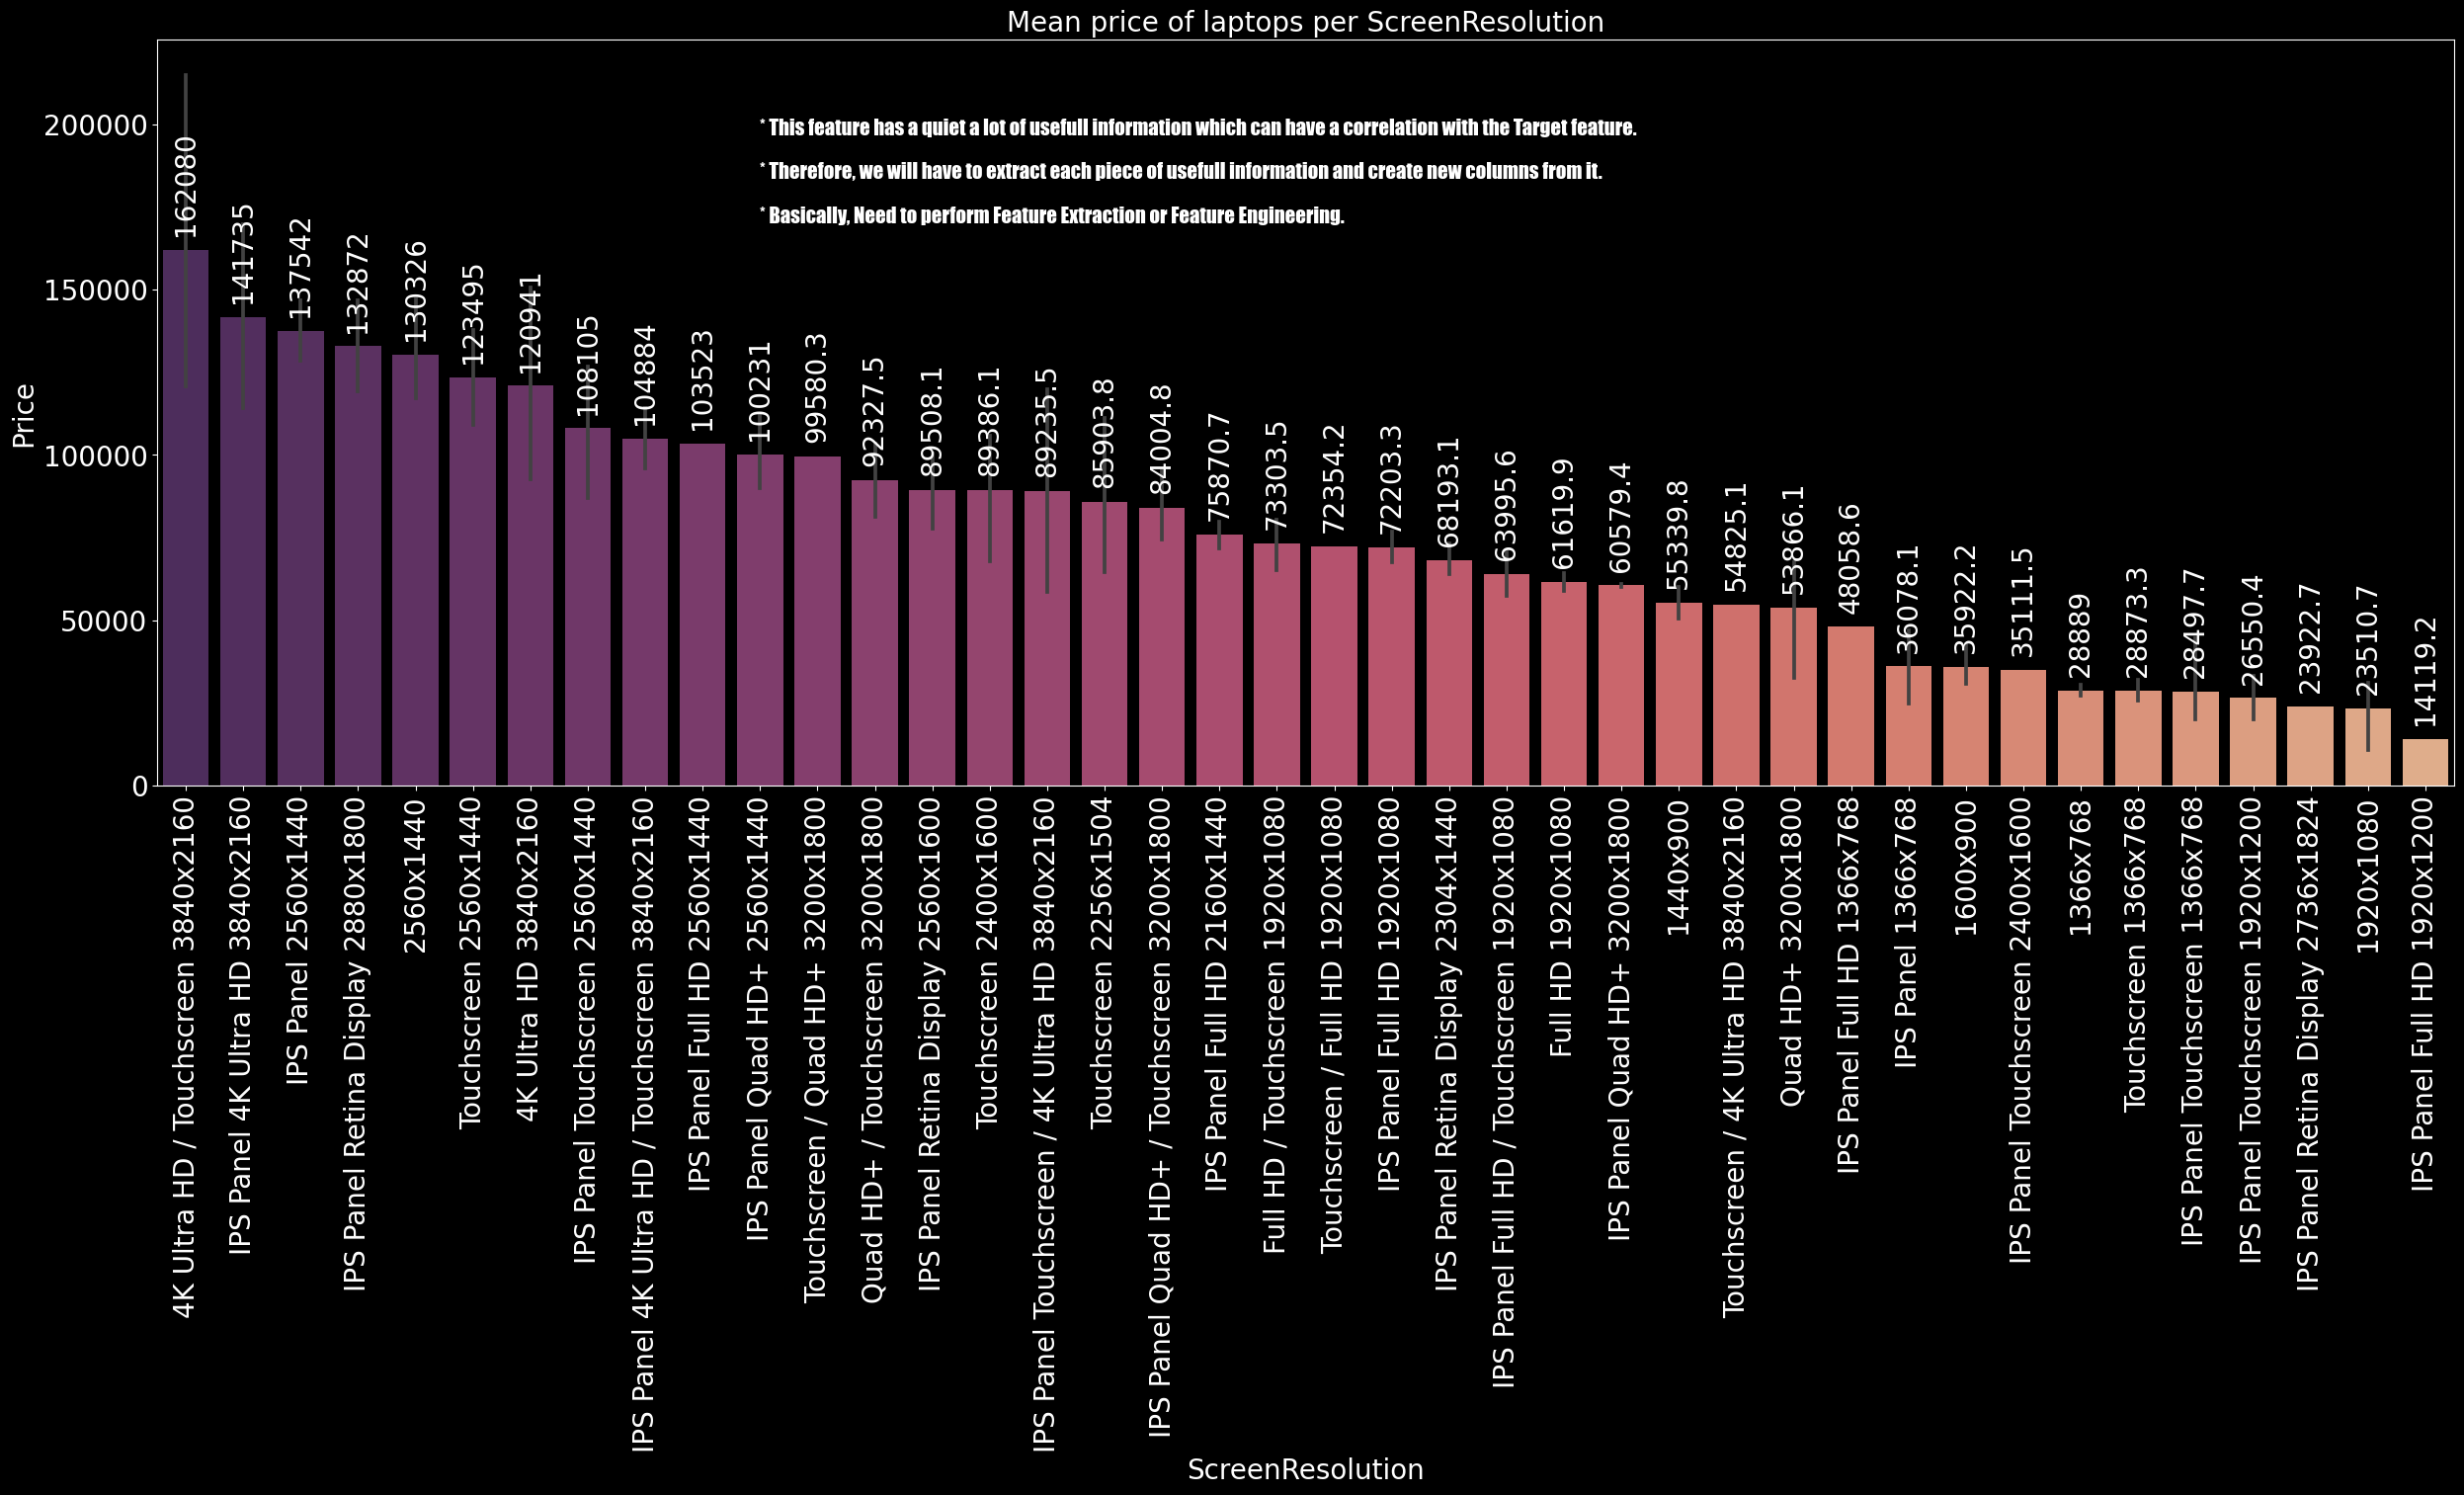

In [133]:
# View the plots

plt.figure(figsize = (30,10))
SR_count = data1["ScreenResolution"].value_counts()
SR_count_above_9 = SR_count[SR_count >= 10]
mask_plot = data1[data1["ScreenResolution"].isin(list(SR_count_above_9.index))]
ax = sns.countplot(data = mask_plot, x = "ScreenResolution", order = mask_plot["ScreenResolution"].value_counts().index, palette="Reds_r")

plt.xticks(rotation = 90,size = 20)
plt.yticks(size = 20)
plt.xlabel("ScreenResolution",size = 20)
plt.ylabel("count",size = 20)
plt.title("ScreenResolution Column",size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(5,400,'''* A lot of Full HD 1920X1080 followed by 1366X768.'''
         ,size = 15,fontdict=font)

ax.bar_label(ax.containers[0],size = 20,label_type="edge")
plt.show()




plt.figure(figsize = (30,10),dpi = 100)
ax = sns.barplot(data = data1, x = "ScreenResolution", y = "Price", order = pd.pivot_table(data = data1,values = "Price",index = "ScreenResolution").sort_values(by = "Price", ascending = False).index, palette= "flare_r")
plt.xticks(rotation = 90,size = 20)
plt.yticks(size = 20)
plt.xlabel("ScreenResolution", size = 20)
plt.ylabel("Price", size = 20)
plt.title("Mean price of laptops per ScreenResolution",size = 20)
ax.bar_label(ax.containers[0],size = 20,color = "white",label_type='edge',rotation = 90,padding= 10)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(10,17e4,'''* This feature has a quiet a lot of usefull information which can have a correlation with the Target feature.

* Therefore, we will have to extract each piece of usefull information and create new columns from it.

* Basically, Need to perform Feature Extraction or Feature Engineering.'''
         ,size = 15,fontdict=font)

plt.show()

**Cpu**
- 

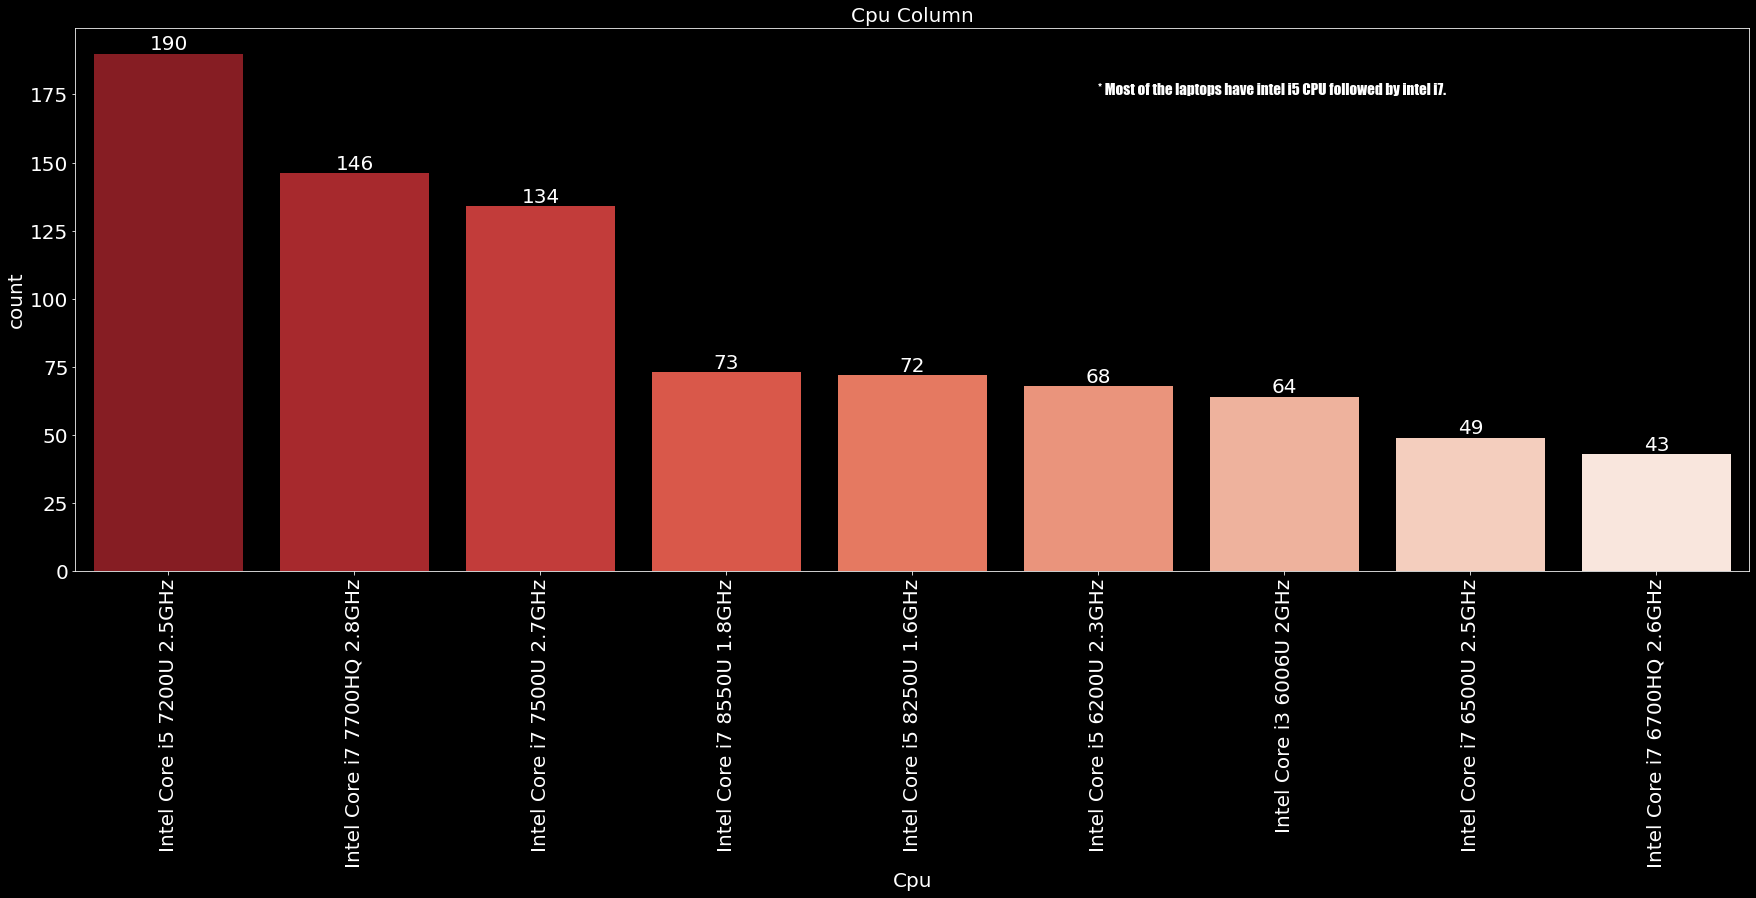

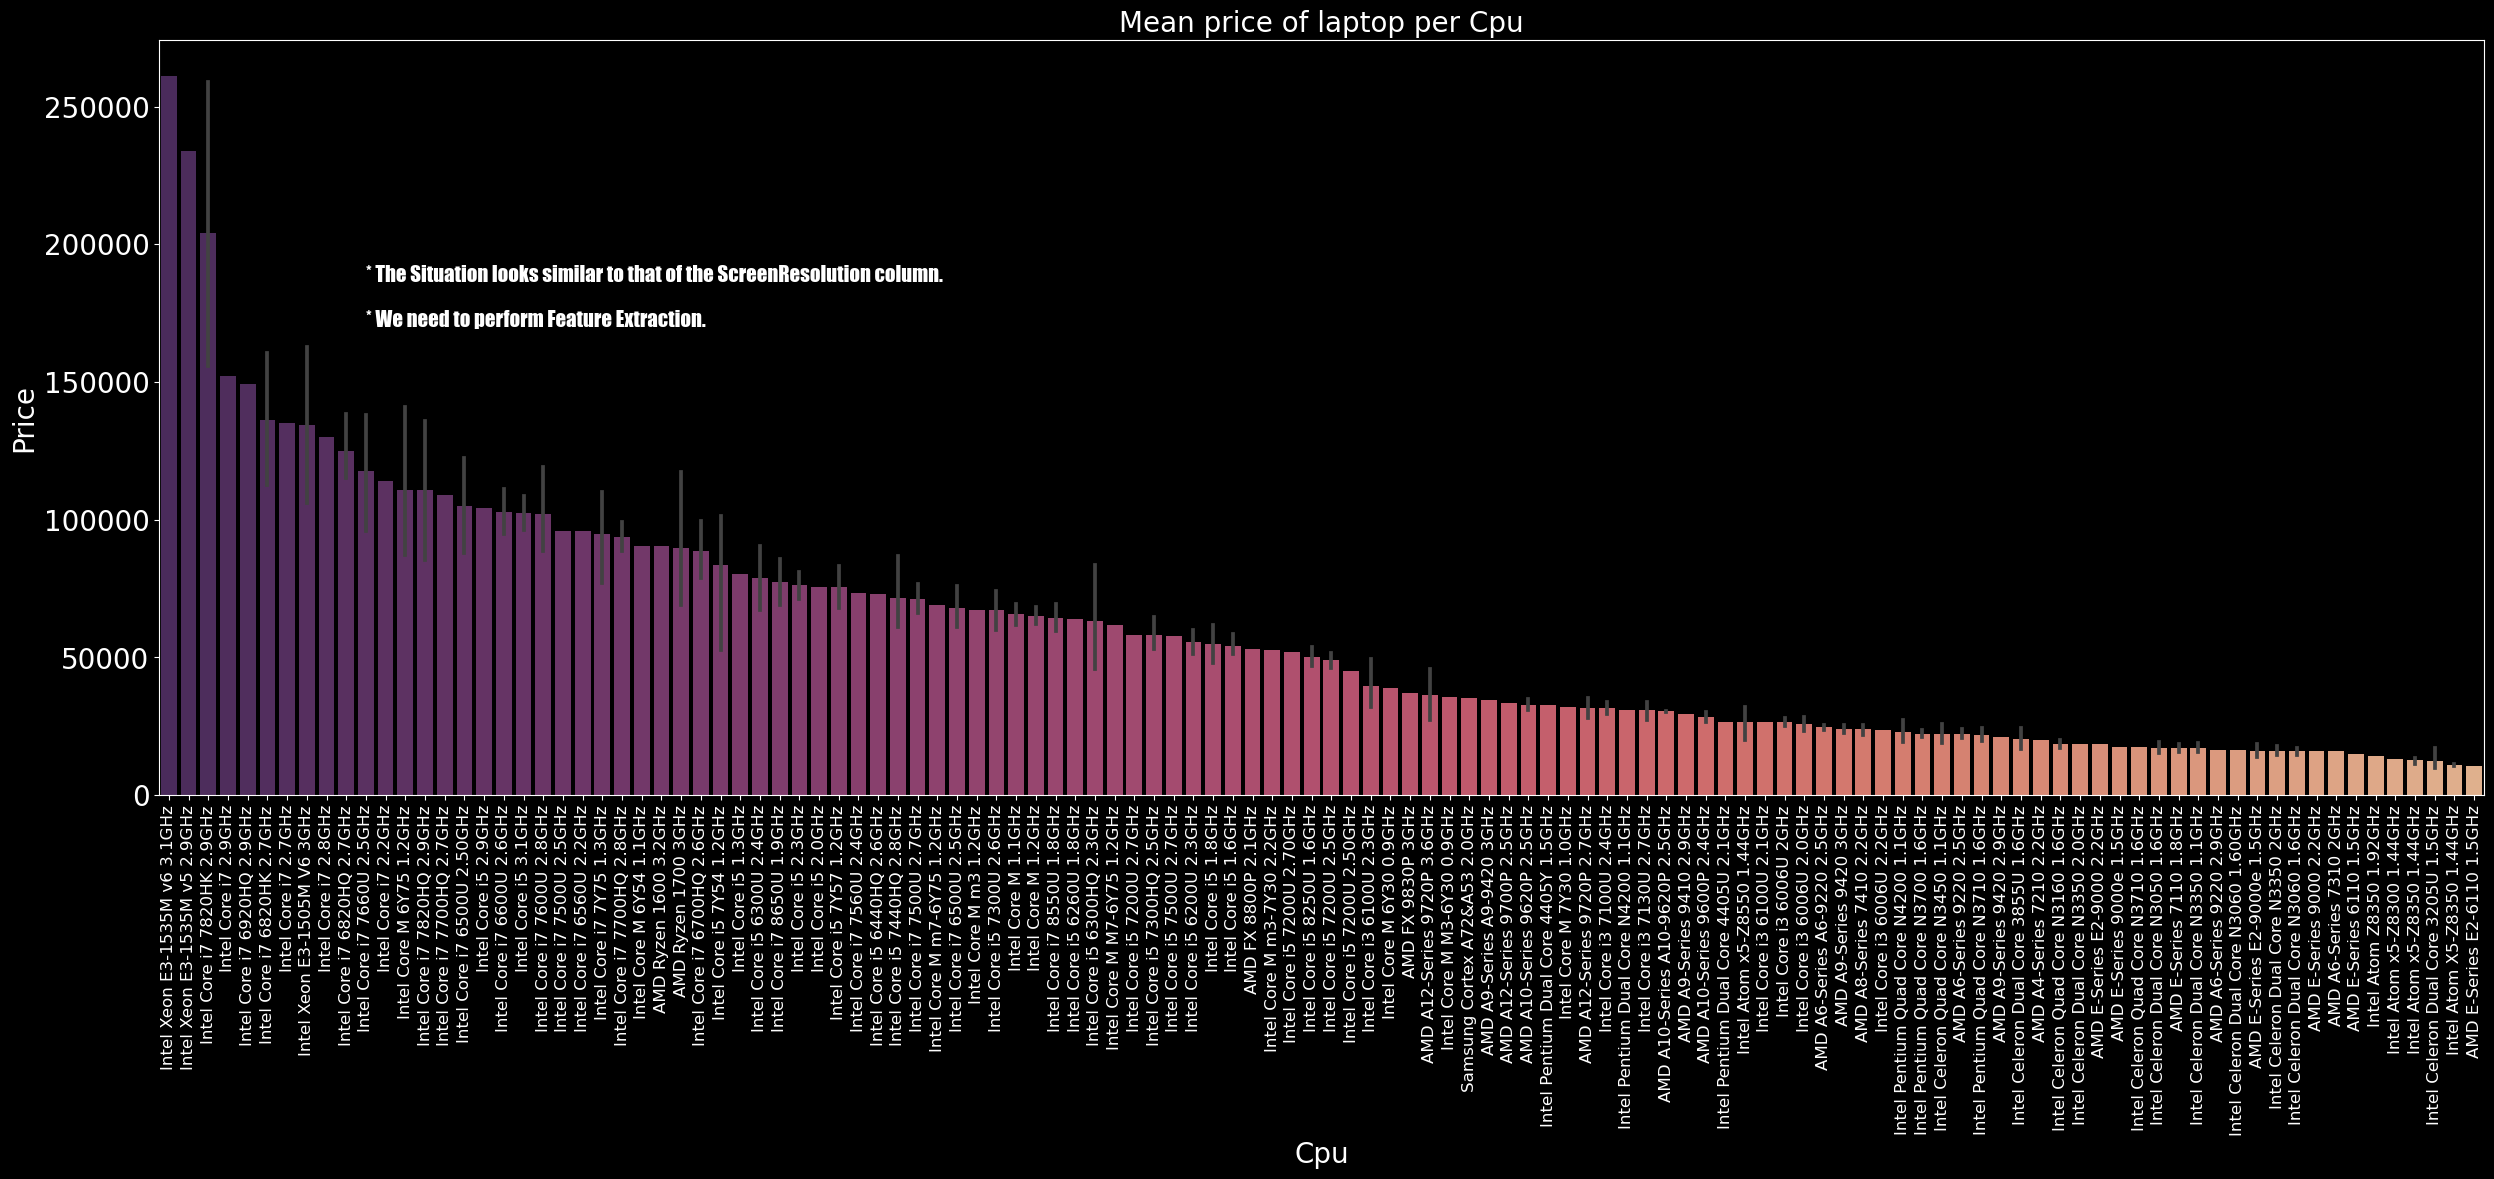

In [134]:
# View the plot

plt.figure(figsize = (30,10))
Cpu_count = data1["Cpu"].value_counts()
Cpu_count_above_39 = Cpu_count[Cpu_count >= 40]
mask_plot = data1[data1["Cpu"].isin(list(Cpu_count_above_39.index))]
ax = sns.countplot(data = mask_plot, x = "Cpu", order = mask_plot["Cpu"].value_counts().index, palette="Reds_r")

plt.xticks(rotation = 90,size = 20)
plt.yticks(size = 20)
plt.xlabel("Cpu",size = 20)
plt.ylabel("count",size = 20)
plt.title("Cpu Column", size = 20)


font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(5,175,'''* Most of the laptops have intel i5 CPU followed by intel i7.'''
         ,size = 15,fontdict=font)

ax.bar_label(ax.containers[0],size = 20)
plt.show()



plt.figure(figsize = (30,10),dpi = 100)
sns.barplot(data = data1, x = "Cpu", y = "Price", order = pd.pivot_table(data = data1,values = "Price",index = "Cpu").sort_values(by = "Price", ascending = False).index, palette = "flare_r")
plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 20)
plt.xlabel("Cpu",size = 20)
plt.ylabel("Price",size = 20)
plt.title("Mean price of laptop per Cpu", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(10,17e4,'''* The Situation looks similar to that of the ScreenResolution column.

* We need to perform Feature Extraction.'''
         ,size = 15,fontdict=font)

plt.show()


**Ram**
- 

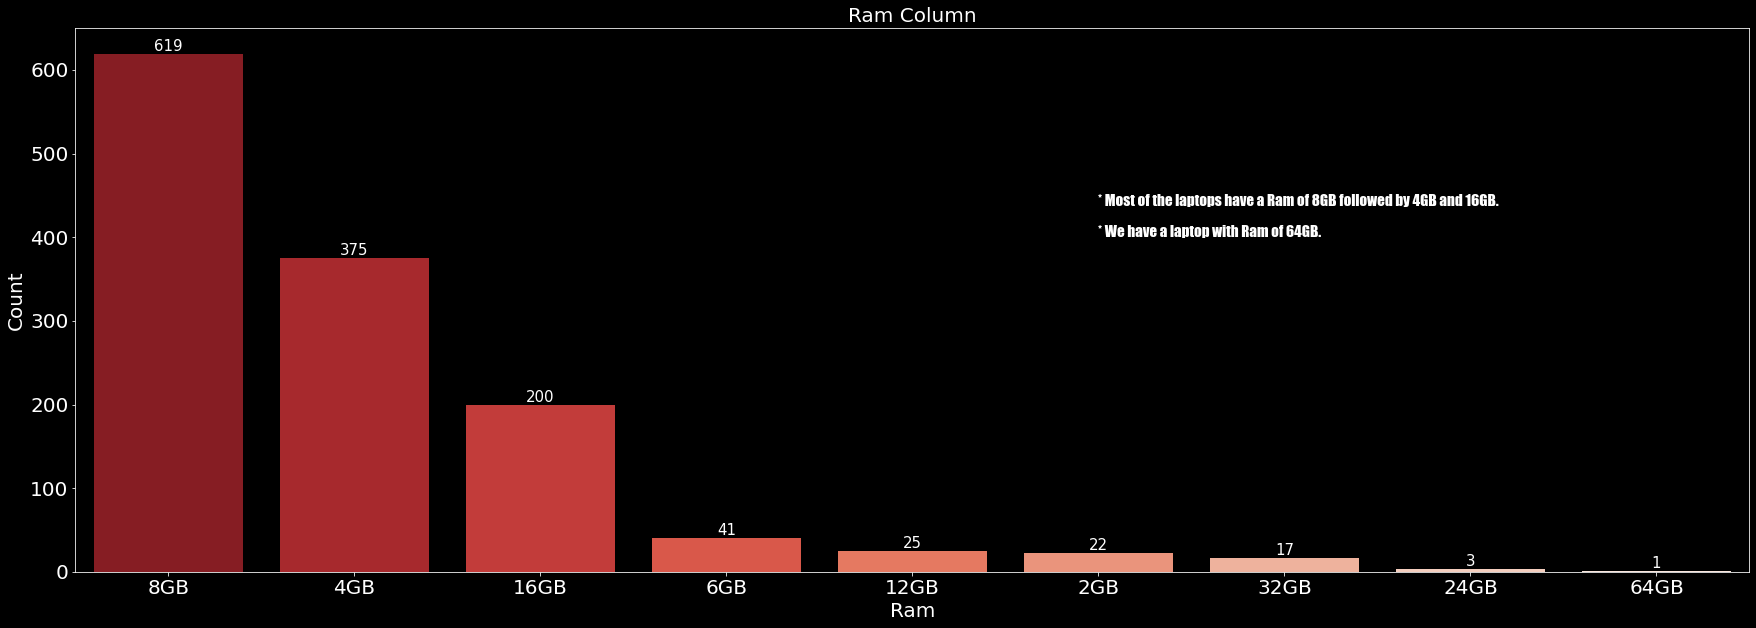

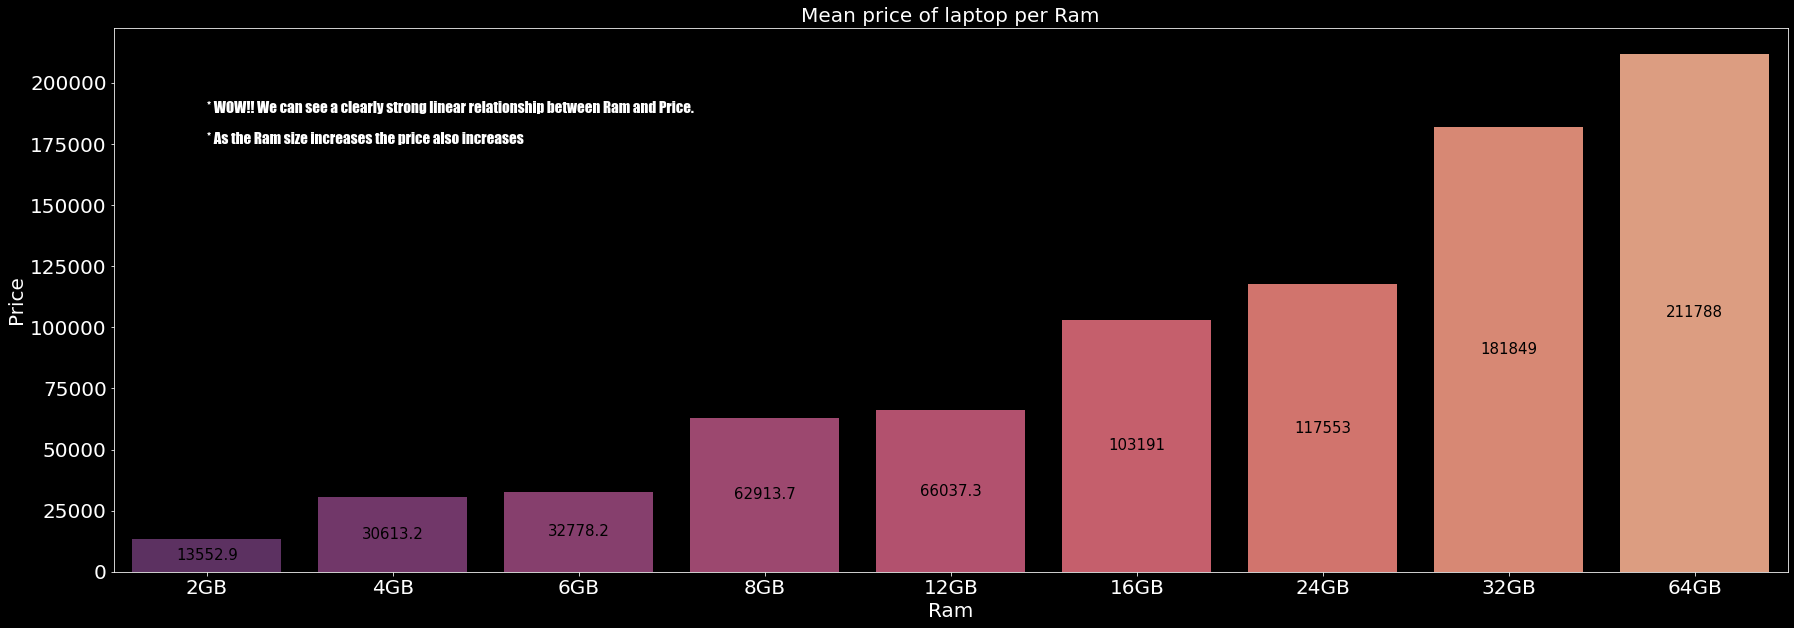

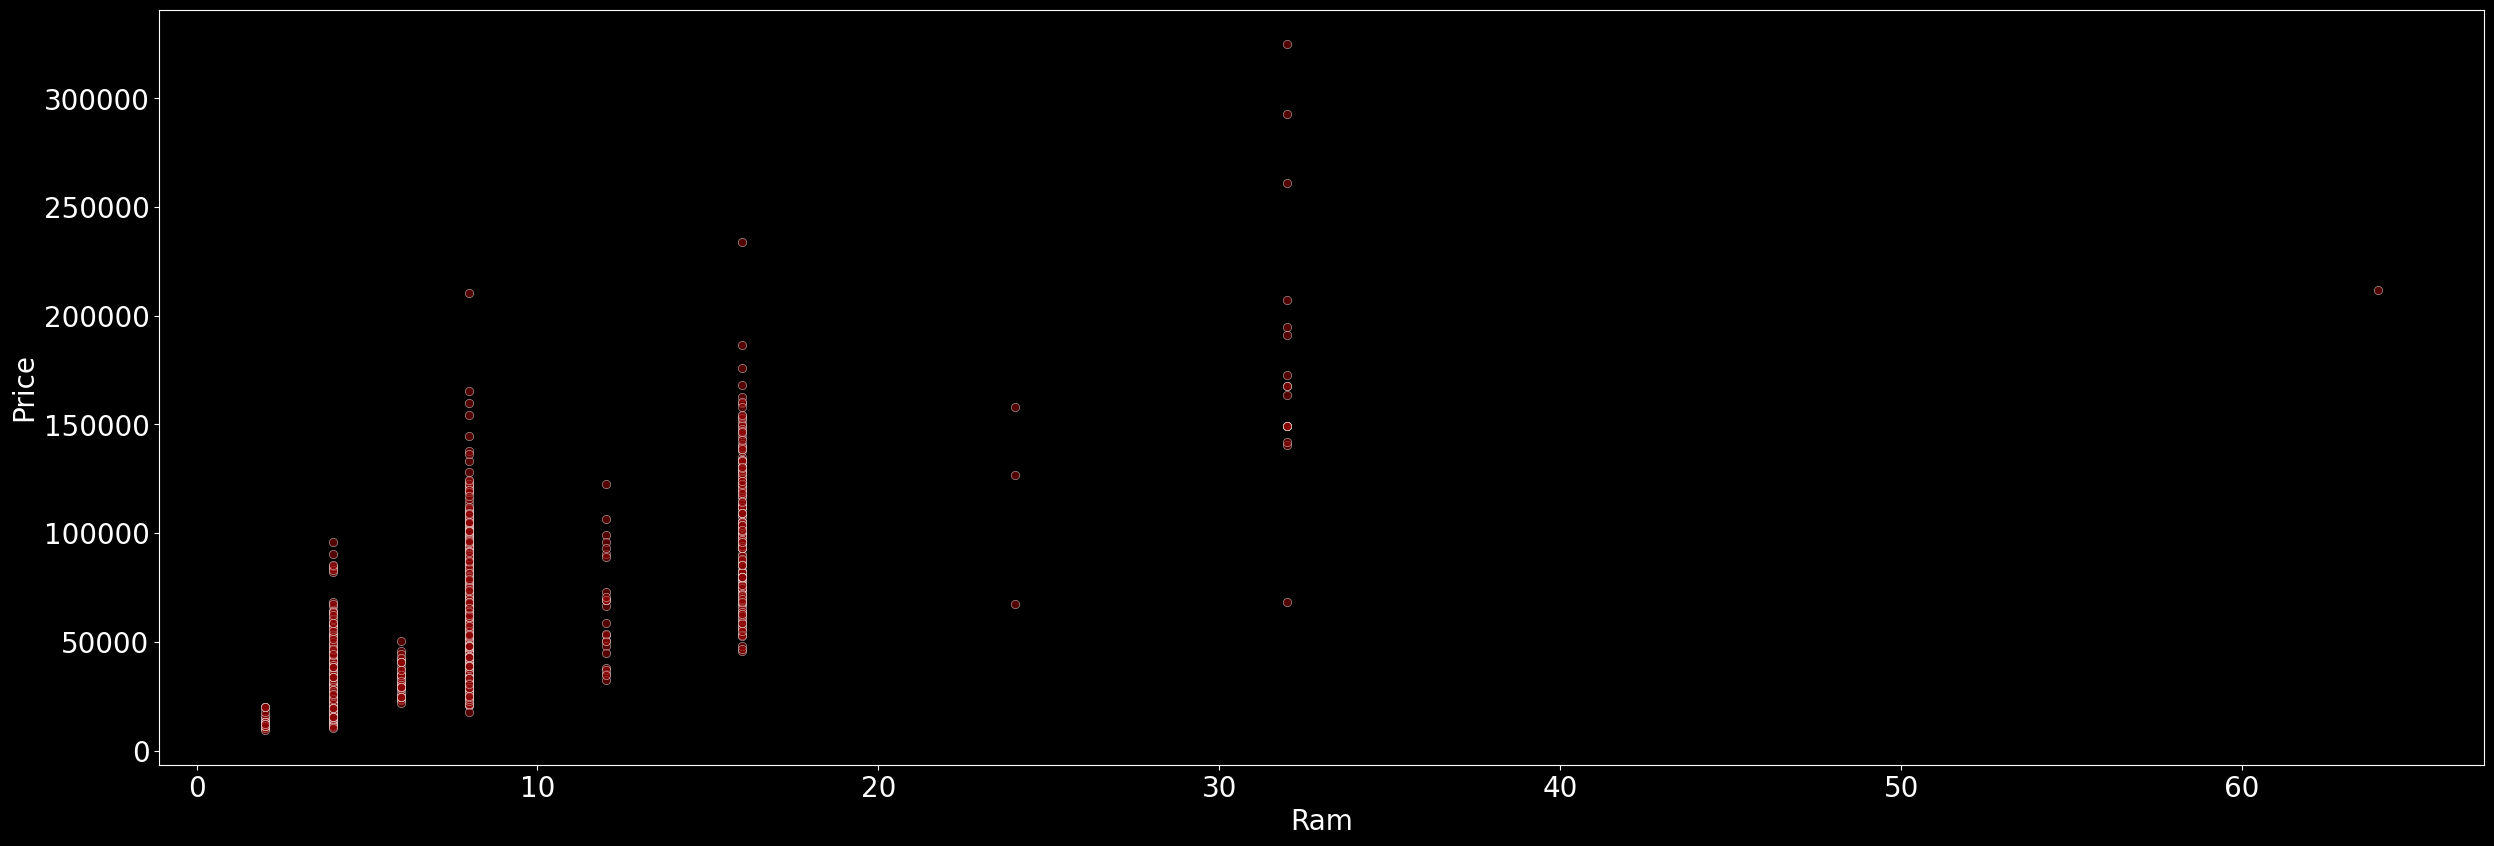

In [135]:
# View the plot

plt.figure(figsize = (30,10))
ax = sns.countplot(data = data1, x = "Ram",order = data1["Ram"].value_counts().index, palette = "Reds_r")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Ram", size = 20)
plt.ylabel("Count", size =20)
plt.title("Ram Column", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(5,400,'''* Most of the laptops have a Ram of 8GB followed by 4GB and 16GB.

* We have a laptop with Ram of 64GB.'''
         ,size = 15,fontdict=font)

ax.bar_label(ax.containers[0],size = 15)

plt.show()



plt.figure(figsize = (30,10))
ax = sns.barplot(data = pd.pivot_table(data = data1,index = "Ram",values = "Price").reset_index().iloc[[3,5,7,8,0,1,2,4,6],:].reset_index(drop = True), x = "Ram",y = "Price",palette = "flare_r")
ax.bar_label(ax.containers[0],size = 15,color = "black",label_type='center')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Ram", size = 20)
plt.ylabel("Price", size =20)
plt.title("Mean price of laptop per Ram", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(0,175e3,'''* WOW!! We can see a clearly strong linear relationship between Ram and Price.

* As the Ram size increases the price also increases'''
         ,size = 15,fontdict=font)


plt.show()



temp = {"Ram": list(data1["Ram"].apply(lambda x: float(x.strip("GB")))),
        "Price": list(data1["Price"])}
temp = pd.DataFrame(temp)



plt.figure(figsize = (30,10),dpi = 100)
sns.scatterplot(data = temp, x = "Ram", y = "Price",color = "DarkRed",alpha = 0.6)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Ram", size = 20)
plt.ylabel("Price", size =20)
plt.show()


**Memory**
- 

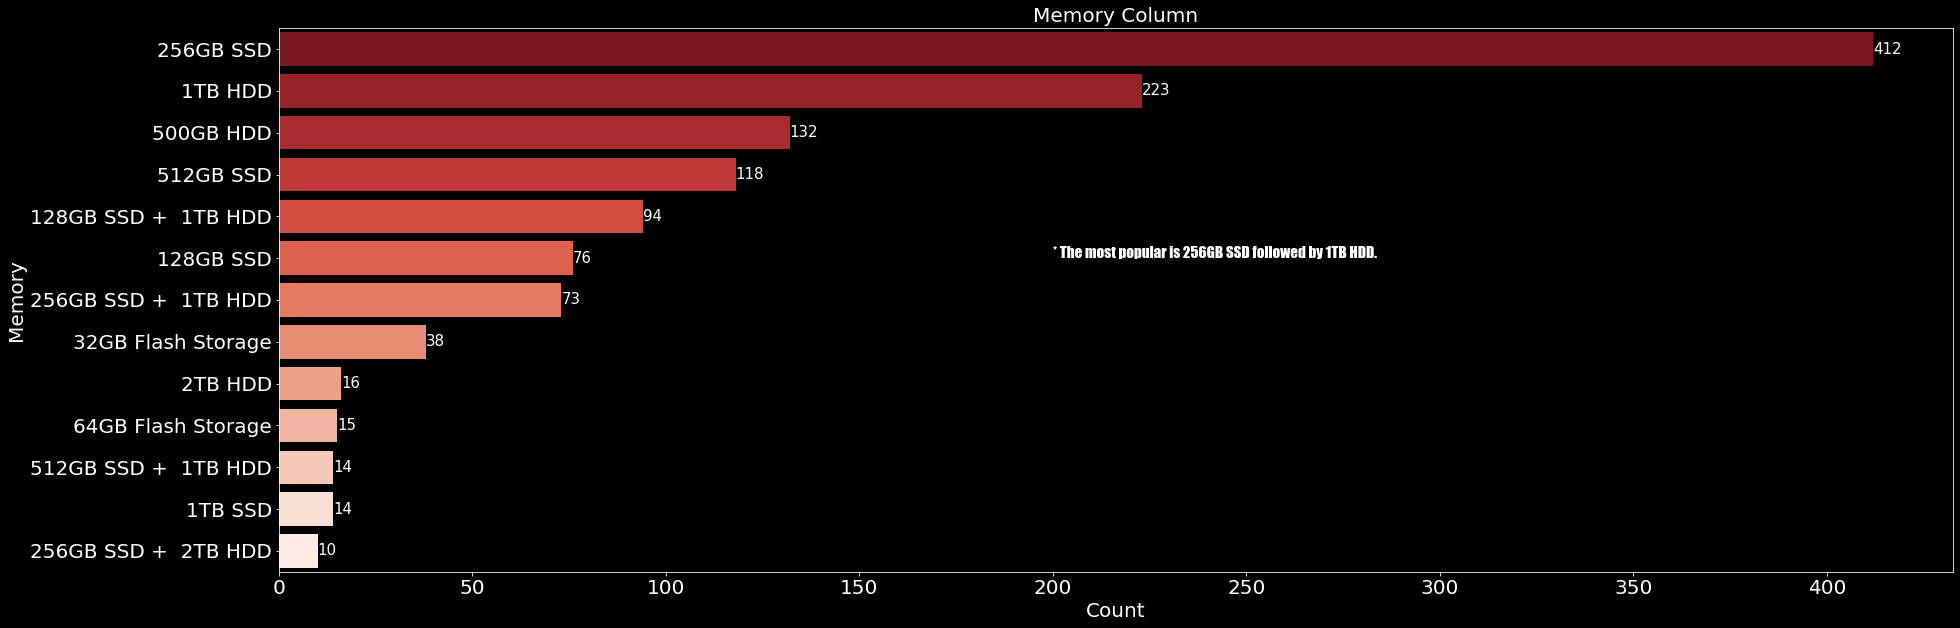

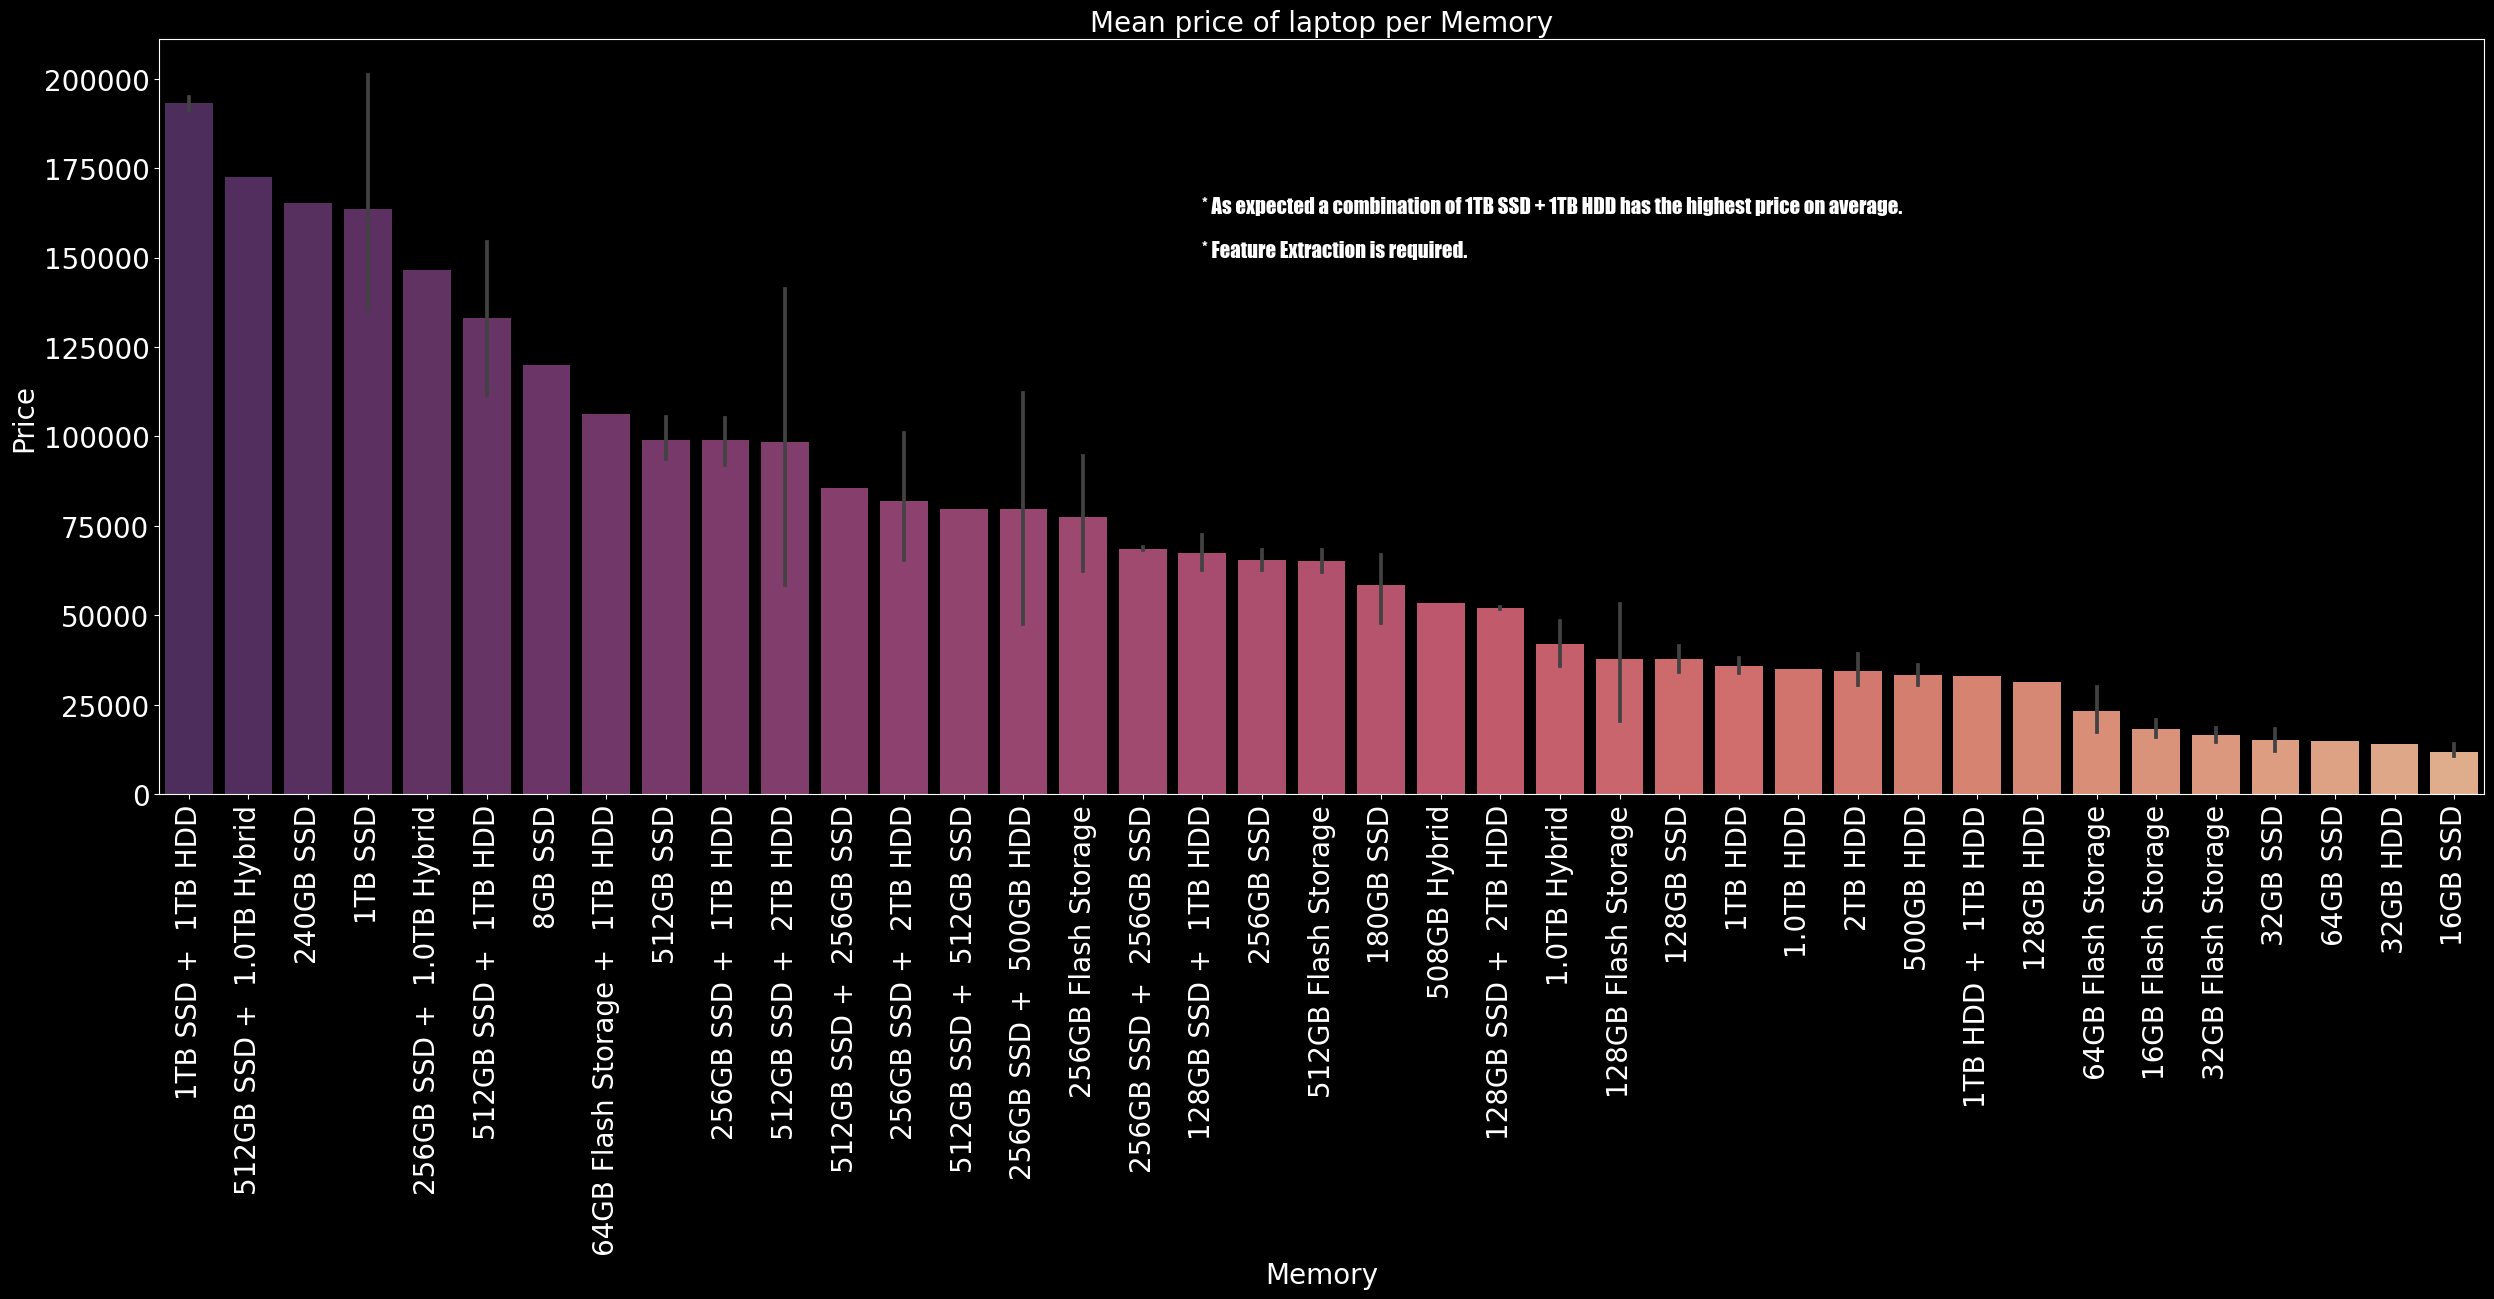

In [136]:
# View the plot

plt.figure(figsize = (30,10))
Memory_count = data1["Memory"].value_counts()
ax = sns.barplot(data = pd.DataFrame(Memory_count[data1["Memory"].value_counts() >= 10]).reset_index(), x = "Memory", y = "index", palette = "Reds_r")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel("Memory", size = 20)
plt.xlabel("Count", size =20)
plt.title("Memory Column", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(200,5,'''* The most popular is 256GB SSD followed by 1TB HDD.'''
         ,size = 15,fontdict=font)


ax.bar_label(ax.containers[0],size = 15)

plt.show()





plt.figure(figsize = (30,10),dpi = 100)
sns.barplot(data = data1, x = "Memory", y = "Price", order = pd.pivot_table(data = data1,values = "Price",index = "Memory").sort_values(by = "Price", ascending = False).index, palette = "flare_r")
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel("Memory", size = 20)
plt.ylabel("Price", size =20)
plt.title("Mean price of laptop per Memory", size = 20)


font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(17,15e4,'''* As expected a combination of 1TB SSD + 1TB HDD has the highest price on average.

* Feature Extraction is required.'''
         ,size = 15,fontdict=font)

plt.show()

**Gpu**
- 

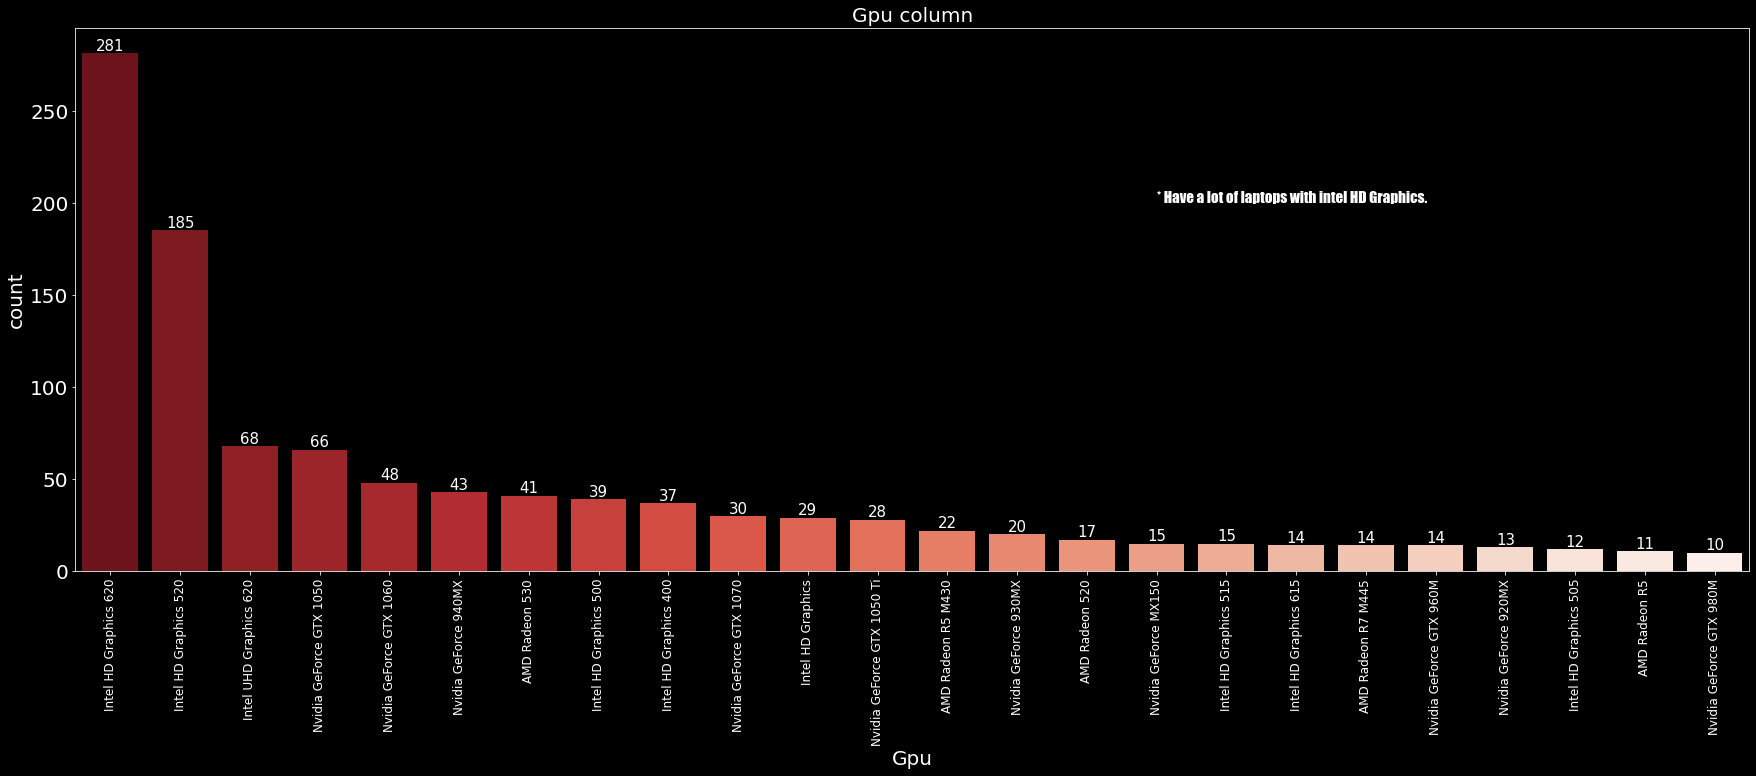

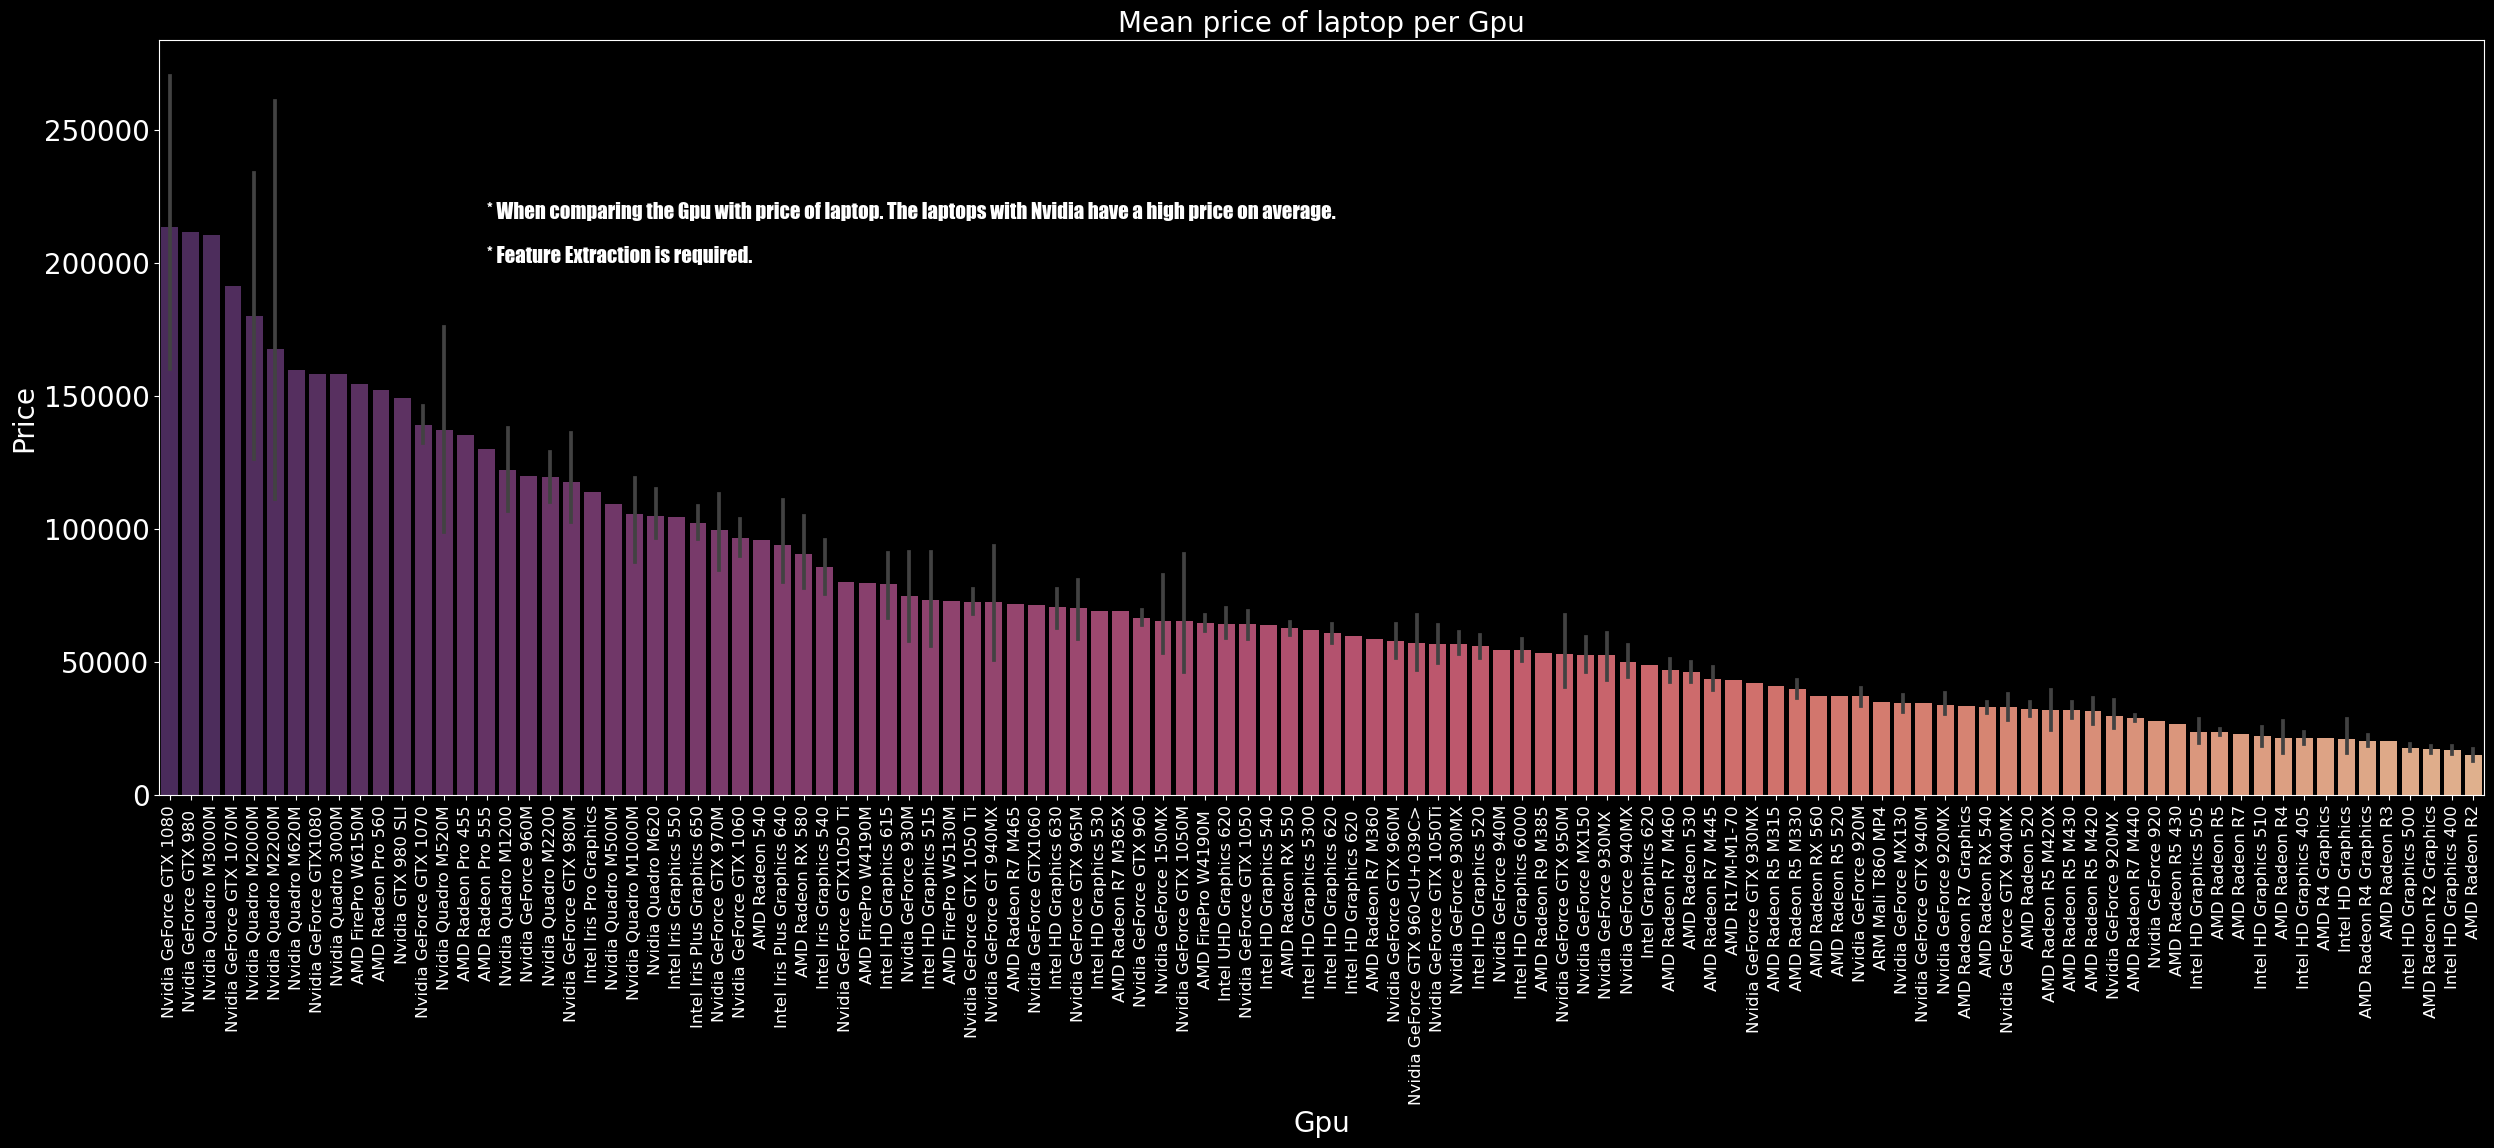

In [137]:
# View the Plot

plt.figure(figsize = (30,10))
Gpu_count = data1["Gpu"].value_counts()
Gpu_count_above_9 = Gpu_count[Gpu_count >= 10]
mask_plot = data1[data1["Gpu"].isin(list(Gpu_count_above_9.index))]
ax = sns.countplot(data = mask_plot, x = "Gpu", order = mask_plot["Gpu"].value_counts().index, palette="Reds_r")

plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 20)
plt.xlabel("Gpu",size = 20)
plt.ylabel("count",size = 20)
plt.title("Gpu column", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(15,200,'''* Have a lot of laptops with intel HD Graphics.'''
         ,size = 15,fontdict=font)


ax.bar_label(ax.containers[0],size = 15)
plt.show()




plt.figure(figsize = (30,10),dpi = 100)
sns.barplot(data = data1, x = "Gpu", y = "Price", order = pd.pivot_table(data = data1,values = "Price",index = "Gpu").sort_values(by = "Price", ascending = False).index, palette = "flare_r")
plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 20)
plt.xlabel("Gpu",size = 20)
plt.ylabel("Price",size = 20)
plt.title("Mean price of laptop per Gpu", size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(15,2e5,'''* When comparing the Gpu with price of laptop. The laptops with Nvidia have a high price on average.

* Feature Extraction is required.'''
         ,size = 15,fontdict=font)

plt.show()

**OpSys**
- 

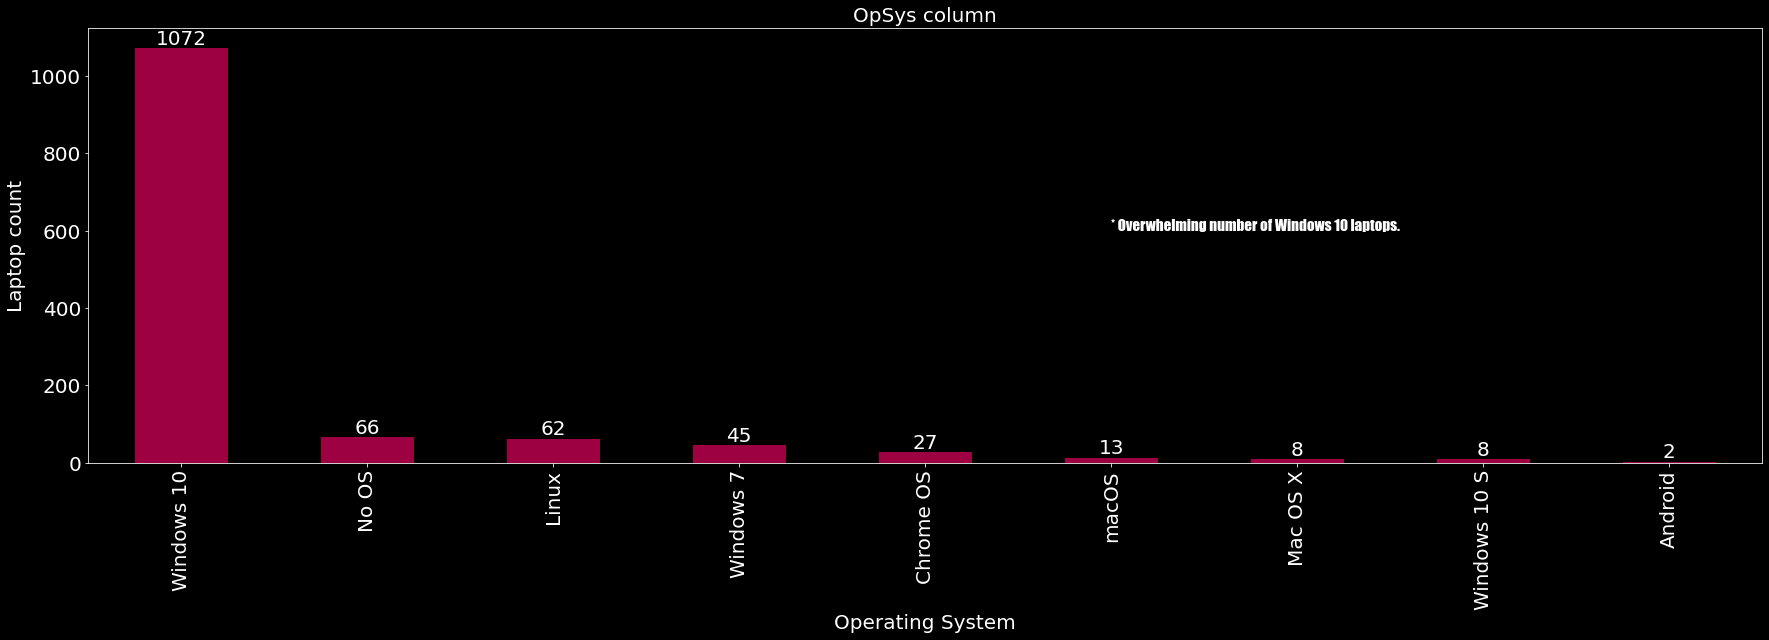

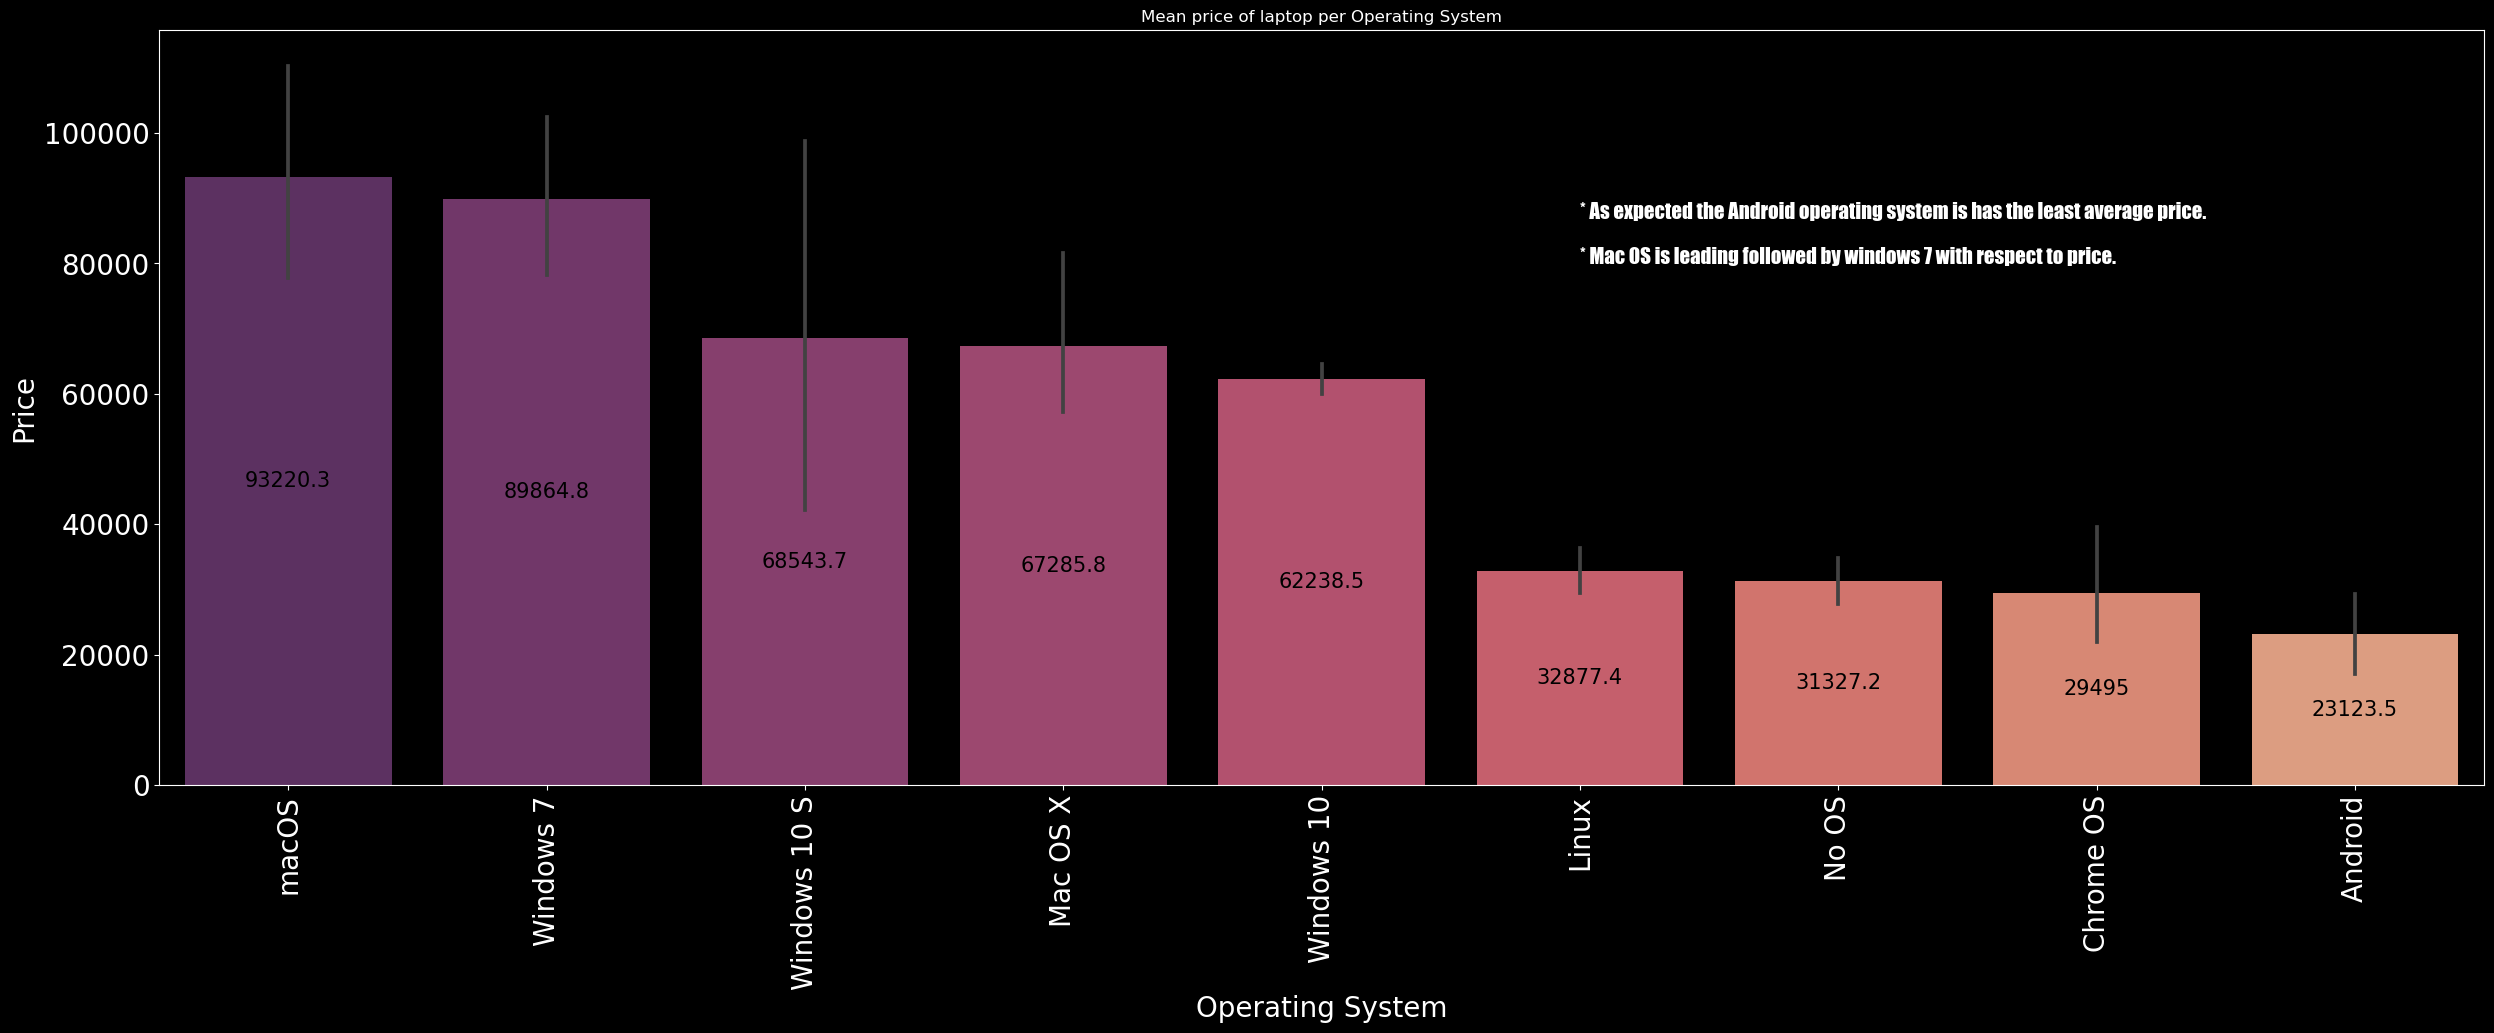

In [138]:
# View the plot

plt.figure(figsize = (30,8))
data1_company_bar = data1["OpSys"].value_counts().plot(kind = "bar",cmap = "Spectral")

for container in data1_company_bar.containers:
    data1_company_bar.bar_label(container,size = 20)

plt.xlabel("Operating System",size = 20)
plt.ylabel("Laptop count",size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title("OpSys column",size = 20)

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(5,600,'''* Overwhelming number of Windows 10 laptops.'''
         ,size = 15,fontdict=font)

plt.show()





plt.figure(figsize = (30,10),dpi = 100)
ax = sns.barplot(data = data1, x = "OpSys", y = "Price", order = pd.pivot_table(data = data1,values = "Price",index = "OpSys").sort_values(by = "Price", ascending = False).index, palette = "flare_r")



plt.xticks(rotation = 90,size = 20)
plt.yticks(size = 20)
plt.xlabel("Operating System",size = 20)
plt.ylabel("Price",size = 20)
plt.title("Mean price of laptop per Operating System")

font = {'family': 'fantasy',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }
plt.text(5,8e4,'''* As expected the Android operating system is has the least average price.

* Mac OS is leading followed by windows 7 with respect to price.'''
         ,size = 15,fontdict=font)

ax.bar_label(ax.containers[0],size = 15,color = "black",label_type='center')
plt.show()

**Weight**
- 

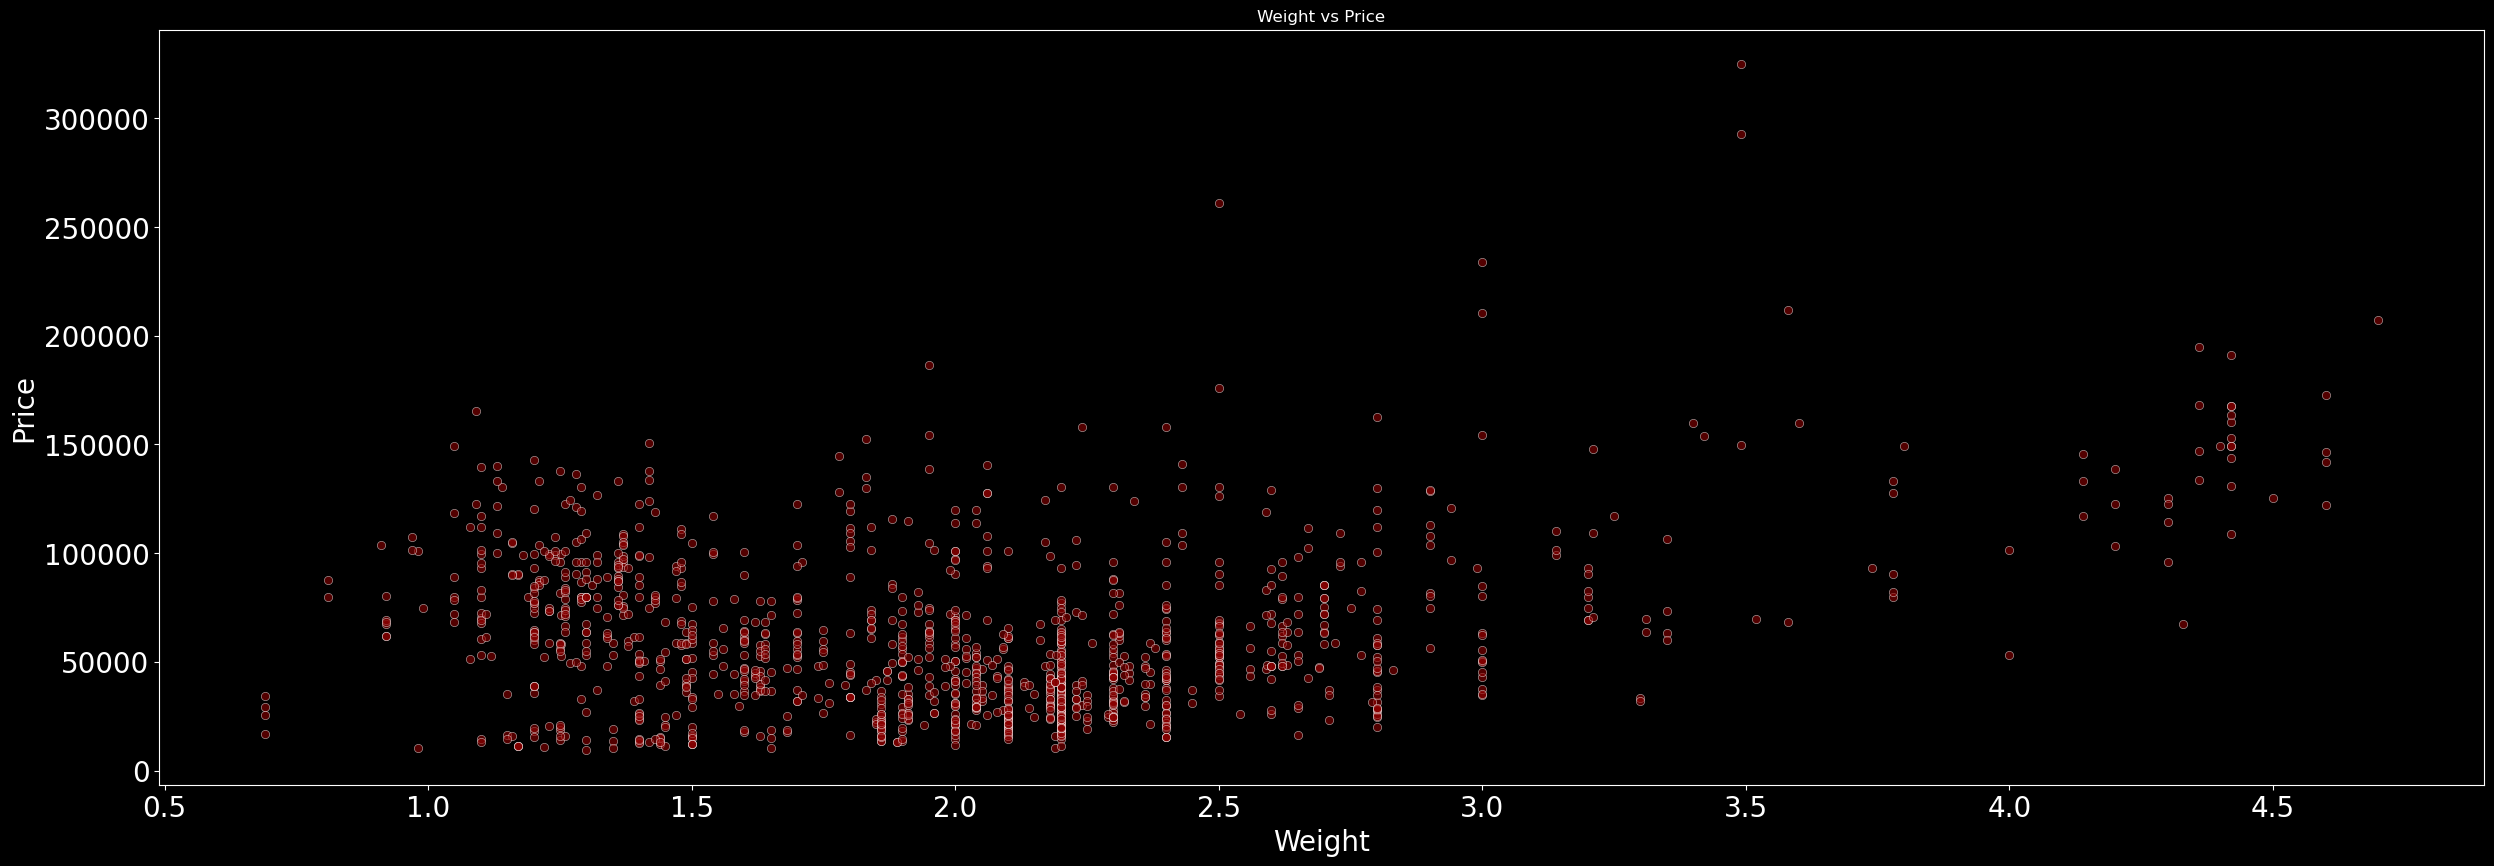

In [139]:
# There seems to be slightly positive correlation between Weight and Price

temp = {"Weight": list(data1["Weight"].apply(lambda x: float(x.strip("kg")))),
        "Price": list(data1["Price"])}
temp = pd.DataFrame(temp)


plt.figure(figsize = (30,10),dpi = 100)
sns.scatterplot(data = temp, x = "Weight", y = "Price",color = "DarkRed",alpha = 0.6)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Weight",size = 20)
plt.ylabel("Price",size = 20)
plt.title("Weight vs Price")
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Cleaning and Feature Engineering</p>
<a id="5"></a>

## Company

In [140]:
temp = ['Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei']

data1["Company_new"] = data1["Company"].apply(lambda x: "Other_company"if x in temp else x)

data1.drop("Company", axis = 1,inplace = True)

## ScreenResolution

In [141]:
# Extracting and creating 5 new features from ScreenResolution
data1["ScreenRes_x"] = data1["ScreenResolution"].apply(lambda x: int(x.split()[-1].split("x")[0]))
data1["ScreenRes_y"] = data1["ScreenResolution"].apply(lambda x: int(x.split()[-1].split("x")[1]))


data1["Touchscreen"] = data1["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)
data1["IPS Panel"] = data1["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
data1["Full HD"] = data1["ScreenResolution"].apply(lambda x: 1 if "Full HD" in x else 0)
data1["4K Ultra HD"] = data1["ScreenResolution"].apply(lambda x: 1 if "4K Ultra HD" in x else 0)

data1.drop("ScreenResolution", axis = 1,inplace = True)

## Cpu

In [142]:
# Extracting multiple columns from CPU Feature
data1["Cpu_new"] = data1.Cpu.apply(lambda x: x.split()[0:3] if "Intel" in x else (x.split()[0:2] if "AMD" or "Samsung" in x else np.nan))
data1["Cpu_new"] = data1["Cpu_new"].apply(lambda x: x[0:2] if " Atom" or " Xeon" in x[1] else x)
data1["Cpu_new"] = data1["Cpu_new"].apply(lambda x: str(" ".join(x)))

data1["Processor_GHz"] = data1["Cpu"].apply(lambda x: float(x.split()[-1].split("GHz")[0]))

data1 = data1.iloc[data1[data1["Cpu_new"] != "Samsung Cortex"].index].reset_index(drop = True)
data1["Cpu_new"] = data1["Cpu_new"].apply(lambda x: "Intel_cpu" if "Intel" in x else "Amd_cpu")

data1.drop("Cpu",axis = 1, inplace = True)

## Ram

In [143]:
# Removing the GB and convert to type int.
data1["Ram"] = data1["Ram"].apply(lambda x: int(x.split("GB")[0]))

## Memory

In [144]:
# Spliting the data in Memory column on "+".
temp = data1["Memory"].apply(lambda x: x.split("+"))

# Removing extra whitespace and creating a list 
data1["Memory_clean"] = temp.apply(lambda x: [x[len(x)-1].strip()] if len(x) == 1 else ([x[len(x)-1].strip(), x[len(x)-2].strip() if len(x) == 2 else x]))

# Extracting the numbers where len(list) == 1. i.e., extracting from list[0]
data1["SSD1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 1 and "SSD" in x[len(x)-1]  else 0)
data1["HDD1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 1 and "HDD" in x[len(x)-1]  else 0)
data1["Flash Storage1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 1 and "Flash Storage" in x[len(x)-1]  else 0)
data1["Hybrid1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 1 and "Hybrid" in x[len(x)-1]  else 0)

# Extracting the numbers where len(list) == 2. i.e., extract form list[0] and list[1]
data1["SSD_2_1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-2])[0]) if len(x) == 2 and "SSD" in x[len(x) - 2] else 0)
data1["SSD_2_2"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 2 and "SSD" in x[len(x) - 1] else 0)


data1["HDD_2_1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-2])[0]) if len(x) == 2 and "HDD" in x[len(x) - 2] else 0)
data1["HDD_2_2"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 2 and "HDD" in x[len(x) - 1] else 0)


data1["Flash Storage_2_1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-2])[0]) if len(x) == 2 and "Flash Storage" in x[len(x) - 2] else 0)
data1["Flash Storage_2_2"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 2 and "Flash Storage" in x[len(x) - 1] else 0)


data1["Hybrid_2_1"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-2])[0]) if len(x) == 2 and "Hybrid" in x[len(x) - 2] else 0)
data1["Hybrid_2_2"] = data1["Memory_clean"].apply(lambda x: float(re.findall("\d{1,3}",x[len(x)-1])[0]) if len(x) == 2 and "Hybrid" in x[len(x) - 1] else 0)


# Converting TB to GB.
data1[['SSD1',
       'HDD1', 'Flash Storage1', 'Hybrid1', 'SSD_2_1', 'SSD_2_2', 'HDD_2_1',
       'HDD_2_2', 'Flash Storage_2_1', 'Flash Storage_2_2', 'Hybrid_2_1',
       'Hybrid_2_2']] = pd.DataFrame(np.vectorize(lambda x: x * 1000 if x == 1.0 or x == 2.0 else x)(data1[['SSD1',
       'HDD1', 'Flash Storage1', 'Hybrid1', 'SSD_2_1', 'SSD_2_2', 'HDD_2_1',
       'HDD_2_2', 'Flash Storage_2_1', 'Flash Storage_2_2', 'Hybrid_2_1',
       'Hybrid_2_2']]),
                                     columns=['SSD1',
       'HDD1', 'Flash Storage1', 'Hybrid1', 'SSD_2_1', 'SSD_2_2', 'HDD_2_1',
       'HDD_2_2', 'Flash Storage_2_1', 'Flash Storage_2_2', 'Hybrid_2_1',
       'Hybrid_2_2'])


# Creating a seperate columns for SSD, HDD, Flash Storage and Hybrid
data1["SSD"] = data1["SSD1"] + data1["SSD_2_1"] + data1["SSD_2_2"]
data1["HDD"] = data1["HDD1"] + data1["HDD_2_1"] + data1["HDD_2_2"]
data1["Flash Storage"] = data1["Flash Storage1"] + data1["Flash Storage_2_1"] + data1["Flash Storage_2_2"]
data1["Hybrid"] = data1["Hybrid1"] + data1["Hybrid_2_1"] + data1["Hybrid_2_2"]

# float to int convert
data1[["SSD","HDD","Flash Storage","Hybrid"]] = pd.DataFrame(np.vectorize(lambda x: int(x))(data1[["SSD","HDD","Flash Storage","Hybrid"]]),columns= ["SSD","HDD","Flash Storage","Hybrid"])

# Drop columns that are not required
data1.drop(['SSD1',
       'HDD1', 'Flash Storage1', 'Hybrid1', 'SSD_2_1', 'SSD_2_2', 'HDD_2_1',
       'HDD_2_2', 'Flash Storage_2_1', 'Flash Storage_2_2', 'Hybrid_2_1',
       'Hybrid_2_2',"Memory_clean"],axis = 1, inplace = True)

data1.drop("Memory",axis = 1, inplace = True)

## Gpu

In [145]:
# one hot encode
data1["Gpu_new"] = data1["Gpu"].apply(lambda x: x.split()[0:2])
data1["Gpu_new"]= data1["Gpu_new"].apply(lambda x : " ".join(x))

data1["Gpu_new"] = data1["Gpu_new"].apply(lambda x:"Intel_gpu" if "Intel" in x else("Nvidia_gpu" if "Nvidia" in x else("Amd_gpu")))

data1.drop("Gpu", axis = 1, inplace = True)

## OpSys

In [146]:
# one hot encode
def opsys(column):
    if "Windows" in column:
        return "Windows"
    elif column == "Mac OS X" or column == "macOS":
        return "Mac"
    else:
        return "Other_os"
data1["OpSys_new"] = data1["OpSys"].apply(opsys)

data1.drop("OpSys",axis = 1, inplace = True)

## Weight

In [147]:
# convert to dtype float
data1["Weight"] = data1["Weight"].apply(lambda x: float(x.split("kg")[0]))

## PPi

In [148]:
data1["Ppi"] = (np.sqrt((data1["ScreenRes_x"] ** 2) + (data1["ScreenRes_y"] ** 2)))/ data1["Inches"]

data1.drop(["ScreenRes_x","ScreenRes_y","Inches"], axis = 1, inplace = True)

In [149]:
data2 = data1.copy()

In [150]:
data2

TypeName  Ram  Weight        Price Company_new  Touchscreen  \
0              Ultrabook    8    1.37   71378.6832       Apple            0   
1              Ultrabook    8    1.34   47895.5232       Apple            0   
2               Notebook    8    1.86   30636.0000          HP            0   
3              Ultrabook   16    1.83  135195.3360       Apple            0   
4              Ultrabook    8    1.37   96095.8080       Apple            0   
...                  ...  ...     ...          ...         ...          ...   
1297  2 in 1 Convertible    4    1.80   33992.6400      Lenovo            1   
1298  2 in 1 Convertible   16    1.30   79866.7200      Lenovo            1   
1299            Notebook    2    1.50   12201.1200      Lenovo            0   
1300            Notebook    6    2.19   40705.9200          HP            0   
1301            Notebook    4    2.20   19660.3200        Asus            0   

      IPS Panel  Full HD  4K Ultra HD    Cpu_new  Processor_GHz  SSD   HDD  \
0             1        0            0  Intel_cpu            2.3  128     0   
1             0        0            0  Intel_cpu            1.8    0     0   
2             0        1            0  Intel_cpu            2.5  256     0   
3             1        0            0  Intel_cpu            2.7  512     0   
4             1        0            0  Intel_cpu            3.1  256     0   
...         ...      ...          ...        ...            ...  ...   ...   
1297          1        1            0  Intel_cpu            2.5  128     0   
1298          1        0            0  Intel_cpu            2.5  512     0   
1299          0        0            0  Intel_cpu            1.6    0     0   
1300          0        0            0  Intel_cpu            2.5    0  1000   
1301          0        0            0  Intel_cpu            1.6    0   500   

      Flash Storage  Hybrid    Gpu_new OpSys_new         Ppi  
0                 0       0  Intel_gpu       Mac  226.983005  
1               128       0  Intel_gpu       Mac  127.677940  
2                 0       0  Intel_gpu  Other_os  141.211998  
3                 0       0    Amd_gpu       Mac  220.534624  
4                 0       0  Intel_gpu       Mac  226.983005  
...             ...     ...        ...       ...         ...  
1297              0       0  Intel_gpu   Windows  157.350512  
1298              0       0  Intel_gpu   Windows  276.053530  
1299             64       0  Intel_gpu   Windows  111.935204  
1300              0       0    Amd_gpu   Windows  100.454670  
1301              0       0  Intel_gpu   Windows  100.454670  

[1302 rows x 18 columns]

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Variable Transformations</p>
<a id="6"></a>

In [151]:
# Selecting the columns with dtype float or int.
data2_numerical = data2[["Ram","Weight","Processor_GHz","SSD","HDD","Flash Storage","Hybrid","Ppi"]].columns

In [152]:
# To determine the skewness of the numerical data
skewed = []
skewed_ip = []

for col in data2_numerical: 
    
    
    skewed.append(data2[col].skew())
    
    if data2[col].skew() > -0.5 and data2[col].skew() < 0.5:
        skewed_ip.append("Close to normal")
    if (data2[col].skew() > -1 and data2[col].skew() < -0.5) or (data2[col].skew() > 0.5 and data2[col].skew() < 1.0):
         skewed_ip.append("A bit skewed")
    if data2[col].skew() < -1 or data2[col].skew() > 1.0:
         skewed_ip.append("Highly skewed")



pd.DataFrame({"Column": data2_numerical,
             "skewed": skewed,
             "skewed_ip": skewed_ip})

Column     skewed      skewed_ip
0            Ram   2.686583  Highly skewed
1         Weight   1.145635  Highly skewed
2  Processor_GHz  -0.833739   A bit skewed
3            SSD   1.369358  Highly skewed
4            HDD   0.886719   A bit skewed
5  Flash Storage  11.099211  Highly skewed
6         Hybrid  10.503330  Highly skewed
7            Ppi   2.031134  Highly skewed

In [153]:
# perfoming log transformation on Price. Since it is right skewed
#data2["Price"] = np.log(data2["Price"])

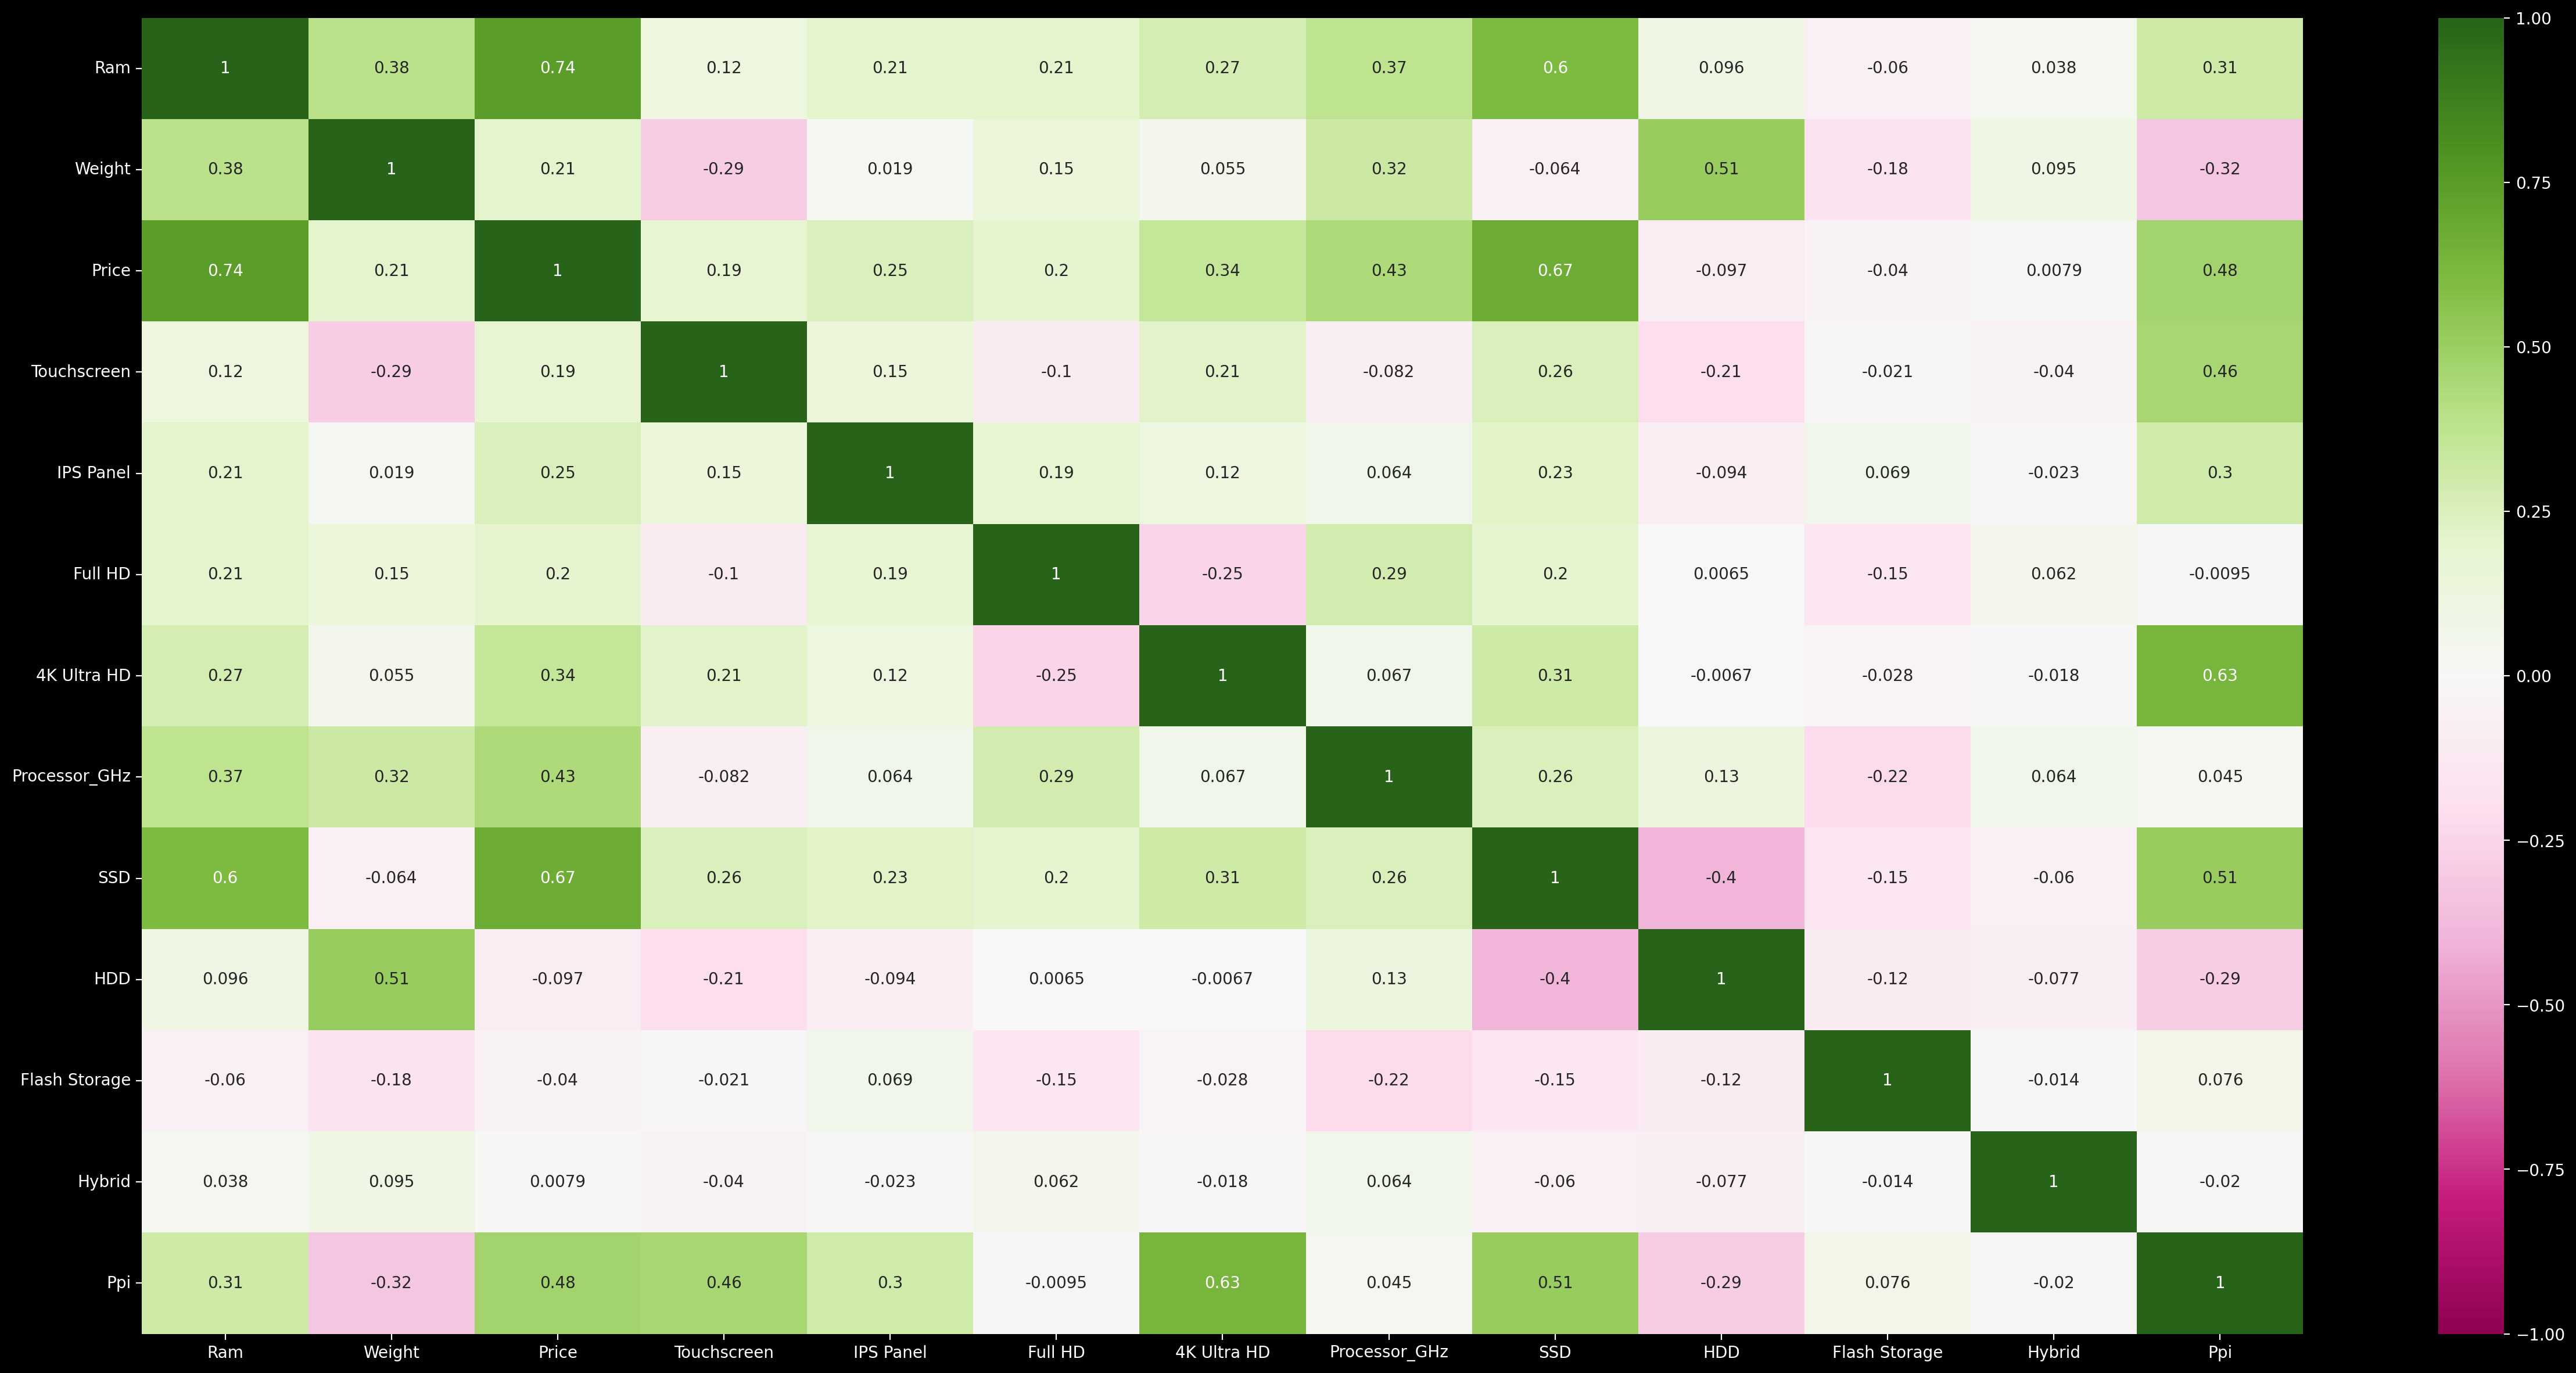

In [154]:
# Complete correlation
plt.figure(figsize = (30,15), dpi = 200)
sns.heatmap(data2.corr(), cmap = "PiYG",vmin=-1, vmax = +1, annot = True)
plt.show()

In [155]:
abs(data2.corr().drop("Price").drop("Price", axis = 1))[abs(data2.corr()) > 0.7]

Ram  Weight  Touchscreen  IPS Panel  Full HD  4K Ultra HD  \
Ram            1.0     NaN          NaN        NaN      NaN          NaN   
Weight         NaN     1.0          NaN        NaN      NaN          NaN   
Touchscreen    NaN     NaN          1.0        NaN      NaN          NaN   
IPS Panel      NaN     NaN          NaN        1.0      NaN          NaN   
Full HD        NaN     NaN          NaN        NaN      1.0          NaN   
4K Ultra HD    NaN     NaN          NaN        NaN      NaN          1.0   
Processor_GHz  NaN     NaN          NaN        NaN      NaN          NaN   
SSD            NaN     NaN          NaN        NaN      NaN          NaN   
HDD            NaN     NaN          NaN        NaN      NaN          NaN   
Flash Storage  NaN     NaN          NaN        NaN      NaN          NaN   
Hybrid         NaN     NaN          NaN        NaN      NaN          NaN   
Ppi            NaN     NaN          NaN        NaN      NaN          NaN   

               Processor_GHz  SSD  HDD  Flash Storage  Hybrid  Ppi  
Ram                      NaN  NaN  NaN            NaN     NaN  NaN  
Weight                   NaN  NaN  NaN            NaN     NaN  NaN  
Touchscreen              NaN  NaN  NaN            NaN     NaN  NaN  
IPS Panel                NaN  NaN  NaN            NaN     NaN  NaN  
Full HD                  NaN  NaN  NaN            NaN     NaN  NaN  
4K Ultra HD              NaN  NaN  NaN            NaN     NaN  NaN  
Processor_GHz            1.0  NaN  NaN            NaN     NaN  NaN  
SSD                      NaN  1.0  NaN            NaN     NaN  NaN  
HDD                      NaN  NaN  1.0            NaN     NaN  NaN  
Flash Storage            NaN  NaN  NaN            1.0     NaN  NaN  
Hybrid                   NaN  NaN  NaN            NaN     1.0  NaN  
Ppi                      NaN  NaN  NaN            NaN     NaN  1.0

In [156]:
data2.corr().drop("Price")["Price"]

Ram              0.742905
Weight           0.209867
Touchscreen      0.192917
IPS Panel        0.253320
Full HD          0.198093
4K Ultra HD      0.343951
Processor_GHz    0.430122
SSD              0.670660
HDD             -0.096891
Flash Storage   -0.040067
Hybrid           0.007942
Ppi              0.475368
Name: Price, dtype: float64

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model</p>

In [157]:
X = data2.drop("Price",axis = 1)
y = np.log(data2["Price"])

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.1, random_state = 101)

In [159]:
step1 = ColumnTransformer(transformers = [
    ("PT",PowerTransformer(),[1,2,9,10,11,12,13,16]),
    ("ohe", OneHotEncoder(sparse = False, drop = "first"),[0,3,8,14,15])
],remainder = "passthrough")

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Linear Regression</p>

In [160]:
lr = LinearRegression()

In [161]:
param_grid = {"positive": [True, False],
             "fit_intercept": [True,False]}

In [162]:
lr_gridsearch = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5, scoring = "r2", verbose = 0, n_jobs = -1)

In [163]:
pipe = Pipeline([
    ("step1",step1),
    ("lr_gridsearch",lr_gridsearch)
])

In [164]:
result = pipe.fit(X_train,y_train)

In [165]:
result['lr_gridsearch'].best_estimator_.coef_

array([ 2.30114655e-01, -4.20685632e-02,  1.22603367e-01,  1.84605926e-01,
        7.96878891e-02, -1.68408960e-02,  2.23440345e-02, -4.99600361e-16,
       -3.59298666e-02, -1.93776999e-01, -1.96844723e-01,  8.97759979e-02,
        3.28618218e-01,  3.70652218e-01,  3.31667085e-02,  1.43288583e-01,
        2.15917197e-01,  9.64759769e-02,  7.56270826e-02,  8.97715968e-02,
        2.70762880e-01,  4.18582878e-01,  2.98250049e-02,  5.57668123e-02,
       -2.82821439e-01, -8.78307790e-02,  1.85570341e-02,  1.31484238e-02,
        3.78684950e-02,  2.64928523e-01])

In [166]:
LR = result['lr_gridsearch'].best_score_

In [167]:
result['lr_gridsearch'].best_params_

{'fit_intercept': True, 'positive': False}

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Ridge Regression</p>

In [168]:
ridge = Ridge()

param_grid = {"alpha": [0.1,0.5,1,5,10,50,100]}

ridge_grid = GridSearchCV(estimator = ridge,param_grid = param_grid,cv = 5, scoring = "r2", verbose = 0, n_jobs = -1)


pipe = Pipeline([
    ("step1",step1),
    ("ridge_grid",ridge_grid)
])


#pipe.get_params()

result = pipe.fit(X_train,y_train)

In [169]:
RR = result["ridge_grid"].best_score_

In [170]:
result["ridge_grid"].best_params_

{'alpha': 1}

In [171]:
result["ridge_grid"].best_estimator_.coef_

array([ 0.23192068, -0.04246092,  0.12263838,  0.18408487,  0.07874204,
       -0.01665855,  0.02210901,  0.        , -0.03502129, -0.18668494,
       -0.19563209,  0.09209655,  0.31806306,  0.34473363,  0.01933966,
        0.13073405,  0.20202621,  0.08250333,  0.06141972,  0.07325062,
        0.25050393,  0.40901255,  0.03148178,  0.05797708, -0.2696543 ,
       -0.07507933,  0.01810323,  0.0141443 ,  0.03627784,  0.25639576])

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Lasso Regression</p>

In [172]:
lasso = Lasso()

param_grid = {"alpha": [0.1,0.5,1,5,10,50,100],
             "selection": ["cyclic","random"],
             "max_iter": [1000,5000]}

lasso_grid = GridSearchCV(estimator = lasso,param_grid = param_grid,cv = 5, scoring = "r2", verbose = 0, n_jobs = -1)


pipe = Pipeline([
    ("step1",step1),
    ("lasso_grid",lasso_grid)
])


#pipe.get_params()

result = pipe.fit(X_train,y_train)

In [173]:
L = result["lasso_grid"].best_score_

In [174]:
result["lasso_grid"].best_params_

{'alpha': 0.1, 'max_iter': 1000, 'selection': 'random'}

In [175]:
# .66 r2_score with just 3 features.
result["lasso_grid"].best_estimator_.coef_[result["lasso_grid"].best_estimator_.coef_ != 0]

array([0.28653383, 0.04799692, 0.13424368])

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ElasticNet Regression</p>

In [176]:
elasticnet = ElasticNet()

param_grid = {"alpha": [0.001,0.3,0.5,1,5,10,50,100],
             "l1_ratio": [0.1,0.5,0.7,0.95,0.99,1],
             "max_iter": [1000,5000,10000]}

elasticnet_grid = GridSearchCV(estimator = elasticnet,param_grid = param_grid,cv = 5, scoring = "r2", verbose = 0, n_jobs = -1)


pipe = Pipeline([
    ("step1",step1),
    ("elasticnet_grid",elasticnet_grid)
])


#pipe.get_params()

result = pipe.fit(X_train,y_train)

In [177]:
EN = result["elasticnet_grid"].best_score_

In [178]:
result["elasticnet_grid"].best_params_

{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000}

In [179]:
result["elasticnet_grid"].best_estimator_.coef_

array([ 0.23599099, -0.04600439,  0.12293971,  0.18114295,  0.07345735,
       -0.01780789,  0.02038012,  0.        , -0.00675412, -0.16383025,
       -0.184972  ,  0.09817759,  0.31697272,  0.34735368, -0.01335967,
        0.09040509,  0.16329309,  0.04509116,  0.00621302,  0.0198843 ,
        0.2006321 ,  0.41845584,  0.01638468,  0.03995267, -0.19797372,
       -0.        ,  0.01931977,  0.011799  ,  0.03070067,  0.24225667])

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">KNN Regression</p>

In [180]:
knn = KNeighborsRegressor()

param_grid = {"n_neighbors" : list(range(1,20))}

knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = "r2", verbose = 0, n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("knn_grid",knn_grid)
])

result = pipe.fit(X_train,y_train)

In [181]:
result["knn_grid"].best_params_

{'n_neighbors': 5}

In [182]:
KNN = result["knn_grid"].best_score_

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">SVR Regression</p>

In [183]:
svr = SVR()

param_grid = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
             "degree": list(range(1,4)),
             "gamma": ['scale','auto'],
             "C": [0.001,0.01,0.1,0.5,0.8,1],
             "epsilon":[0,0.01,0.1,0.5,1,2]}

svr_grid = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("svr_grid",svr_grid)
])

result = pipe.fit(X_train,y_train)

In [184]:
SVR = result["svr_grid"].best_score_

In [185]:
result["svr_grid"].best_params_

{'C': 1, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Decision Tree Regression</p>

In [186]:
decisiontree = DecisionTreeRegressor(random_state = 101)

param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
             "splitter": ["best", "random"],
             "max_depth": list(range(1,100)),
             "max_features": ["auto", "sqrt", "log2",1,2,3,4,5,6,7,8,9,10]}

decisiontree_grid = GridSearchCV(estimator = decisiontree, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("decisiontree_grid",decisiontree_grid)
])

result = pipe.fit(X_train,y_train)

In [187]:
DT = result["decisiontree_grid"].best_score_

In [188]:
result["decisiontree_grid"].best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'best'}

In [189]:
temp_feature_imp = result["decisiontree_grid"].best_estimator_.feature_importances_
result["decisiontree_grid"].best_estimator_.feature_importances_

array([6.60619268e-01, 6.47074032e-02, 1.03766866e-01, 3.57652810e-02,
       2.55407271e-06, 2.90752778e-04, 0.00000000e+00, 0.00000000e+00,
       1.85919113e-03, 1.58037658e-03, 5.58240408e-02, 1.91423013e-03,
       1.31186379e-02, 1.23788308e-03, 1.49207496e-03, 1.05505969e-03,
       3.88084950e-03, 4.67394827e-03, 0.00000000e+00, 3.36483987e-03,
       0.00000000e+00, 5.72792421e-03, 4.31931798e-03, 2.06368578e-03,
       1.18236507e-02, 1.63295225e-03, 1.87597161e-03, 4.73435605e-03,
       1.26463304e-02, 2.25545436e-05])

In [190]:
temp_column = pd.get_dummies(X, columns = ["TypeName","Company_new","Cpu_new","Gpu_new","OpSys_new"],sparse = False, drop_first = True).columns

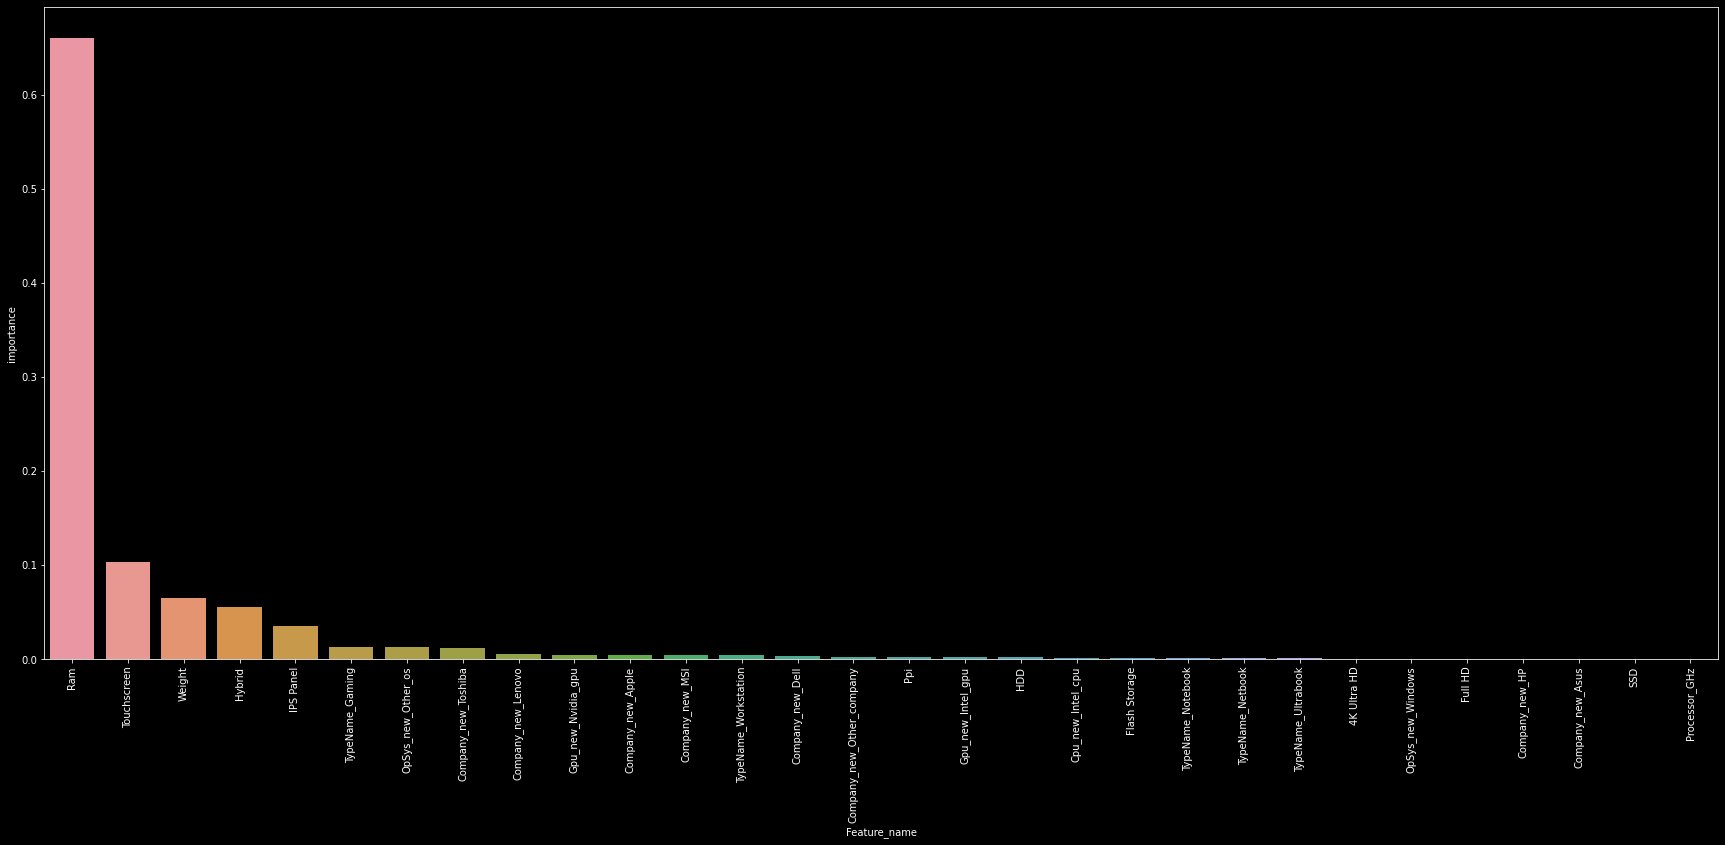

In [191]:
temp = pd.DataFrame({"Feature_name": temp_column,
             "importance": temp_feature_imp})
plt.figure(figsize = (30,12))
sns.barplot(data = temp.sort_values(by = "importance",ascending = False), x = "Feature_name",y = "importance")
plt.xticks(rotation = 90)
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest Regression</p>

In [192]:
randomforest = RandomForestRegressor(random_state = 101)

param_grid = {"n_estimators": [200,201,210],
             "max_features": ["auto", "sqrt", "log2"],
             "bootstrap": [True,False],
             "oob_score": [True,False]}

randomforest_grid = GridSearchCV(estimator = randomforest, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("randomforest_grid",randomforest_grid)
])

result = pipe.fit(X_train,y_train)

In [193]:
RF = result["randomforest_grid"].best_score_

In [194]:
result["randomforest_grid"].best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 201,
 'oob_score': True}

In [195]:
temp_feature_imp = result["randomforest_grid"].best_estimator_.feature_importances_
result["randomforest_grid"].best_estimator_.feature_importances_

array([0.2370111 , 0.09300082, 0.13201633, 0.14161092, 0.02039286,
       0.0274637 , 0.00068404, 0.        , 0.0224313 , 0.00516623,
       0.09676589, 0.02372173, 0.00781815, 0.00175962, 0.00669165,
       0.00821487, 0.00959818, 0.00848296, 0.00104594, 0.00751207,
       0.00321184, 0.0105942 , 0.01179108, 0.02098701, 0.02087137,
       0.01536013, 0.01104126, 0.01219752, 0.03084812, 0.0117091 ])

In [196]:
temp_column = pd.get_dummies(X, columns = ["TypeName","Company_new","Cpu_new","Gpu_new","OpSys_new"],sparse = False, drop_first = True).columns

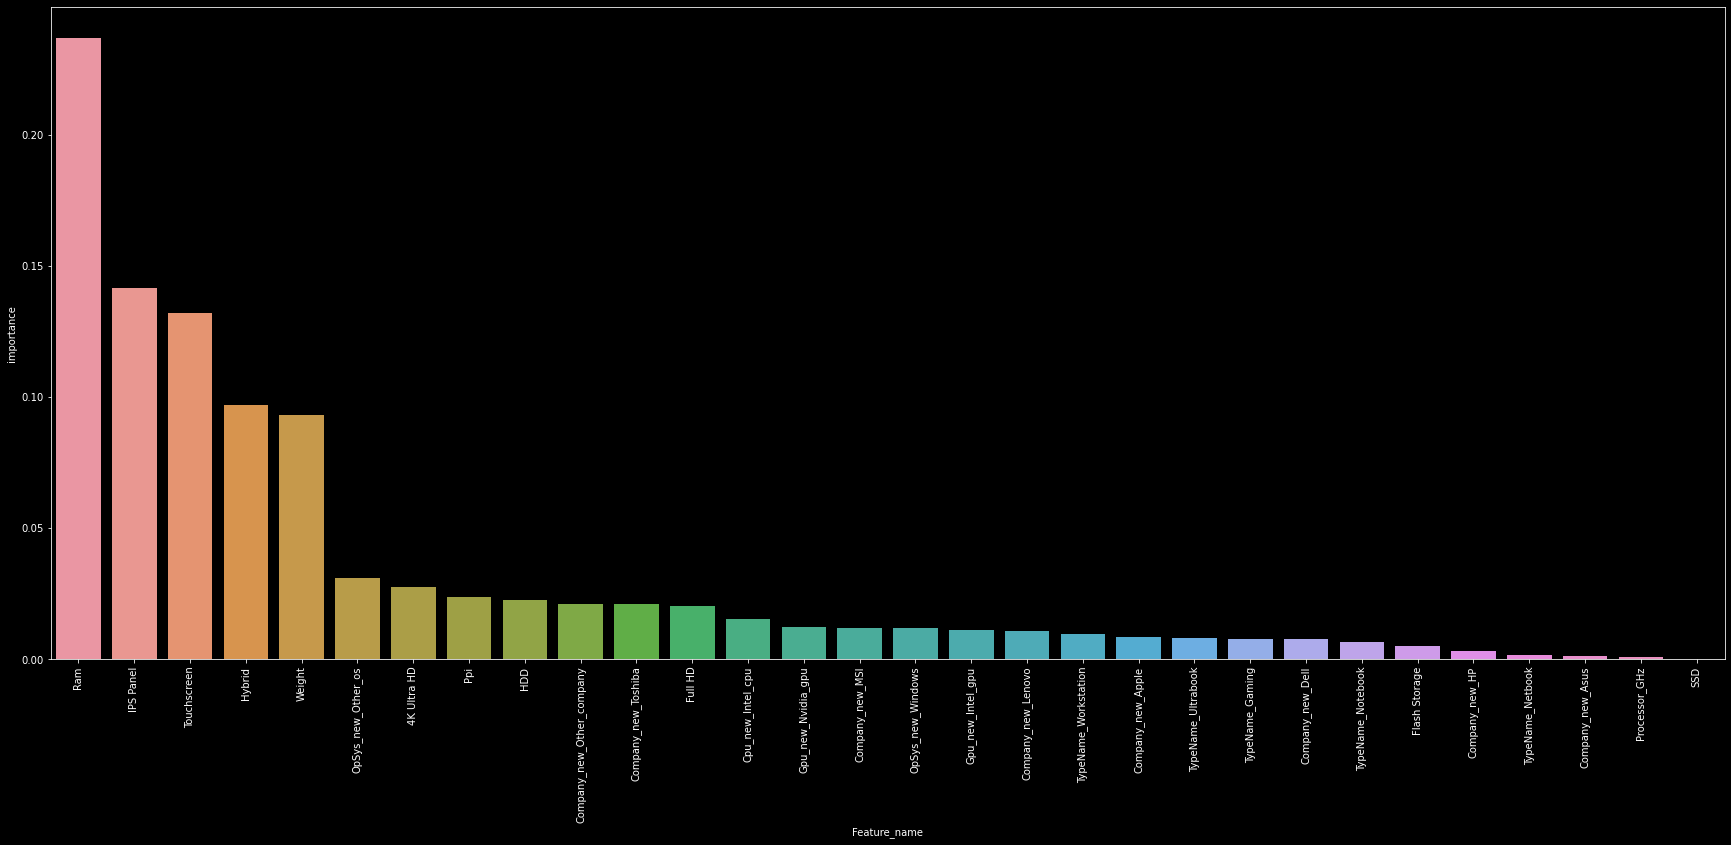

In [197]:
temp = pd.DataFrame({"Feature_name": temp_column,
             "importance": temp_feature_imp})
plt.figure(figsize = (30,12))
sns.barplot(data = temp.sort_values(by = "importance",ascending = False), x = "Feature_name",y = "importance")
plt.xticks(rotation = 90)
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ExtraTrees Regression</p>

In [198]:
extratrees = ExtraTreesRegressor(random_state = 101)

param_grid = {"n_estimators": [64,100,128,200,201],
             "max_features": ["auto", "sqrt", "log2"],
             "bootstrap": [True,False],
             "oob_score": [True,False]}

extratrees_grid = GridSearchCV(estimator = extratrees, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("extratrees_grid",extratrees_grid)
])

result = pipe.fit(X_train,y_train)

In [199]:
ET = result["extratrees_grid"].best_score_

In [200]:
result["extratrees_grid"].best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'n_estimators': 64,
 'oob_score': True}

In [201]:
temp_feature_imp = result["extratrees_grid"].best_estimator_.feature_importances_
result["extratrees_grid"].best_estimator_.feature_importances_

array([0.2847948 , 0.03860491, 0.07852821, 0.2379813 , 0.01275521,
       0.01655734, 0.00047183, 0.        , 0.0054305 , 0.00370377,
       0.14594038, 0.01301215, 0.01055613, 0.00137289, 0.00686794,
       0.0068659 , 0.01315056, 0.0085964 , 0.00093479, 0.00663109,
       0.00370348, 0.01097871, 0.0097423 , 0.00721964, 0.01163868,
       0.0093256 , 0.00843337, 0.0108913 , 0.02459885, 0.01071198])

In [202]:
temp_column = pd.get_dummies(X, columns = ["TypeName","Company_new","Cpu_new","Gpu_new","OpSys_new"],sparse = False, drop_first = True).columns

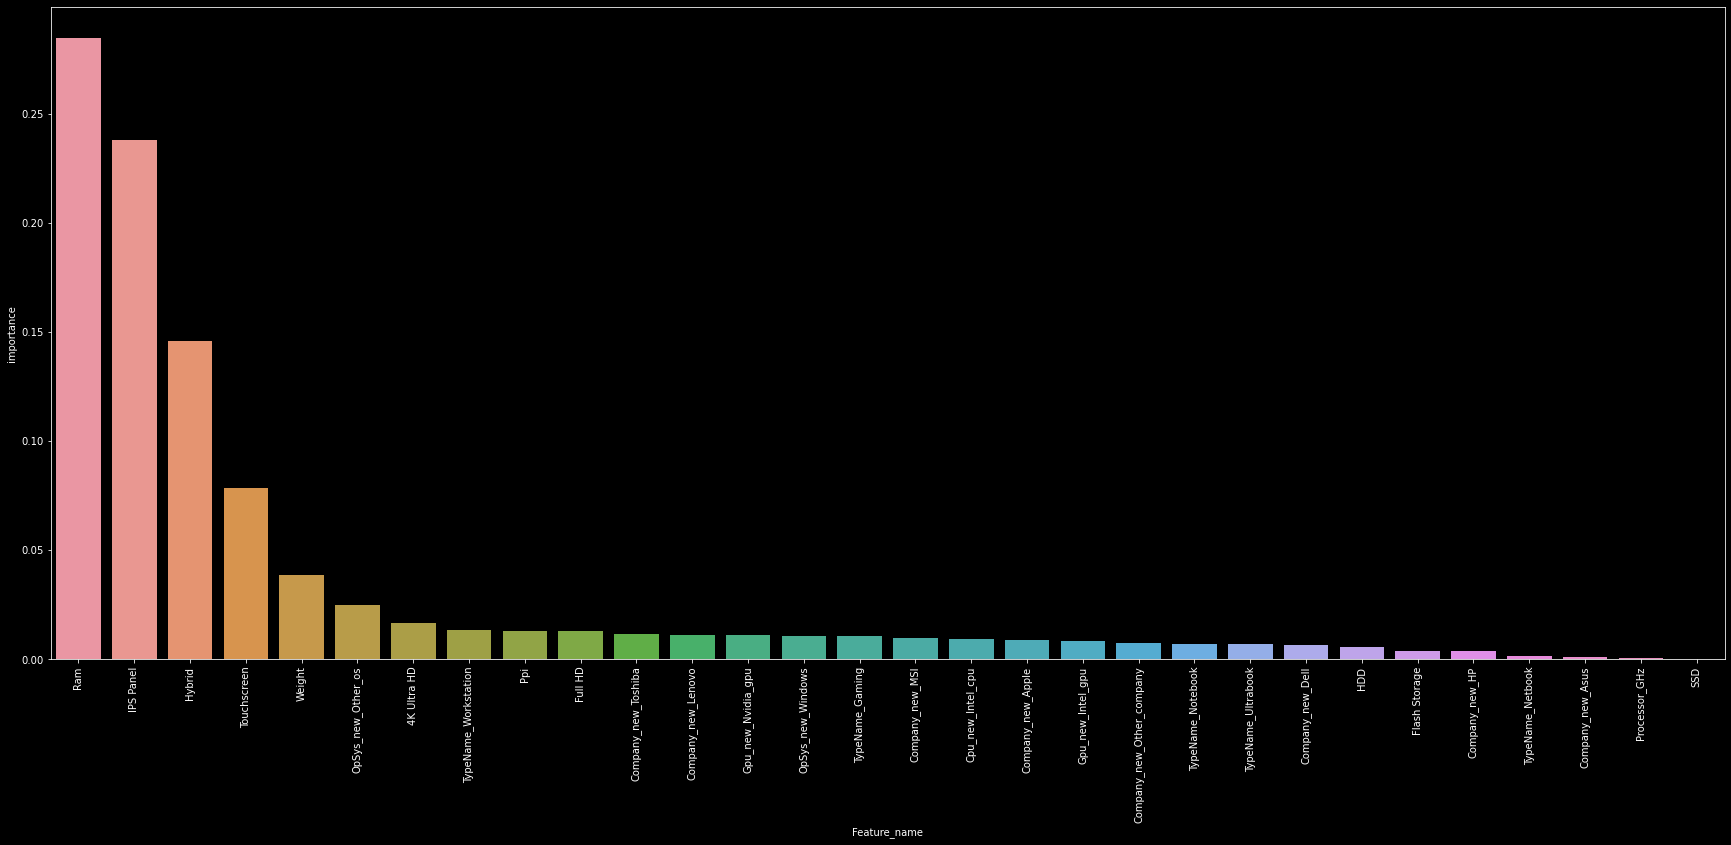

In [203]:
temp = pd.DataFrame({"Feature_name": temp_column,
             "importance": temp_feature_imp})
plt.figure(figsize = (30,12))
sns.barplot(data = temp.sort_values(by = "importance",ascending = False), x = "Feature_name",y = "importance")
plt.xticks(rotation = 90)
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Adaboost Regression</p>

In [204]:
adaboost = AdaBoostRegressor(random_state = 101)

param_grid = {"n_estimators": [45],
             "learning_rate": [0.5,1.0,1.5,10],
             "loss": ['linear', 'square', 'exponential']}


adaboost_grid = GridSearchCV(estimator = adaboost, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("adaboost_grid",adaboost_grid)
])

result = pipe.fit(X_train,y_train)

In [205]:
ADA = result["adaboost_grid"].best_score_

In [206]:
result["adaboost_grid"].best_params_

{'learning_rate': 1.5, 'loss': 'linear', 'n_estimators': 45}

In [207]:
temp_feature_imp = result["adaboost_grid"].best_estimator_.feature_importances_
result["adaboost_grid"].best_estimator_.feature_importances_

array([3.47654381e-01, 9.16555855e-02, 1.58578160e-01, 1.78835113e-01,
       3.75274552e-03, 3.87907555e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.14311140e-05, 4.22834045e-02, 1.08108569e-02,
       1.77481492e-02, 1.19309732e-03, 0.00000000e+00, 2.24026837e-03,
       1.62208975e-03, 0.00000000e+00, 0.00000000e+00, 5.08743442e-03,
       0.00000000e+00, 2.39557404e-02, 1.39716559e-03, 2.27662285e-02,
       2.68248760e-02, 0.00000000e+00, 3.07046152e-03, 1.74586196e-02,
       5.17908936e-03, 3.39560268e-02])

In [208]:
temp_column = pd.get_dummies(X, columns = ["TypeName","Company_new","Cpu_new","Gpu_new","OpSys_new"],sparse = False, drop_first = True).columns

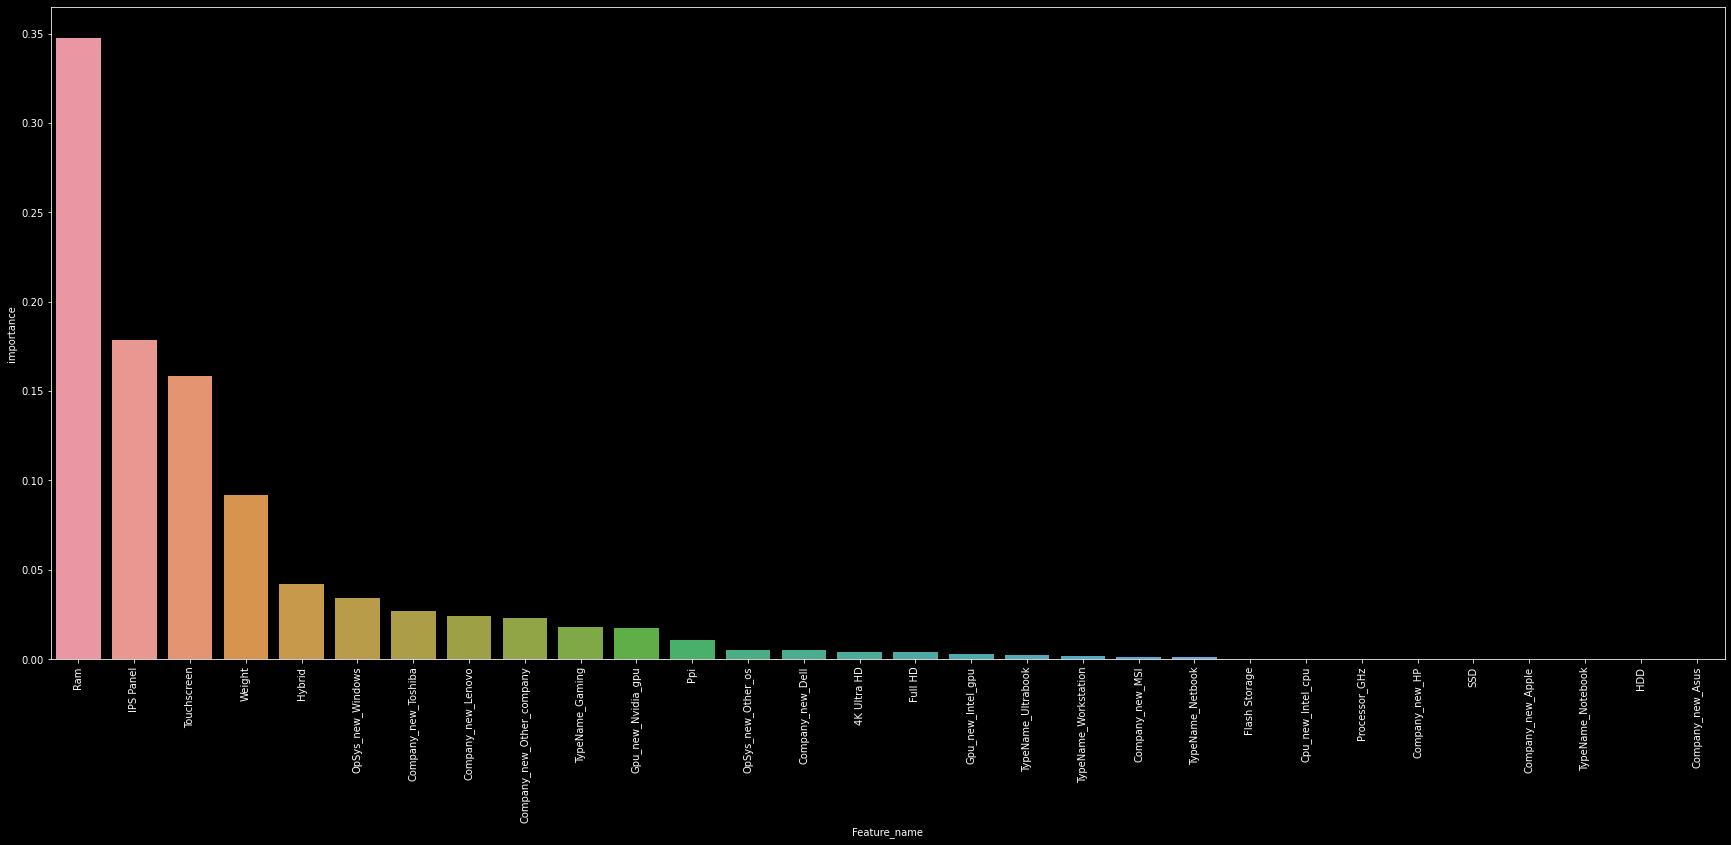

In [209]:
temp = pd.DataFrame({"Feature_name": temp_column,
             "importance": temp_feature_imp})
plt.figure(figsize = (30,12))
sns.barplot(data = temp.sort_values(by = "importance",ascending = False), x = "Feature_name",y = "importance")
plt.xticks(rotation = 90)
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gradientboost Regression</p>

In [210]:
gradientboost = GradientBoostingRegressor(random_state = 101)

param_grid = {"n_estimators":[250,300,350,400],
              "max_depth":[3,4,5,6],
              "learning_rate":[0.001,0.01,0.1,1]}

gradientboost_grid = GridSearchCV(estimator = gradientboost, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("gradientboost_grid",gradientboost_grid)
])

result = pipe.fit(X_train,y_train)

In [211]:
GB = result["gradientboost_grid"].best_score_

In [212]:
result["gradientboost_grid"].best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

In [213]:
temp_feature_imp = result["gradientboost_grid"].best_estimator_.feature_importances_
result["gradientboost_grid"].best_estimator_.feature_importances_

array([5.59392578e-01, 8.03730018e-02, 1.16970355e-01, 9.08497246e-02,
       5.44197752e-03, 2.07499092e-03, 9.69234165e-05, 0.00000000e+00,
       1.48032262e-03, 1.42692980e-03, 4.08678599e-02, 2.32641588e-03,
       9.42190172e-03, 2.43254614e-03, 3.44831354e-03, 3.27038466e-03,
       6.48663489e-03, 2.53577080e-03, 6.19063330e-04, 4.54473989e-03,
       1.00101462e-03, 9.47839803e-03, 2.59992742e-03, 7.74862173e-03,
       1.22342178e-02, 3.90887049e-03, 3.14289747e-03, 7.73073623e-03,
       1.12301136e-02, 6.86476847e-03])

In [214]:
temp_column = pd.get_dummies(X, columns = ["TypeName","Company_new","Cpu_new","Gpu_new","OpSys_new"],sparse = False, drop_first = True).columns

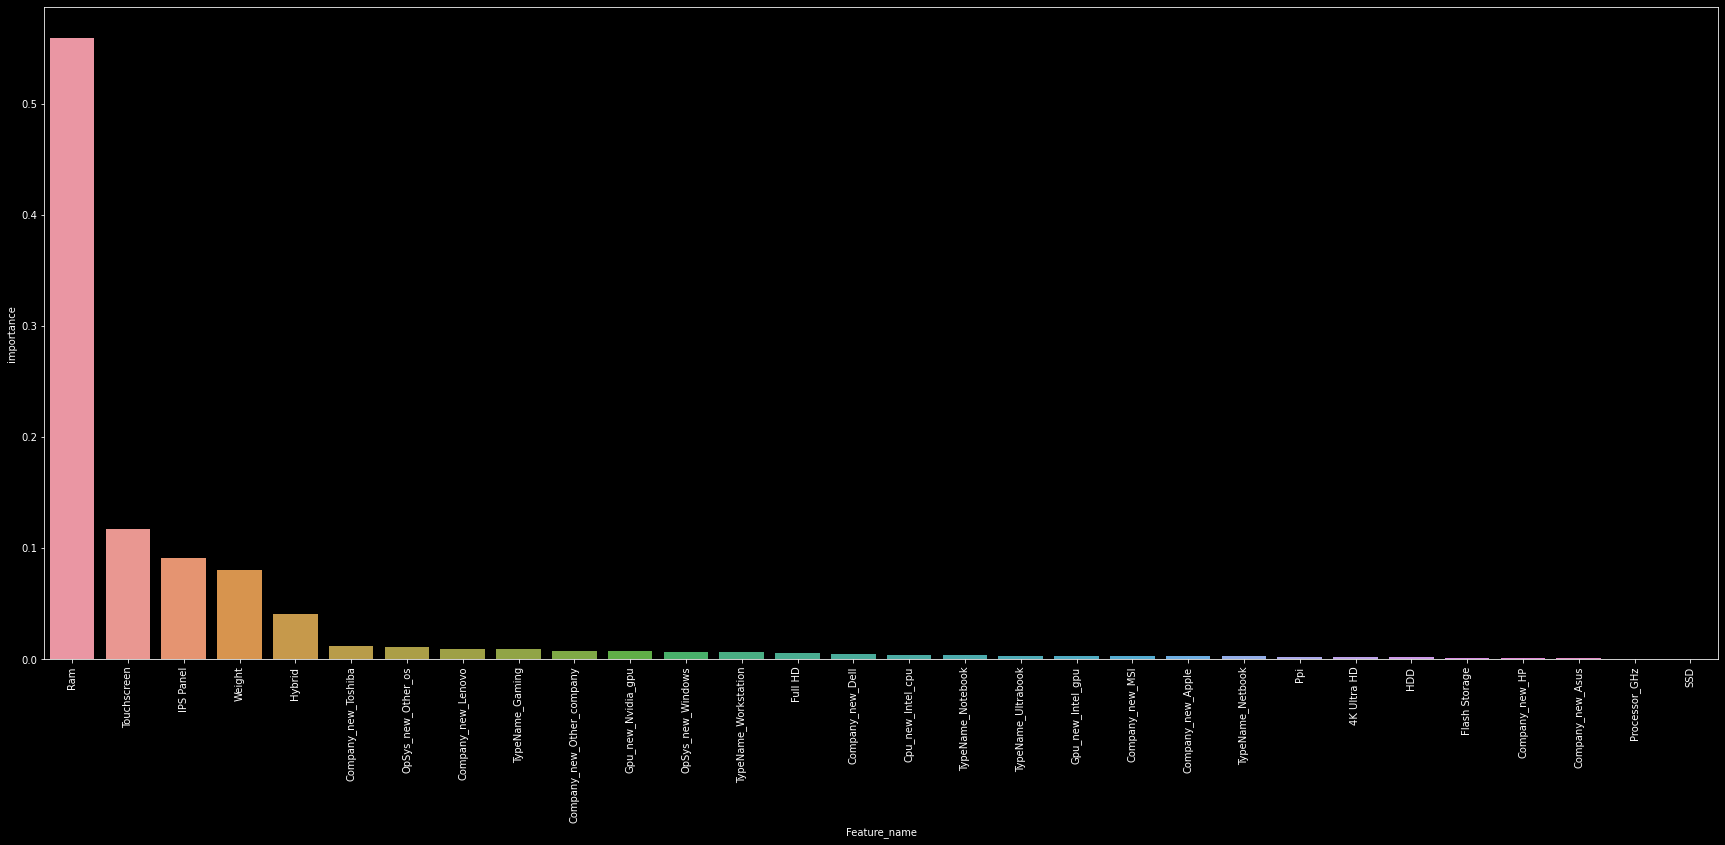

In [215]:
temp = pd.DataFrame({"Feature_name": temp_column,
             "importance": temp_feature_imp})
plt.figure(figsize = (30,12))
sns.barplot(data = temp.sort_values(by = "importance",ascending = False), x = "Feature_name",y = "importance")
plt.xticks(rotation = 90)
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">XGB Regression</p>

In [216]:
xgb = XGBRegressor(random_state = 101)

param_grid = {"n_estimators":[100,250,300,350,375,400],
              "max_depth":[2,3,4,5,6,7],
              "learning_rate":[0.001,0.01,0.1,0.2,0.25,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5, verbose = 0, scoring = "r2", n_jobs = -1)

pipe = Pipeline([
    ("step1",step1),
    ("xgb_grid",xgb_grid)
])

result = pipe.fit(X_train,y_train)

In [217]:
XGB = result["xgb_grid"].best_score_
XGB

0.8857552400592301

In [218]:
result["xgb_grid"].best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}

In [219]:
temp_feature_imp = result["xgb_grid"].best_estimator_.feature_importances_
result["xgb_grid"].best_estimator_.feature_importances_

array([0.15087466, 0.00972938, 0.04074422, 0.10605329, 0.01057968,
       0.01168207, 0.00600801, 0.        , 0.0161879 , 0.02521806,
       0.16954696, 0.01681214, 0.03738837, 0.0191501 , 0.00871454,
       0.00798928, 0.01573342, 0.00757936, 0.00337246, 0.01729083,
       0.01171572, 0.06219775, 0.00743729, 0.00661871, 0.04012292,
       0.02378185, 0.01042409, 0.00842899, 0.01048344, 0.1381346 ],
      dtype=float32)

In [220]:
temp_column = pd.get_dummies(X, columns = ["TypeName","Company_new","Cpu_new","Gpu_new","OpSys_new"],sparse = False, drop_first = True).columns

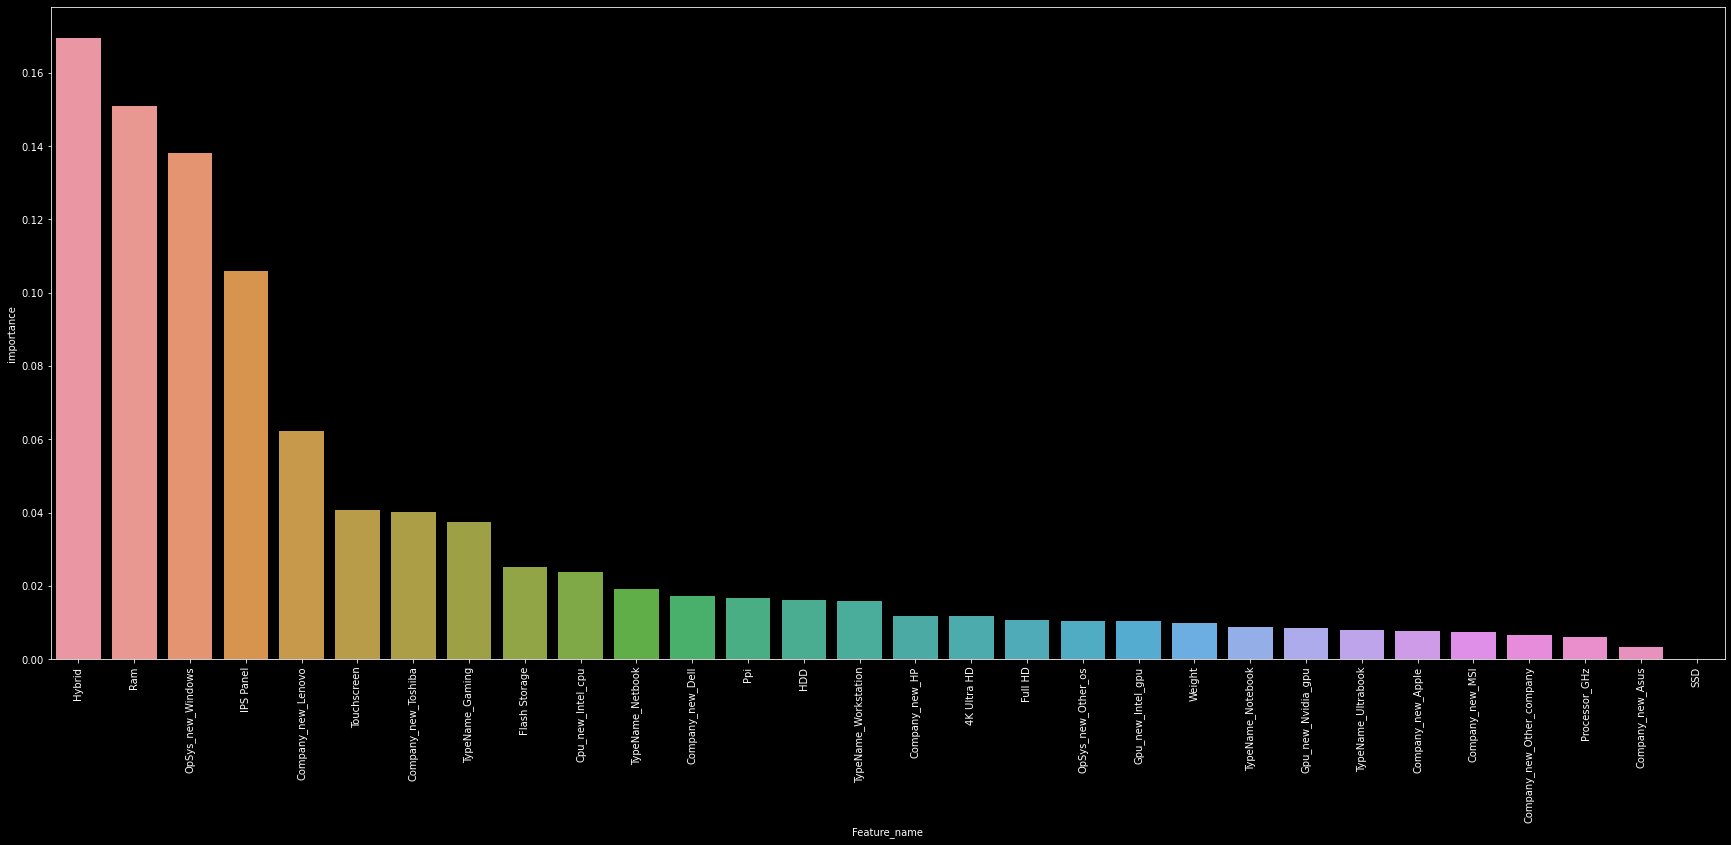

In [221]:
temp = pd.DataFrame({"Feature_name": temp_column,
             "importance": temp_feature_imp})
plt.figure(figsize = (30,12))
sns.barplot(data = temp.sort_values(by = "importance",ascending = False), x = "Feature_name",y = "importance")
plt.xticks(rotation = 90)
plt.show()

In [222]:
print("LinearRegression r2_score: ", LR)
print("Ridge r2_score: ", RR)
print("Lasso r2_score: ", L)
print("ElasticNet r2_score: ", EN)
print("KNN r2_score: ", KNN)
print("SVR r2_score: ", SVR)
print("DecisionTree r2_score: ", DT)
print("RandomForest r2_score: ", RF)
print("ExtraTrees r2_score: ", ET)
print("Adaboost r2_score: ", ADA)
print("Gradientboost r2_score: ", GB)
print("XGB r2_score: ", XGB)

LinearRegression r2_score:  0.8090606008538741
Ridge r2_score:  0.8093106481920687
Lasso r2_score:  0.6634412399539223
ElasticNet r2_score:  0.8092726893421143
KNN r2_score:  0.8275342170324202
SVR r2_score:  0.8732810240265069
DecisionTree r2_score:  0.7989164247057476
RandomForest r2_score:  0.8828753694868038
ExtraTrees r2_score:  0.8736115390248826
Adaboost r2_score:  0.7966688492695442
Gradientboost r2_score:  0.8846955186787315
XGB r2_score:  0.8857552400592301


# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Final Model</p>

In [223]:
X = data2.drop("Price",axis = 1)
y = np.log(data2["Price"])

In [224]:
step1 = ColumnTransformer(transformers = [
    ("PT",PowerTransformer(),[1,2,9,10,11,12,13,16]),
    ("ohe", OneHotEncoder(sparse = False, drop = "first"),[0,3,8,14,15])
],remainder = "passthrough")

In [225]:
Final_model = XGBRegressor(learning_rate = 0.2, max_depth = 6, n_estimators = 100)

Final_pipe = Pipeline([
    ("ohe_PT",step1),
    ("Xgb",Final_model)
])

Final_pipe.fit(X,y)

Pipeline(steps=[('ohe_PT',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('PT', PowerTransformer(),
                                                  [1, 2, 9, 10, 11, 12, 13,
                                                   16]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 3, 8, 14, 15])])),
                ('Xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              e...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', impo

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Predictions</p>

In [226]:
to_predict_1 = pd.DataFrame([["Gaming", 8, 1.86, "MSI", 0, 1, 0, 0, "Intel_cpu", 4.5, 512, 0, 0, 0, "Nvidia_gpu", "Windows", 139.884885]],columns = X.columns)

In [227]:
# Original Price is 83990.
# Predicted Price is 83075.
np.exp(Final_pipe.predict(to_predict_1))

array([83075.266], dtype=float32)

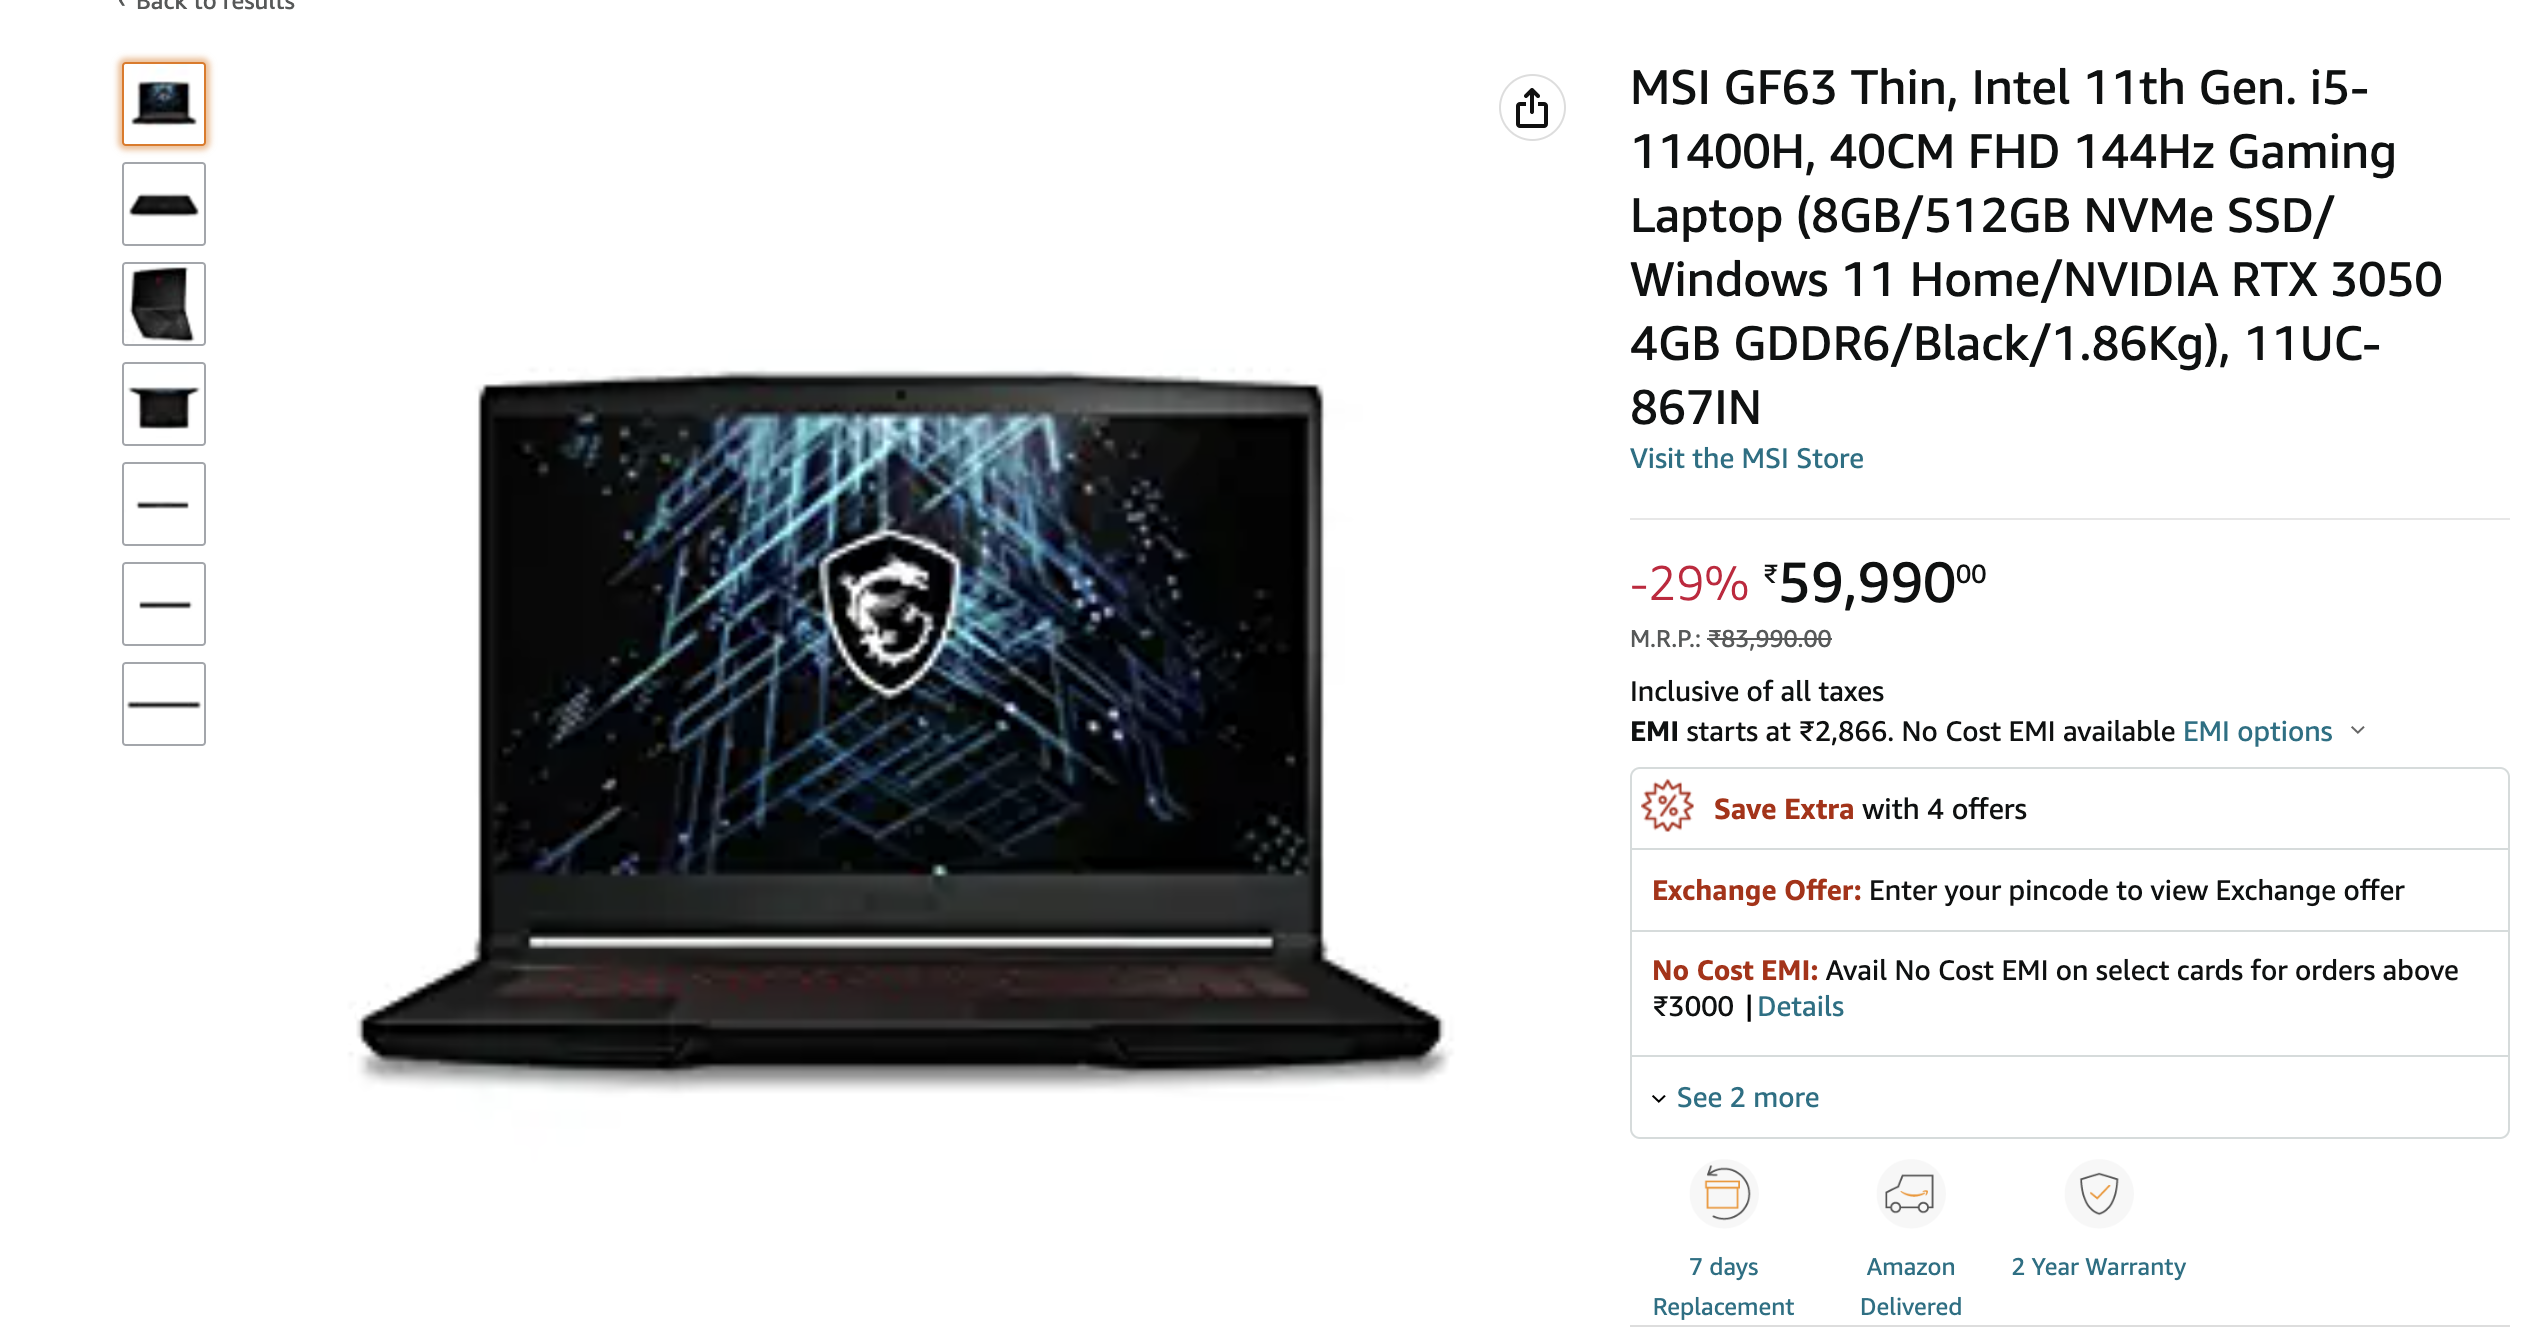

In [228]:
to_predict_2 = pd.DataFrame([["Gaming", 16, 2.3, "MSI", 0, 1, 0, 0, "Intel_cpu", 4.70, 1000, 0, 0, 0, "Nvidia_gpu", "Windows", 186.513180]],columns = X.columns)

In [229]:
# Original Price is 139000.
# Predicted Price is 141457.
np.exp(Final_pipe.predict(to_predict_2))

array([141457.22], dtype=float32)

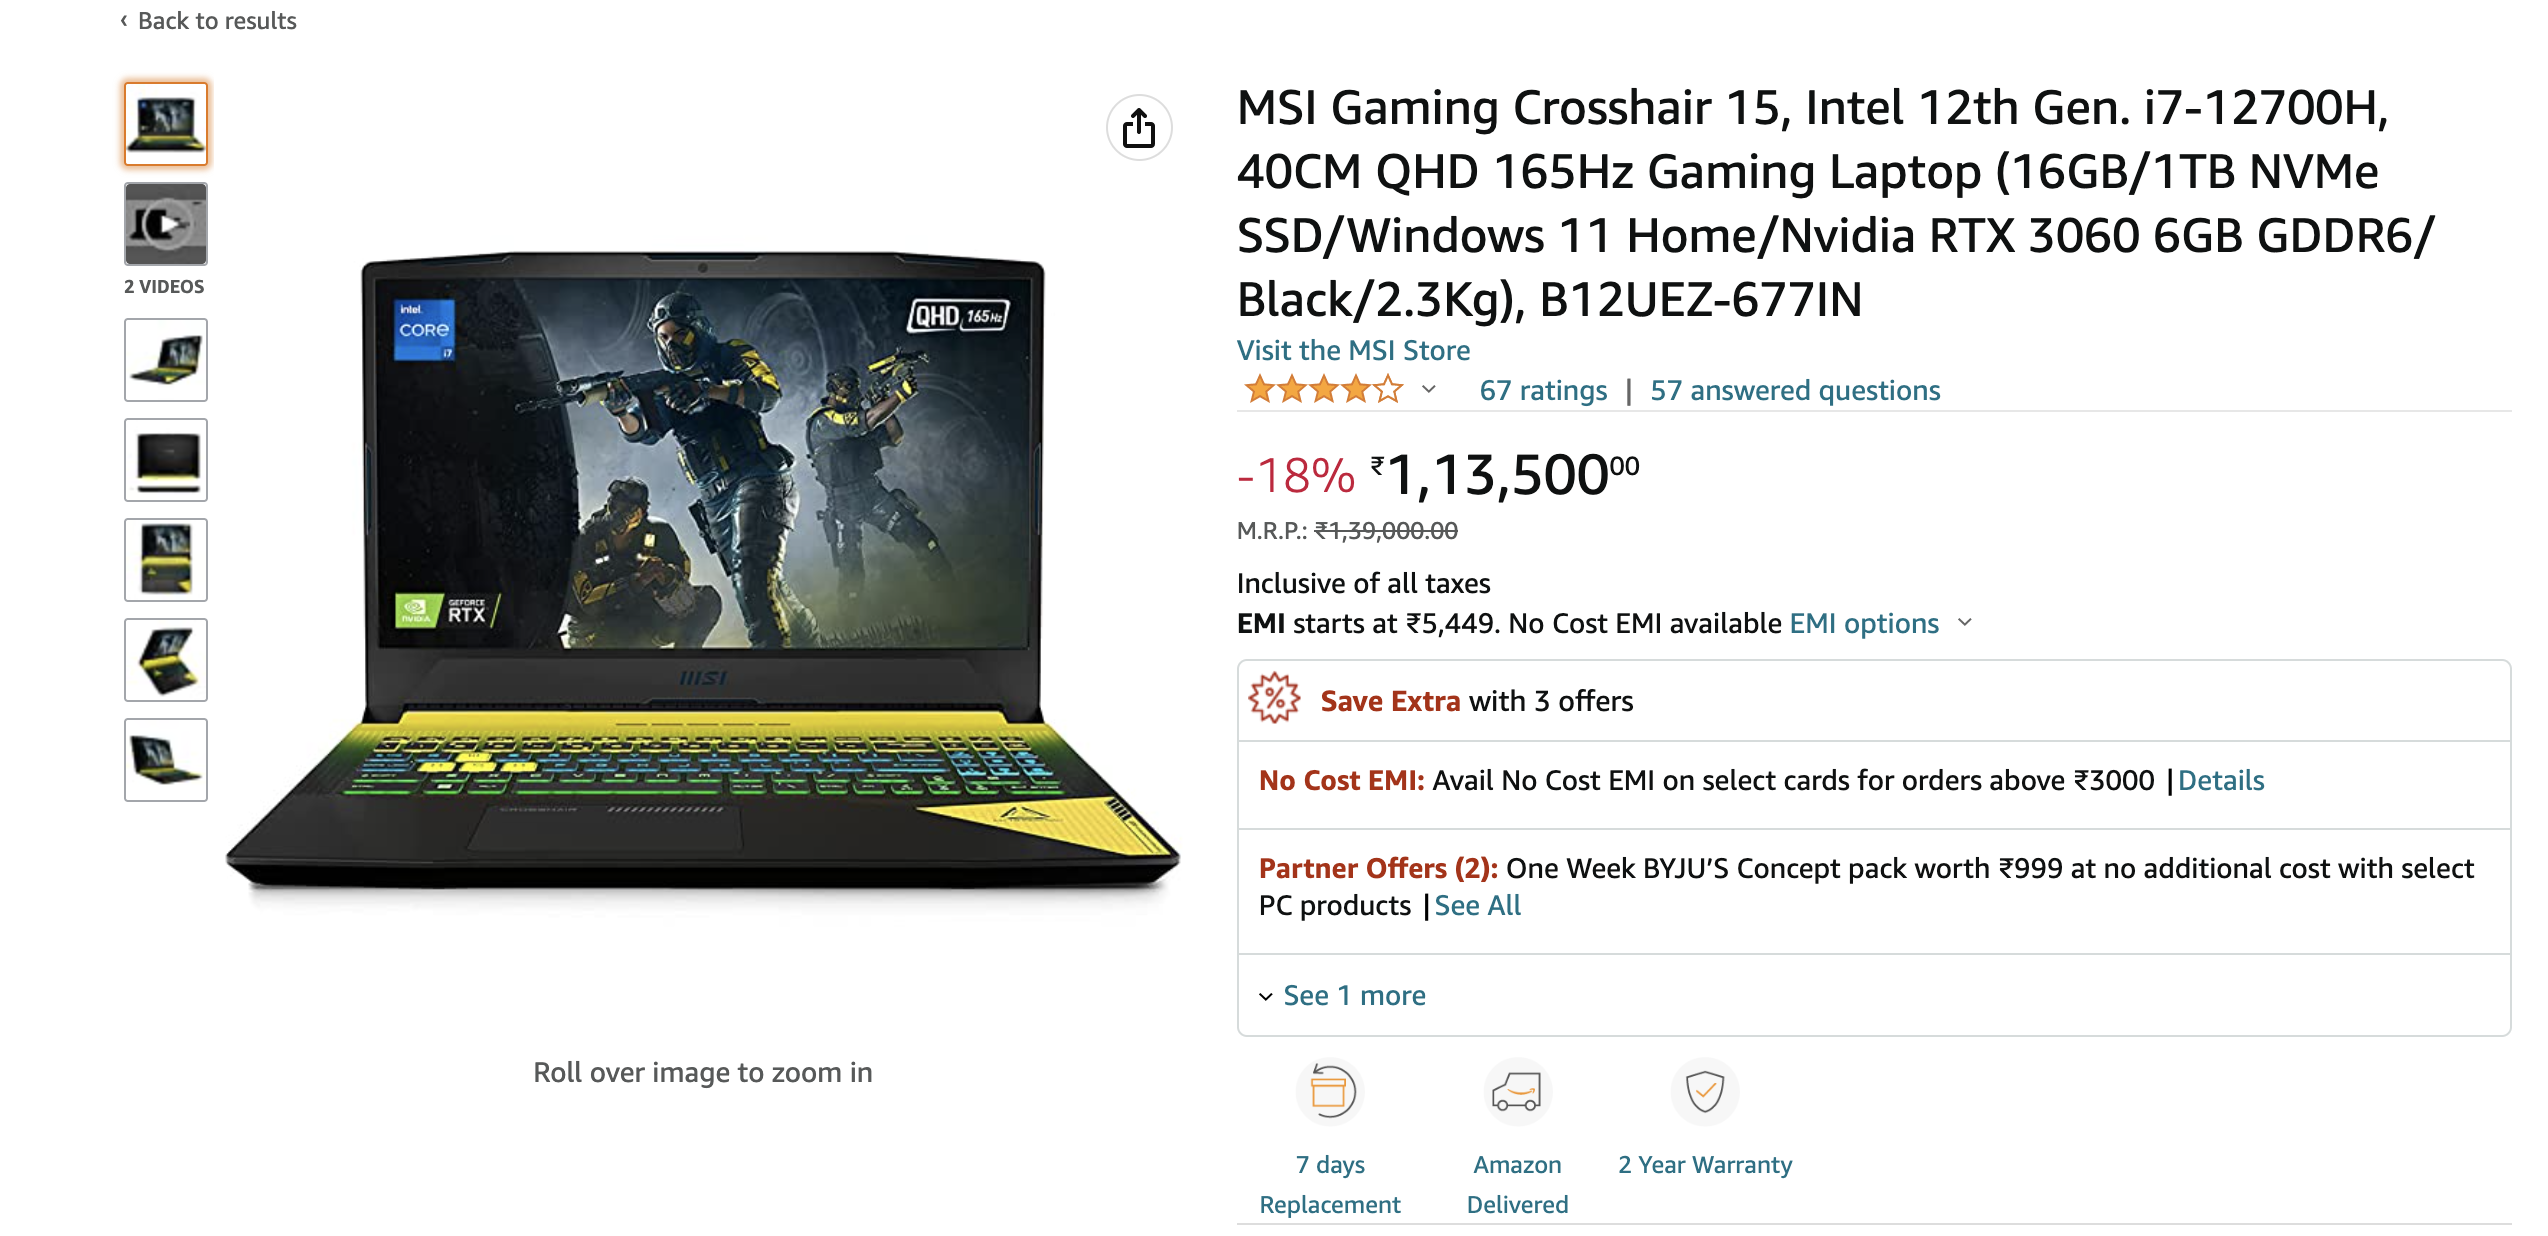

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You!</p>
<a id="8"></a>